In [1]:
import kagglehub

kagglehub.dataset_download("aungpyaeap/supermarket-sales")

'/Users/samuelarthur/.cache/kagglehub/datasets/aungpyaeap/supermarket-sales/versions/3'

In [2]:
import pandas as pd

df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Attribute information
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Dataset Overview:
This is a historical sales dataset from a supermarket company with three branches. 
Let's break down the key aspects:

Time Period:
Data spans from January to March 2019
Contains daily transaction records

Geographical Coverage:
Three branches: Yangon (Branch A), Mandalay (Branch B), and Naypyitaw (Branch C)

Key Variables:

Customer-Related:

Customer type (Member/Normal)
- Gender (Male/Female)
- Payment method (Cash/Card/E-wallet)
- Customer rating (1-10 scale)


Product-Related:

Product line (6 categories):

- Electronic accessories
- Fashion accessories
- Food and beverages
- Health and beauty
- Home and lifestyle
- Sports and travel

Unit price
- Quantity purchased

Financial Metrics:
- Gross margin percentage
- Gross income
- Tax (5%)
- Total


Potential Analysis Goals:

Sales Performance Analysis:

- Compare performance across branches
- Identify best-selling product categories
- Analyze sales trends over time


Customer Behavior:

- Study purchase patterns between member vs normal customers
- Analyze gender-based purchasing preferences
- Evaluate payment method preferences

Financial Analysis:

- Calculate profitability by product line
- Analyze gross margin patterns
- Study transaction values

Customer Satisfaction:

- Analyze rating patterns across different variables
- Identify factors affecting customer satisfaction

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
isnull = df.isnull().sum()
print(f"Number of null values: {isnull.sum()}")

Number of null values: 0


In [6]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Convert 'Time' to datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [10]:
df.loc[:,["Date", "Time"]]


,Date,Time
0,2019-01-05,13:08:00
1,2019-03-08,10:29:00
2,2019-03-03,13:23:00
3,2019-01-27,20:33:00
4,2019-02-08,10:37:00
...,...,...
995,2019-01-29,13:46:00
996,2019-03-02,17:16:00
997,2019-02-09,13:22:00
998,2019-02-22,15:33:00


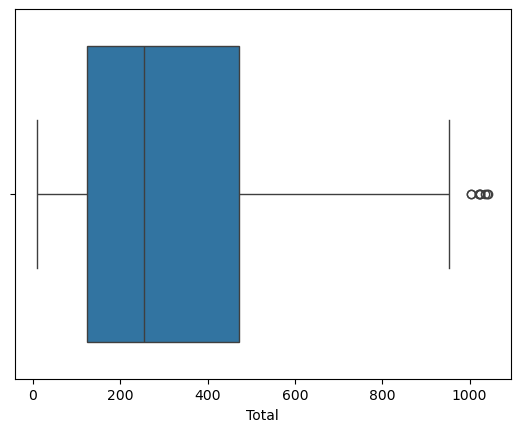

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#checking for outliers
sns.boxplot(x=df['Total'])
plt.show()

## Handling Outliers

In [12]:
df.groupby('Product line')['Total'].describe()


,count,mean,std,min,25%,50%,75%,max
Product line,,,,,,,,
Electronic accessories,170.0,319.632538,245.945626,26.7225,118.503000,241.21650,475.823250,942.4485
Fashion accessories,178.0,305.089298,243.564130,12.6945,106.155000,211.64850,442.690500,1042.6500
Food and beverages,174.0,322.671517,247.157780,22.6590,134.904000,252.48825,452.647125,1034.4600
Health and beauty,152.0,323.643020,237.538815,18.6375,125.666625,272.30700,492.720375,950.2500
Home and lifestyle,160.0,336.636956,254.600671,14.6790,126.076125,258.18975,491.762250,1023.7500
Sports and travel,166.0,332.065220,248.375328,10.6785,133.260750,270.93150,477.684375,1002.1200


In [13]:
print("Mean:", df['Total'].mean())
print("Median:", df['Total'].median())


Mean: 322.966749
Median: 253.848


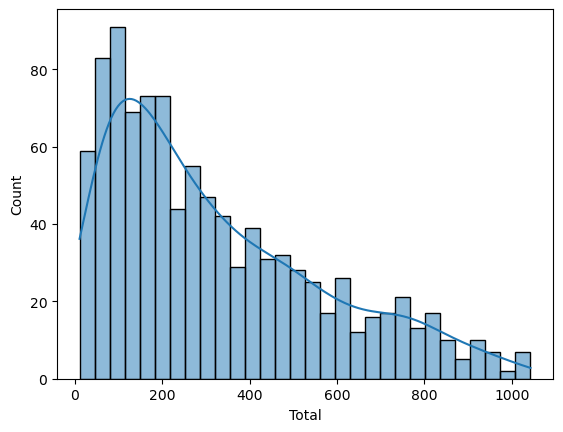

In [14]:
sns.histplot(df['Total'], bins=30, kde=True)
plt.show()


Based on the results:

Outliers Across Product Lines:

The max Total values are significantly higher than the 75th percentile for all product lines (e.g., 1042.65 for "Fashion accessories" vs 442.69 at 75%).
This suggests that outliers represent unusually large transactions, which appear legitimate and not errors.

Impact on Mean and Median:

The overall mean of 322.97 is much higher than the median of 253.85.
This confirms that the outliers are skewing the distribution towards higher values.
Distribution Shape:

The histogram shows a right-skewed distribution, indicating that most transactions are small or moderate, while a few transactions have extremely high totals.

Actions to take:

Keep the Outliers:

Since the outliers are consistent across product lines and likely represent high-value purchases, they are important insights for business analysis (e.g., identifying big spenders, bulk orders).
Separate Analysis:

Analyze these outliers separately to understand:
Which product lines contribute to the high totals.
Patterns of large transactions (e.g., frequent customers, time of purchase).

In [15]:
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -395.9694375, Upper Bound: 991.7420625


In [16]:
outliers = df[df['Total'] > upper_bound]
print(outliers.shape)

(9, 17)


In [17]:
outliers_by_product = outliers.groupby('Product line')['Total'].agg(['count', 'mean', 'max'])
print(outliers_by_product)

                     count        mean      max
Product line                                   
Fashion accessories      3  1034.21500  1042.65
Food and beverages       1  1034.46000  1034.46
Home and lifestyle       4  1018.05375  1023.75
Sports and travel        1  1002.12000  1002.12


In [18]:
outliers_by_customer = outliers.groupby('Customer type')['Total'].agg(['count', 'mean', 'max'])
print(outliers_by_customer)

               count       mean      max
Customer type                           
Member             3  1032.6050  1042.65
Normal             6  1018.9375  1039.29


In [19]:
outliers_by_time = outliers.groupby('Time')['Total'].sum().sort_values(ascending=False)
print(outliers_by_time.head(10))  # Top times with high-value transactions

Time
14:53:00    1042.650
16:20:00    1039.290
20:23:00    1034.460
16:18:00    1023.750
17:16:00    1022.490
13:48:00    1022.385
13:00:00    1020.705
13:32:00    1003.590
13:45:00    1002.120
Name: Total, dtype: float64


In [20]:
outliers_by_date = outliers.groupby('Date')['Total'].sum().sort_values(ascending=False)
print(outliers_by_date.head(10))  # Top dates with high-value transactions

Date
2019-02-08    2059.995
2019-02-15    1042.650
2019-01-30    1034.460
2019-01-12    1023.750
2019-03-02    1022.490
2019-01-15    1022.385
2019-01-16    1003.590
2019-01-09    1002.120
Name: Total, dtype: float64


In [21]:
outliers_by_payment = outliers.groupby('Payment')['Total'].agg(['count', 'mean', 'max'])
print(outliers_by_payment)

             count       mean      max
Payment                               
Cash             2  1002.8550  1003.59
Credit card      4  1031.2575  1042.65
Ewallet          3  1026.9000  1034.46


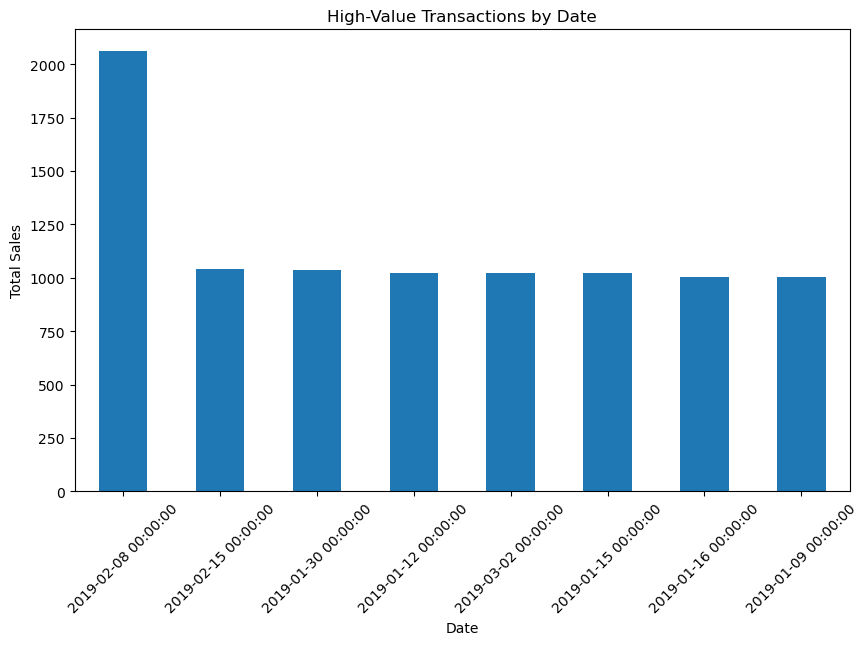

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
outliers_by_date.plot(kind='bar')
plt.title("High-Value Transactions by Date")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

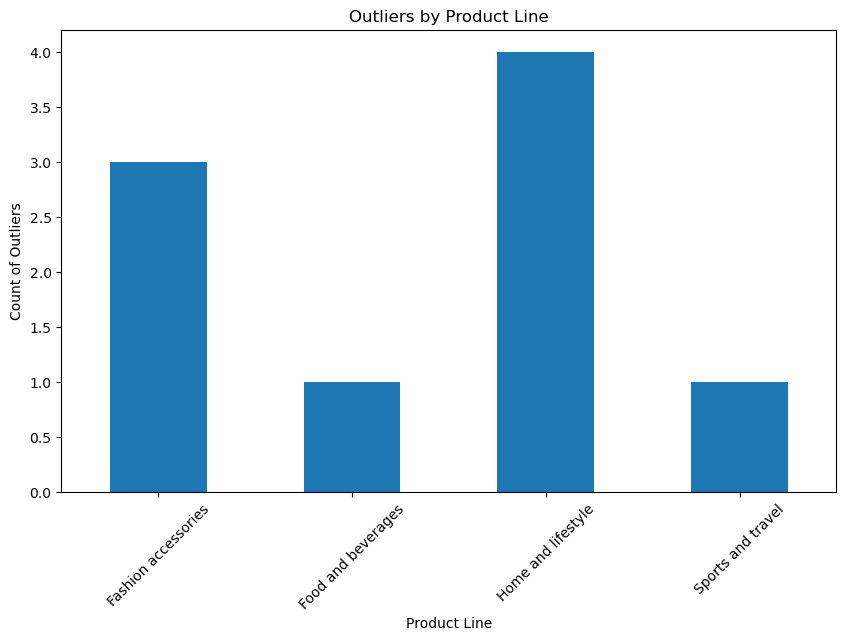

In [23]:
plt.figure(figsize=(10, 6))
outliers_by_product['count'].plot(kind='bar')
plt.title("Outliers by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45)
plt.show()


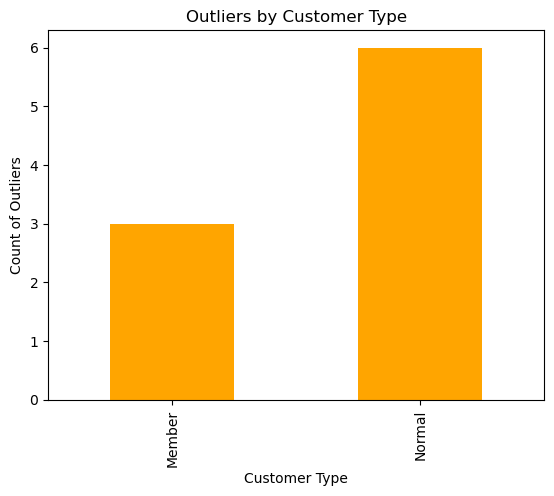

In [24]:
outliers_by_customer['count'].plot(kind='bar', color='orange')
plt.title("Outliers by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Count of Outliers")
plt.show()


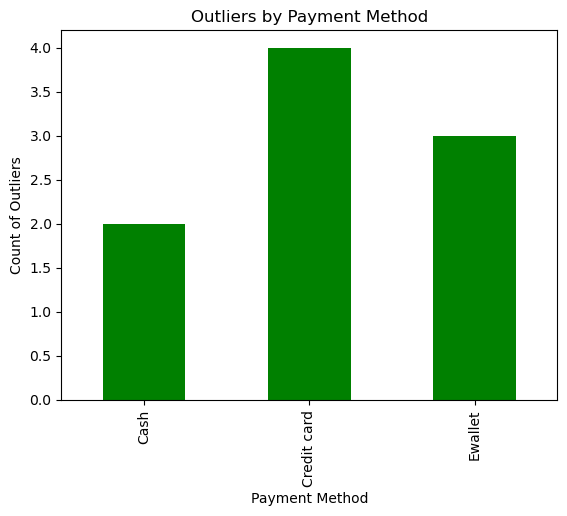

In [25]:
outliers_by_payment['count'].plot(kind='bar', color='green')
plt.title("Outliers by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count of Outliers")
plt.show()


Insights Gained from Outlier Analysis
1. Product Line Contribution:

Outliers are concentrated in specific product lines:
- Home and Lifestyle (4 outliers, highest count).
- Fashion Accessories (3 outliers).
- Food and Beverages and Sports and Travel contribute fewer outliers (1 each).

These results suggest that high-value transactions are more frequent in "Home and Lifestyle" and "Fashion Accessories."

2. Customer Type Contribution:

Outliers occur more often for Normal customers (6 outliers) compared to Members (3 outliers).
Normal customers appear to make larger purchases, possibly indicating sporadic but significant spending behavior.

3. Transaction Time Analysis:

High-value transactions are clustered during specific times:
- Top Times: 14:53, 16:20, 20:23.

These times suggest peak hours where larger purchases are made, potentially during shopping rush hours.

4. Transaction Date Analysis:

Key dates with the highest high-value transactions include:
- 2019-02-08: Total sales of 2059.99.
Other notable dates include 2019-02-15, 2019-01-30, and 2019-03-02.

These dates might correlate with promotions, holidays, or seasonal sales events.

5. Payment Method Contribution:

Outliers are distributed across payment methods as follows:
- Credit Card: 4 transactions.
- E-wallet: 3 transactions.
- Cash: 2 transactions.

Credit cards and E-wallets are the dominant methods for high-value purchases, likely due to convenience and higher spending limits.

Conclusion

From the analysis:
- High-value transactions are dominantly in the "Home and Lifestyle" and "Fashion Accessories" product lines.
- Normal customers contribute to the majority of outliers, suggesting significant one-time purchases.
- High-value purchases peak at specific times (afternoons and evenings) and occur on specific dates, likely linked to promotions or seasonal trends.
- Credit card and E-wallet payments are the most common for outliers, highlighting the reliance on digital payment methods for larger purchases.

Recommendations:
- Investigate promotions or campaigns around key dates and product lines to understand drivers of high-value transactions.
- Focus on "Home and Lifestyle" and "Fashion Accessories" for upselling opportunities.
- Consider targeting Normal customers with loyalty programs to increase repeat purchases.
- Optimize store operations during peak hours to accommodate large transactions efficiently.
- Promote digital payment options (Credit cards and E-wallets) for higher-value purchases.

In [26]:
# Ensure numerical columns are of appropriate types
numeric_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 
               'gross margin percentage', 'gross income', 'Rating']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df[numeric_cols]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [27]:
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender',
                    'Product line', 'Payment']

df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.title())

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Branch: ['A' 'C' 'B']
City: ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type: ['Member' 'Normal']
Gender: ['Female' 'Male']
Product line: ['Health And Beauty' 'Electronic Accessories' 'Home And Lifestyle'
 'Sports And Travel' 'Food And Beverages' 'Fashion Accessories']
Payment: ['Ewallet' 'Cash' 'Credit Card']


### Feature Engineering

In [28]:
# Create 'Total without Tax'
df['Total without Tax'] = df['Total'] - df['Tax 5%']
df[['Total', 'Tax 5%', 'Total without Tax']]

,Total,Tax 5%,Total without Tax
0,548.9715,26.1415,522.83
1,80.2200,3.8200,76.40
2,340.5255,16.2155,324.31
3,489.0480,23.2880,465.76
4,634.3785,30.2085,604.17
...,...,...,...
995,42.3675,2.0175,40.35
996,1022.4900,48.6900,973.80
997,33.4320,1.5920,31.84
998,69.1110,3.2910,65.82


In [29]:
df['Tax 5%'].sum()

15379.368999999999

In [30]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
print(monthly_sales)


   Month       Total
0      1  116291.868
1      2   97219.374
2      3  109455.507


In [31]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.minute

print(df[['Time', 'Hour', 'Minute']].head())


       Time  Hour  Minute
0  13:08:00    13       8
1  10:29:00    10      29
2  13:23:00    13      23
3  20:33:00    20      33
4  10:37:00    10      37


In [32]:
df['DayOfWeek'] = df['Date'].dt.day_name()

df[['Date', 'DayOfWeek']].head()


,Date,DayOfWeek
0,2019-01-05,Saturday
1,2019-03-08,Friday
2,2019-03-03,Sunday
3,2019-01-27,Sunday
4,2019-02-08,Friday


### Encoding Categorical Variables


In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode 'Customer type'
df['CustomerType_Encoded'] = le.fit_transform(df['Customer type'])

df[['Customer type', 'CustomerType_Encoded']].drop_duplicates()


,Customer type,CustomerType_Encoded
0,Member,0
1,Normal,1


In [34]:
# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Payment', 'Product line', 'City', 'Gender', 'Branch'], drop_first=True)

df_encoded.head()


,Invoice ID,Customer type,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,...,Product line_Fashion Accessories,Product line_Food And Beverages,Product line_Health And Beauty,Product line_Home And Lifestyle,Product line_Sports And Travel,City_Naypyitaw,City_Yangon,Gender_Male,Branch_B,Branch_C
0,750-67-8428,Member,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,522.83,4.761905,...,False,False,True,False,False,False,True,False,False,False
1,226-31-3081,Normal,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,76.40,4.761905,...,False,False,False,False,False,True,False,False,False,True
2,631-41-3108,Normal,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,324.31,4.761905,...,False,False,False,True,False,False,True,True,False,False
3,123-19-1176,Member,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,465.76,4.761905,...,False,False,True,False,False,False,True,True,False,False
4,373-73-7910,Normal,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,604.17,4.761905,...,False,False,False,False,True,False,True,True,False,False


In [35]:
df_encoded.columns

Index(['Invoice ID', 'Customer type', 'Unit price', 'Quantity', 'Tax 5%',
       'Total', 'Date', 'Time', 'cogs', 'gross margin percentage',
       'gross income', 'Rating', 'Total without Tax', 'Month', 'Hour',
       'Minute', 'DayOfWeek', 'CustomerType_Encoded', 'Payment_Credit Card',
       'Payment_Ewallet', 'Product line_Fashion Accessories',
       'Product line_Food And Beverages', 'Product line_Health And Beauty',
       'Product line_Home And Lifestyle', 'Product line_Sports And Travel',
       'City_Naypyitaw', 'City_Yangon', 'Gender_Male', 'Branch_B', 'Branch_C'],
      dtype='object')

In [36]:
# Define transaction size based on 'Total'
def categorize_transaction(total):
    if total < 200:
        return 'Small'
    elif 200 <= total < 500:
        return 'Medium'
    else:
        return 'Large'

df['Transaction Size'] = df['Total'].apply(categorize_transaction)
df[['Total', 'Transaction Size']]


,Total,Transaction Size
0,548.9715,Large
1,80.2200,Small
2,340.5255,Medium
3,489.0480,Medium
4,634.3785,Large
...,...,...
995,42.3675,Small
996,1022.4900,Large
997,33.4320,Small
998,69.1110,Small


### Exploratory Data Analysis (EDA)

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calendar
from scipy.stats import chi2_contingency

# Set plotting styles
sns.set_theme(style="darkgrid")
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Helper functions for analysis
def print_section_header(title):
    """Print formatted section header"""
    print(f"\n{'='*80}\n{title.center(80)}\n{'='*80}")

def calculate_summary_stats(df, column):
    """Calculate comprehensive summary statistics"""
    stats = df[column].describe()
    stats['skew'] = df[column].skew()
    stats['kurtosis'] = df[column].kurtosis()
    return stats

def plot_distribution(df, column, title):
    """Plot distribution with both histogram and KDE"""
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {title}')
    plt.show()

def create_time_features(df):
    """Create time-based features"""
    df['Hour'] = df['Time'].apply(lambda x: x.hour)
    df['DayOfWeek'] = df['Date'].dt.day_name()
    df['Month'] = df['Date'].dt.month_name()
    df['WeekOfMonth'] = df['Date'].apply(lambda x: (x.day-1)//7 + 1)
    return df

def calculate_metrics_by_group(df, group_col, metric_cols):
    """Calculate multiple metrics for a grouping column"""
    metrics = df.groupby(group_col)[metric_cols].agg([
        'mean', 'median', 'count', 'sum', 'std'
    ]).round(2)
    return metrics

# Function for statistical testing
def perform_statistical_test(df, group_col, value_col, test_type='anova'):
    """Perform statistical tests between groups"""
    if test_type == 'anova':
        groups = [group for _, group in df.groupby(group_col)[value_col]]
        f_stat, p_val = stats.f_oneway(*groups)
        return {'test': 'ANOVA', 'f_statistic': f_stat, 'p_value': p_val}
    elif test_type == 'ttest':
        groups = df.groupby(group_col)[value_col]
        t_stat, p_val = stats.ttest_ind(*[group for _, group in groups])
        return {'test': 't-test', 't_statistic': t_stat, 'p_value': p_val}

## Branch Performance Analysis

In [38]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']



                          Sales Performance by Branch                           

Branch Performance Metrics:
       Total                            Quantity       gross income         \
       count        sum    mean     std      sum  mean          sum   mean   
Branch                                                                       
A        340 106200.370 312.354 231.640     1859 5.468     5057.160 14.874   
B        332 106197.672 319.873 242.448     1820 5.482     5057.032 15.232   
C        328 110568.706 337.100 263.161     1831 5.582     5265.176 16.052   

       Rating        
         mean   std  
Branch               
A       7.027 1.731  
B       6.818 1.714  
C       7.073 1.705  


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3904824696.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(['Branch', 'Month'])['Total'].sum().reset_index()


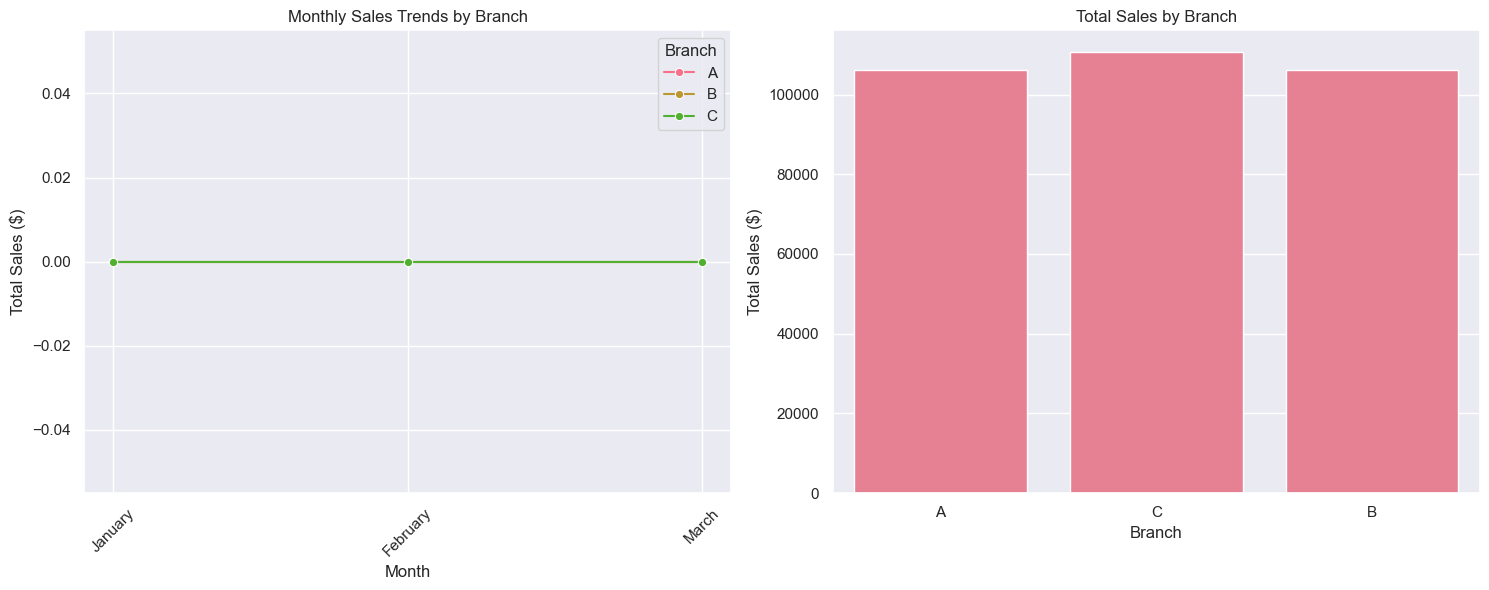


                        Customer Demographics by Branch                         

Customer Type Distribution (%):
Customer type  Member  Normal
Branch                       
A              49.118  50.882
B              49.699  50.301
C              51.524  48.476

Gender Distribution (%):
Gender  Female   Male
Branch               
A       47.353 52.647
B       48.795 51.205
C       54.268 45.732


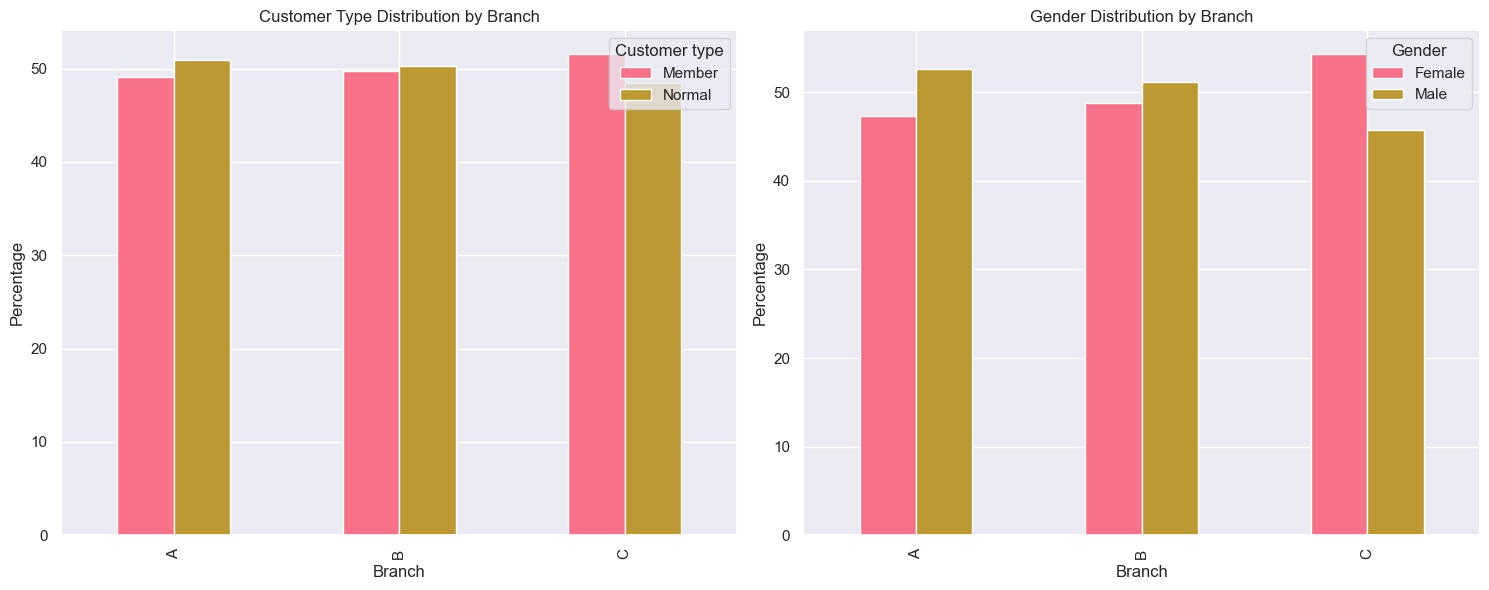


                         Product Mix Analysis by Branch                         

Product Mix Distribution (%):
Product line  Electronic Accessories  Fashion Accessories  Food And Beverages  \
Branch                                                                          
A                             17.647               15.000              17.059   
B                             16.566               18.675              15.060   
C                             16.768               19.817              20.122   

Product line  Health And Beauty  Home And Lifestyle  Sports And Travel  
Branch                                                                  
A                        13.824              19.118             17.353  
B                        15.964              15.060             18.675  
C                        15.854              13.720             13.720  


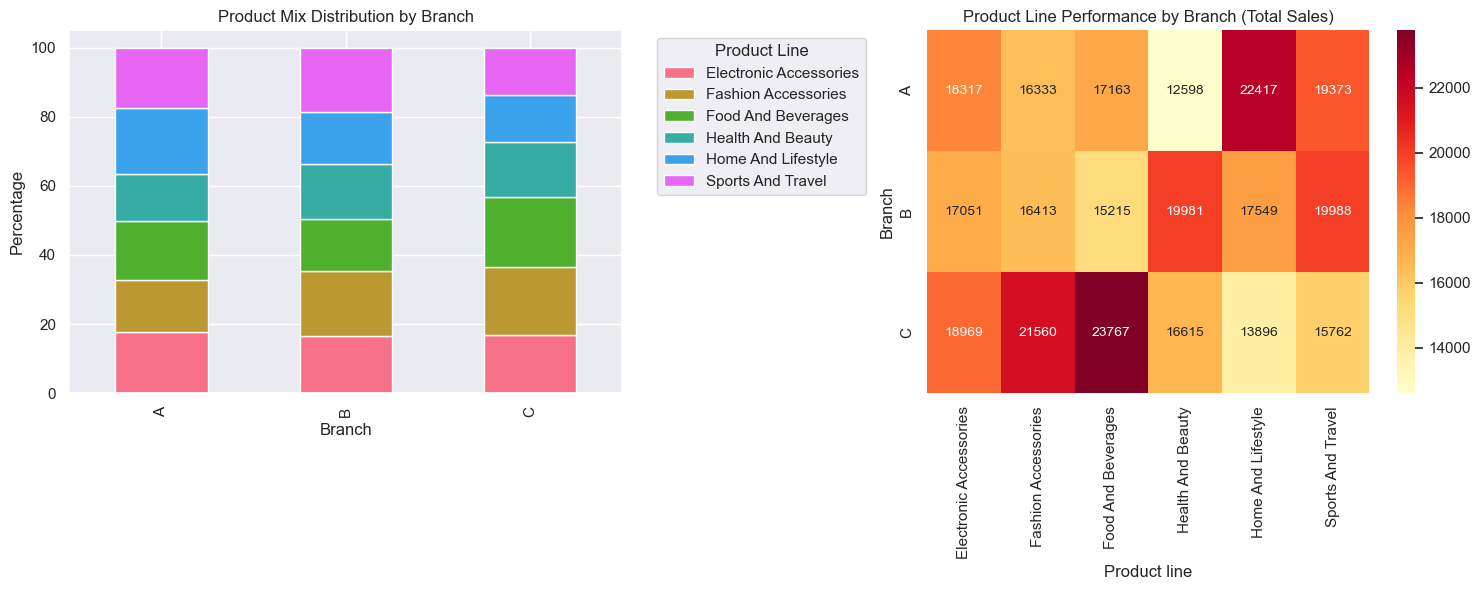


                         Peak Period Analysis by Branch                         


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3904824696.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sales = df.groupby(['Branch', 'DayOfWeek'])['Total'].agg(['count', 'sum']).reset_index()
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3904824696.py:159: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3904824696.py:165: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)


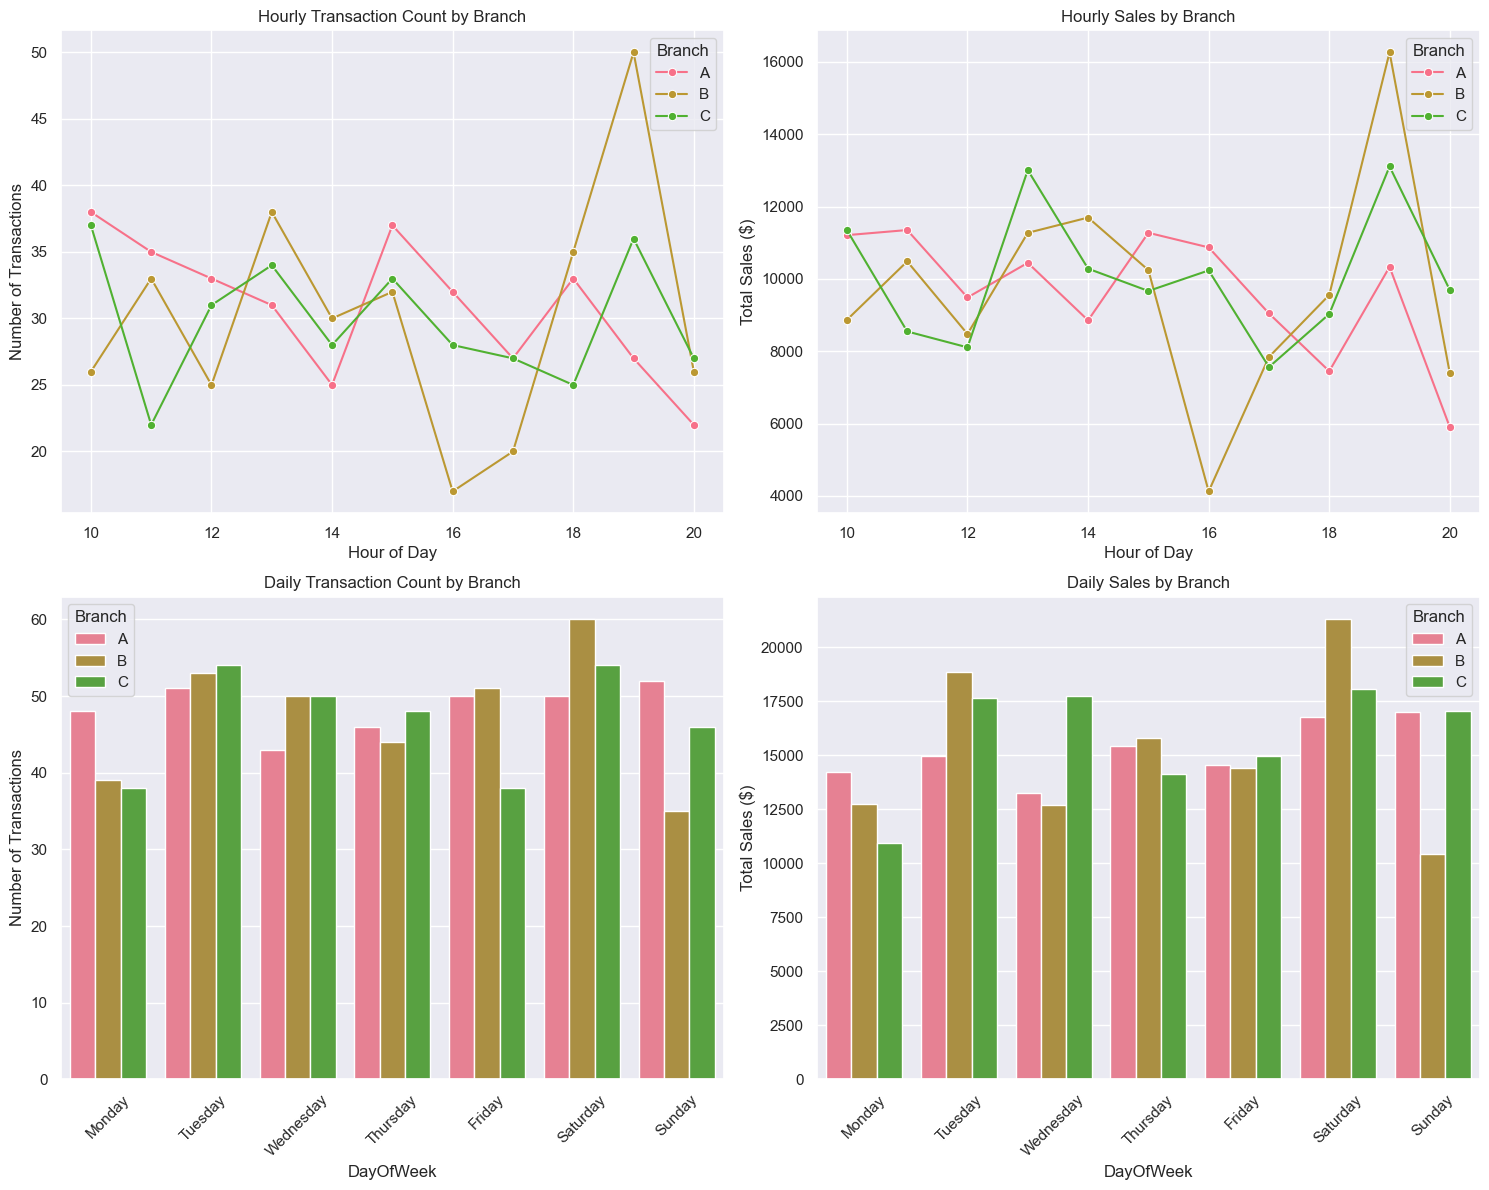


                              Statistical Analysis                              

Sales Difference Between Branches:
ANOVA test results: F-statistic = 0.88, p-value = 0.4132

Customer Type Distribution Test:
Chi-square test results: chi2 = 0.42, p-value = 0.8111


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

# order for categorical variables
DAY_ORDER = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
MONTH_ORDER = ['January', 'February', 'March']

# Helper functions
def print_section_header(title):
    print(f"\n{'='*80}\n{title.center(80)}\n{'='*80}")

def set_plot_style():
    sns.set_theme(style="darkgrid")
    sns.set_palette("husl")
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 10

# 1. Sales Metrics by Branch
def analyze_branch_sales(df):
    print_section_header("Sales Performance by Branch")
    
    # Overall sales metrics by branch
    branch_metrics = df.groupby('Branch').agg({
        'Total': ['count', 'sum', 'mean', 'std'],
        'Quantity': ['sum', 'mean'],
        'gross income': ['sum', 'mean'],
        'Rating': ['mean', 'std']
    }).round(3)
    
    print("\nBranch Performance Metrics:")
    print(branch_metrics)
    
    # Monthly sales trends
    df['Month'] = pd.Categorical(df['Month'], categories=MONTH_ORDER, ordered=True)
    monthly_sales = df.groupby(['Branch', 'Month'])['Total'].sum().reset_index()
    
    # Visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Monthly sales trends
    sns.lineplot(data=monthly_sales, x='Month', y='Total', hue='Branch', 
                marker='o', ax=ax1)
    ax1.set_title('Monthly Sales Trends by Branch')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylabel('Total Sales ($)')
    
    # Total sales by branch
    sns.barplot(data=df, x='Branch', y='Total', estimator='sum', 
                errorbar=None, ax=ax2)
    ax2.set_title('Total Sales by Branch')
    ax2.set_ylabel('Total Sales ($)')
    
    plt.tight_layout()
    plt.show()
    
    return branch_metrics

# 2. Customer Demographics by Branch
def analyze_branch_demographics(df):
    print_section_header("Customer Demographics by Branch")
    
    # Customer type distribution
    customer_type_dist = pd.crosstab(df['Branch'], df['Customer type'], 
                                    normalize='index') * 100
    print("\nCustomer Type Distribution (%):")
    print(customer_type_dist.round(3))
    
    # Gender distribution
    gender_dist = pd.crosstab(df['Branch'], df['Gender'], 
                             normalize='index') * 100
    print("\nGender Distribution (%):")
    print(gender_dist.round(3))
    
    # Visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Customer type distribution
    customer_type_dist.plot(kind='bar', ax=ax1)
    ax1.set_title('Customer Type Distribution by Branch')
    ax1.set_ylabel('Percentage')
    ax1.legend(title='Customer type')
    
    # Gender distribution
    gender_dist.plot(kind='bar', ax=ax2)
    ax2.set_title('Gender Distribution by Branch')
    ax2.set_ylabel('Percentage')
    ax2.legend(title='Gender')
    
    plt.tight_layout()
    plt.show()
    
    return customer_type_dist, gender_dist

# 3. Product Mix Analysis
def analyze_product_mix(df):
    print_section_header("Product Mix Analysis by Branch")
    
    # Product line distribution
    product_mix = pd.crosstab(df['Branch'], df['Product line'], 
                             normalize='index') * 100
    print("\nProduct Mix Distribution (%):")
    print(product_mix.round(3))
    
    # Visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    product_mix.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_title('Product Mix Distribution by Branch')
    ax1.set_ylabel('Percentage')
    ax1.legend(title='Product Line', bbox_to_anchor=(1.05, 1))
    
    top_products = df.groupby(['Branch', 'Product line'])['Total'].sum().unstack()
    sns.heatmap(top_products, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax2)
    ax2.set_title('Product Line Performance by Branch (Total Sales)')
    
    plt.tight_layout()
    plt.show()
    
    return product_mix

# 4. Peak Hours/Days Analysis
def analyze_peak_periods(df):
    print_section_header("Peak Period Analysis by Branch")
    
    # Create hour and day categories
    df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=DAY_ORDER, ordered=True)
    
    # Hourly analysis
    hourly_sales = df.groupby(['Branch', 'Hour'])['Total'].agg(['count', 'sum']).reset_index()
    
    # Daily analysis
    daily_sales = df.groupby(['Branch', 'DayOfWeek'])['Total'].agg(['count', 'sum']).reset_index()
    daily_sales = daily_sales.sort_values(['Branch', 'DayOfWeek'])
    
    # Visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Hourly transaction count
    sns.lineplot(data=hourly_sales, x='Hour', y='count', hue='Branch', 
                marker='o', ax=ax1)
    ax1.set_title('Hourly Transaction Count by Branch')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Number of Transactions')
    
    # Hourly sales
    sns.lineplot(data=hourly_sales, x='Hour', y='sum', hue='Branch', 
                marker='o', ax=ax2)
    ax2.set_title('Hourly Sales by Branch')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Total Sales ($)')
    
    # Daily transaction count
    sns.barplot(data=daily_sales, x='DayOfWeek', y='count', hue='Branch', ax=ax3)
    ax3.set_title('Daily Transaction Count by Branch')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
    ax3.set_ylabel('Number of Transactions')
    
    # Daily sales
    sns.barplot(data=daily_sales, x='DayOfWeek', y='sum', hue='Branch', ax=ax4)
    ax4.set_title('Daily Sales by Branch')
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
    ax4.set_ylabel('Total Sales ($)')
    
    plt.tight_layout()
    plt.show()
    
    return hourly_sales, daily_sales

# Main analysis function
def run_branch_analysis(df):

    set_plot_style()
    
    # Run analysis
    sales_metrics = analyze_branch_sales(df)
    demo_metrics = analyze_branch_demographics(df)
    product_metrics = analyze_product_mix(df)
    time_metrics = analyze_peak_periods(df)
    
    # Statistical tests
    print_section_header("Statistical Analysis")
    
    # ANOVA test for sales differences
    sales_test = stats.f_oneway(*[group['Total'] for _, group in df.groupby('Branch')])
    print("\nSales Difference Between Branches:")
    print(f"ANOVA test results: F-statistic = {sales_test.statistic:.2f}, p-value = {sales_test.pvalue:.4f}")
    
    # Chi-square test for customer type distribution
    ct_table = pd.crosstab(df['Branch'], df['Customer type'])
    chi2, p_val, _, _ = chi2_contingency(ct_table)
    print("\nCustomer Type Distribution Test:")
    print(f"Chi-square test results: chi2 = {chi2:.2f}, p-value = {p_val:.4f}")
    
    return {
        'sales_metrics': sales_metrics,
        'demographic_metrics': demo_metrics,
        'product_metrics': product_metrics,
        'time_metrics': time_metrics
    }

results = run_branch_analysis(df)

1. Sales Performance by Branch:

- Branch C has the highest total sales ($110,568.71) and average transaction value ($337.10)
- All branches have similar number of transactions (328-340)
- Branch C also has highest gross income ($5,265.18) and quantity sold (1,831 items)
- Customer ratings are similar across branches (6.82-7.07), with Branch C slightly higher

2. Customer Demographics by Branch:

Customer Type Distribution:
- Branches A and B have slightly more Normal customers (~50.3-50.8%)
- ranch C has more Members (51.5%)

Gender Distribution:
* Branches A and B have more male customers (52.6% and 51.2%)
* Branch C has notably more female customers (54.3%)

3. Product Mix Distribution:

Branch differences:
* Branch A: Stronger in Electronic Accessories (17.6%) and Home And Lifestyle (19.1%)
* Branch B: Strong in Fashion Accessories (18.7%) and Sports And Travel (18.7%)
* Branch C: Excels in Food And Beverages (20.1%) and Fashion Accessories (19.8%)

4. Statistical Analysis:

Sales Difference (ANOVA test: F=0.88, p=0.4132)
* p-value > 0.05 indicates no statistically significant difference in sales between branches

Customer Type Distribution (Chi-square: chi2=0.42, p=0.8111)
* p-value > 0.05 suggests customer type distribution is similar across branches

- Hourly Transaction Count shows the number of sales made per hour
- Hourly Sales shows the monetary value of those transactions
- For example, you might have fewer transactions in an hour but higher total sales if those transactions were high-value purchases

Recommendations for Branch Performance:

Branch C's Successful Practices:
- Study and replicate Branch C's customer service model
- Analyze female customer attraction strategies
- Implement successful membership conversion tactics

Product Strategy:
- Share successful category management practices between branches
- Consider local demographic preferences in inventory planning
- Optimize product mix based on profitability

Service Improvements:
- Standardize best practices across branches
- Focus on member conversion in Branches A and B
- Enhance gender-specific marketing strategies

## Customer Segmentation

=== RFM Analysis ===
  Customer_Type  Recency  Frequency   Monetary
0        Member        0        501 164223.444
1        Normal        0        499 158743.305

=== Purchase Patterns ===


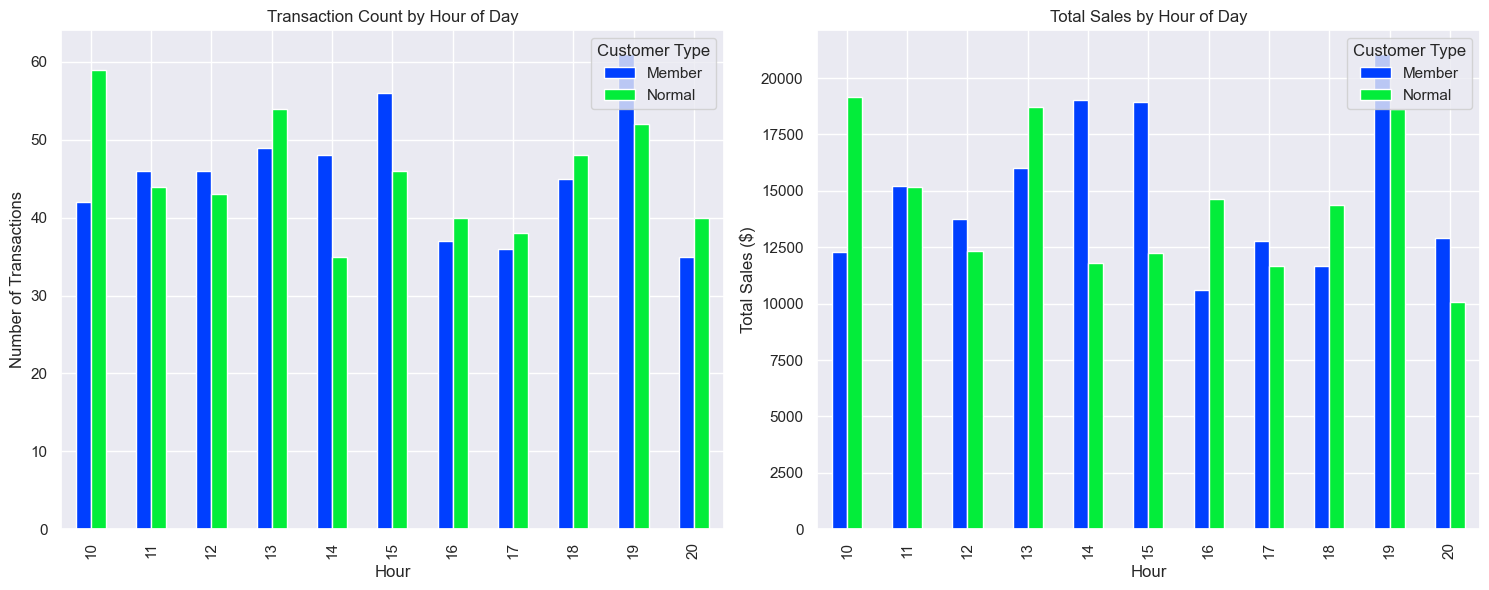


=== Product Preferences ===


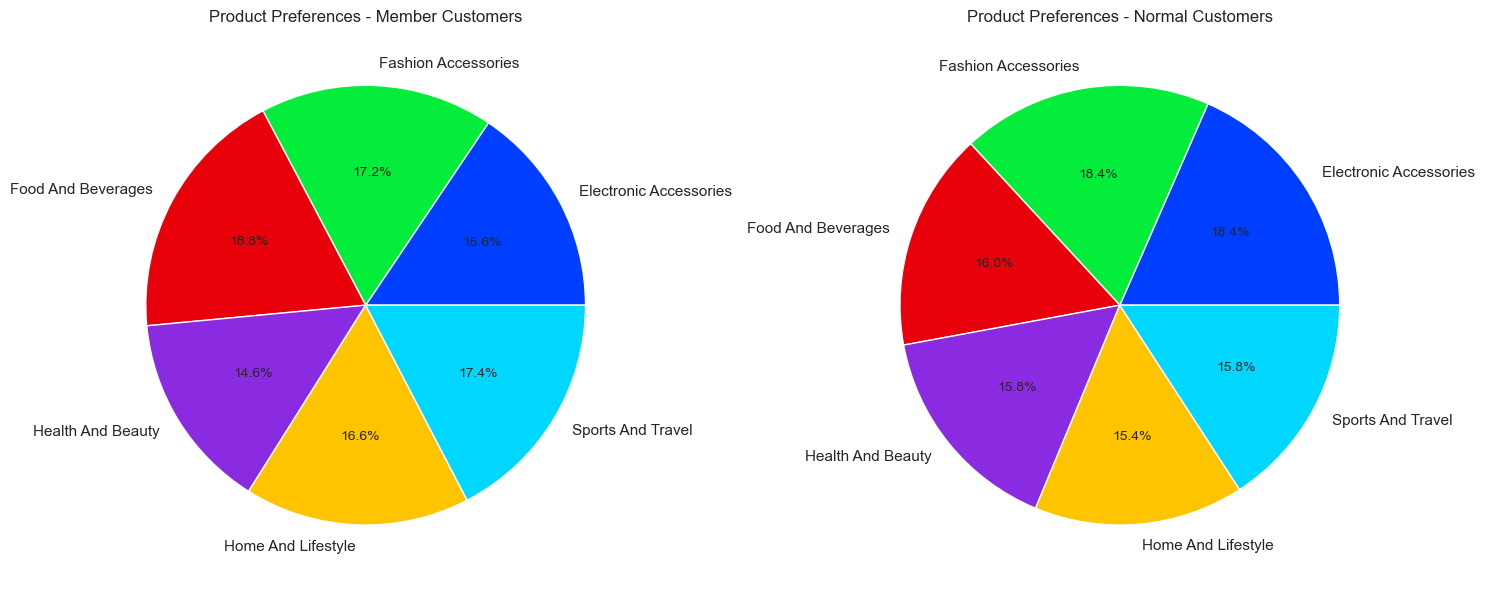

Product line   Electronic Accessories  Fashion Accessories  \
Customer type                                                
Member                         15.569               17.166   
Normal                         18.437               18.437   

Product line   Food And Beverages  Health And Beauty  Home And Lifestyle  \
Customer type                                                              
Member                     18.762             14.571              16.567   
Normal                     16.032             15.832              15.431   

Product line   Sports And Travel  
Customer type                     
Member                    17.365  
Normal                    15.832  

=== Membership Analysis ===


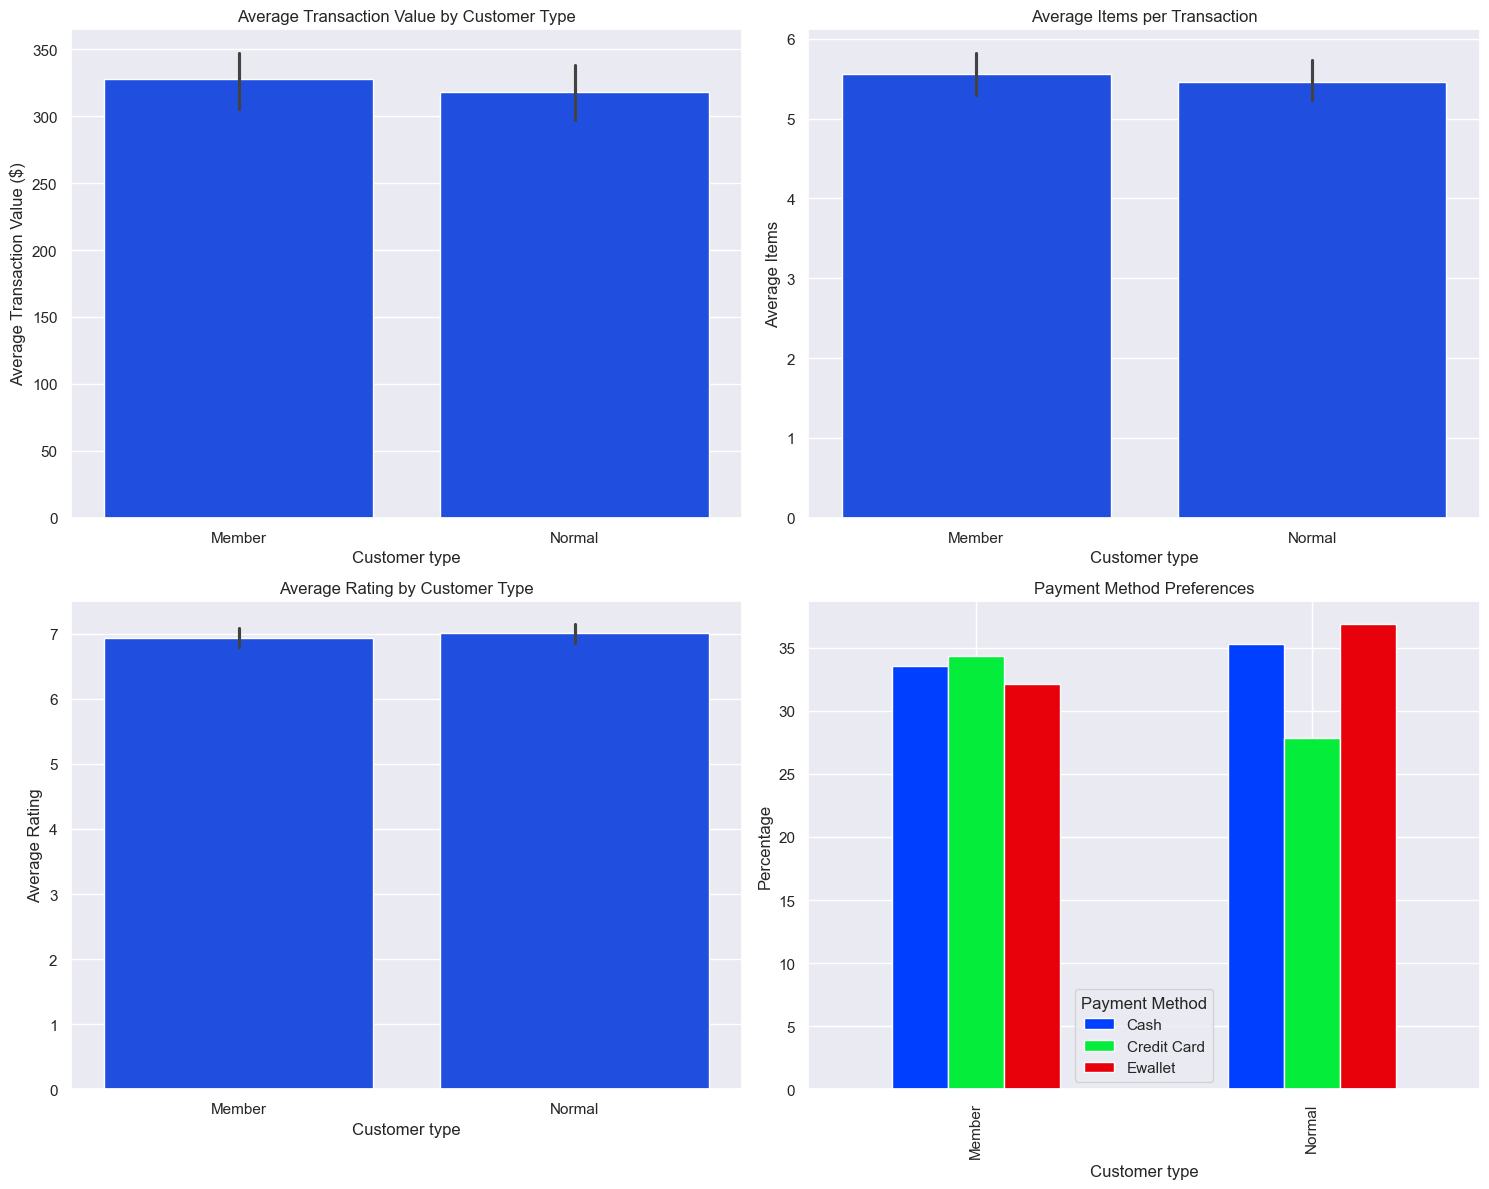


Membership Statistics:
              Total                    Quantity Rating gross income
              count    mean        sum     mean   mean          sum
Customer type                                                      
Member          501 327.790 164223.440    5.560  6.940     7820.160
Normal          499 318.120 158743.300    5.460  7.010     7559.200

Payment Preferences (%):
Payment         Cash  Credit Card  Ewallet
Customer type                             
Member        33.533       34.331   32.136
Normal        35.271       27.856   36.874


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-bright')

def perform_rfm_analysis(df):
    # Calculate RFM metrics
    # Get the most recent date in the dataset
    max_date = df['Date'].max()
    
    # Calculate RFM metrics for each customer
    rfm = df.groupby('Customer type').agg({
        'Date': lambda x: (max_date - x.max()).days,  # Recency
        'Invoice ID': 'count',  # Frequency
        'Total': 'sum'  # Monetary
    }).reset_index()
    
    # Rename columns
    rfm.columns = ['Customer_Type', 'Recency', 'Frequency', 'Monetary']
    
    return rfm

def analyze_purchase_patterns(df):
    # Purchase patterns by hour
    hourly_patterns = df.groupby(['Hour', 'Customer type'])['Total'].agg(['count', 'sum']).reset_index()
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Transaction Count by Hour
    hourly_pivot_count = hourly_patterns.pivot(index='Hour', columns='Customer type', values='count')
    hourly_pivot_count.plot(kind='bar', ax=ax1)
    ax1.set_title('Transaction Count by Hour of Day')
    ax1.set_xlabel('Hour')
    ax1.set_ylabel('Number of Transactions')
    ax1.legend(title='Customer Type')
    
    # Total Sales by Hour
    hourly_pivot_sum = hourly_patterns.pivot(index='Hour', columns='Customer type', values='sum')
    hourly_pivot_sum.plot(kind='bar', ax=ax2)
    ax2.set_title('Total Sales by Hour of Day')
    ax2.set_xlabel('Hour')
    ax2.set_ylabel('Total Sales ($)')
    ax2.legend(title='Customer Type')
    
    plt.tight_layout()
    plt.show()
    
    return hourly_patterns

def analyze_product_preferences(df):
    # Calculate product preferences by customer type
    product_prefs = pd.crosstab(df['Customer type'], df['Product line'], normalize='index') * 100
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Pie chart for Member customers
    member_prefs = product_prefs.loc['Member']
    ax1.pie(member_prefs, labels=member_prefs.index, autopct='%1.1f%%')
    ax1.set_title('Product Preferences - Member Customers')
    
    # Pie chart for Normal customers
    normal_prefs = product_prefs.loc['Normal']
    ax2.pie(normal_prefs, labels=normal_prefs.index, autopct='%1.1f%%')
    ax2.set_title('Product Preferences - Normal Customers')
    
    plt.tight_layout()
    plt.show()
    
    return product_prefs

def analyze_membership_patterns(df):
    # Analyze various membership patterns
    member_stats = df.groupby('Customer type').agg({
        'Total': ['count', 'mean', 'sum'],
        'Quantity': 'mean',
        'Rating': 'mean',
        'gross income': 'sum'
    }).round(2)
    
    # Payment method preferences
    payment_prefs = pd.crosstab(df['Customer type'], df['Payment'], normalize='index') * 100
    
    # Visualize member vs non-member statistics
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Average transaction value
    sns.barplot(x='Customer type', y='Total', data=df, ax=axes[0, 0])
    axes[0, 0].set_title('Average Transaction Value by Customer Type')
    axes[0, 0].set_ylabel('Average Transaction Value ($)')
    
    # Average quantity per transaction
    sns.barplot(x='Customer type', y='Quantity', data=df, ax=axes[0, 1])
    axes[0, 1].set_title('Average Items per Transaction')
    axes[0, 1].set_ylabel('Average Items')
    
    # Average rating
    sns.barplot(x='Customer type', y='Rating', data=df, ax=axes[1, 0])
    axes[1, 0].set_title('Average Rating by Customer Type')
    axes[1, 0].set_ylabel('Average Rating')
    
    # Payment method preferences
    payment_prefs.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Payment Method Preferences')
    axes[1, 1].set_ylabel('Percentage')
    axes[1, 1].legend(title='Payment Method')
    
    plt.tight_layout()
    plt.show()
    
    return member_stats, payment_prefs

def run_customer_segmentation(df):
    # Ensure Hour column exists
    if 'Hour' not in df.columns:
        df['Hour'] = pd.to_datetime(df['Time']).dt.hour
    
    print("=== RFM Analysis ===")
    rfm_metrics = perform_rfm_analysis(df)
    print(rfm_metrics)
    
    print("\n=== Purchase Patterns ===")
    hourly_patterns = analyze_purchase_patterns(df)
    
    print("\n=== Product Preferences ===")
    product_preferences = analyze_product_preferences(df)
    print(product_preferences)
    
    print("\n=== Membership Analysis ===")
    member_stats, payment_prefs = analyze_membership_patterns(df)
    print("\nMembership Statistics:")
    print(member_stats)
    print("\nPayment Preferences (%):")
    print(payment_prefs)
    
    return {
        'rfm_metrics': rfm_metrics,
        'hourly_patterns': hourly_patterns,
        'product_preferences': product_preferences,
        'member_stats': member_stats,
        'payment_preferences': payment_prefs
    }

results = run_customer_segmentation(df)

Key Insights:

1. RFM Analysis:
- Members slightly higher frequency (501 vs 499 transactions)
- Members higher total monetary value ($164,223 vs $158,743)
- Both customer types show active recent engagement


2. Purchase Patterns:
- Peak transaction hours: 10AM, 1PM, and 7PM
- Members more active during evening hours
- Normal customers show higher morning activity


3. Product Preferences:
Members:
- Higher preference for Food & Beverages (18.8%)
- Balanced across other categories
- Normal Customers:
- Strong preference for Electronic Accessories (18.4%)
- More even distribution across categories


4. Membership Statistics:
- Members average higher transaction value ($327.79 vs $318.12)
- Members slightly higher quantity per transaction (5.56 vs 5.46)
- Normal customers show slightly higher satisfaction ratings (7.01 vs 6.94)


5. Payment Preferences:
- Members: Evenly distributed across payment methods
- Normal customers: Prefer E-wallet (36.9%) and Cash (35.3%)


Recommendations for Customer Segmentation:

Targeted Marketing:
- Create time-specific promotions based on customer type patterns
- Develop category-specific member benefits
- Design loyalty programs around preferred product categories

Service Enhancement:
- Optimize staffing during peak hours for each customer type
- Improve member experience to boost satisfaction ratings
- Develop targeted promotions for less-preferred categories

Payment Strategy:
- Promote credit card usage among normal customers
- Consider payment method-specific rewards
- Streamline popular payment methods during peak hours

Membership Program:
- Create incentives for normal customers to convert to membership
- Develop category-specific member benefits
- Implement time-based member promotions

Product Development:
- Align inventory with time-based purchasing patterns
- Create bundle offers based on customer type preferences
- Develop exclusive member-only products in popular categories

## Temporal Analysis / Seasonal Patterns

In [41]:
transaction_counts = df.groupby('DayOfWeek')['Total'].count().reset_index()

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/648639152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_counts = df.groupby('DayOfWeek')['Total'].count().reset_index()


=== Daily/Weekly Trends ===


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3538047595.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sales = df.groupby(['DayOfWeek']).agg({
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3538047595.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_counts = df.groupby('DayOfWeek')['Total'].count().reset_index()


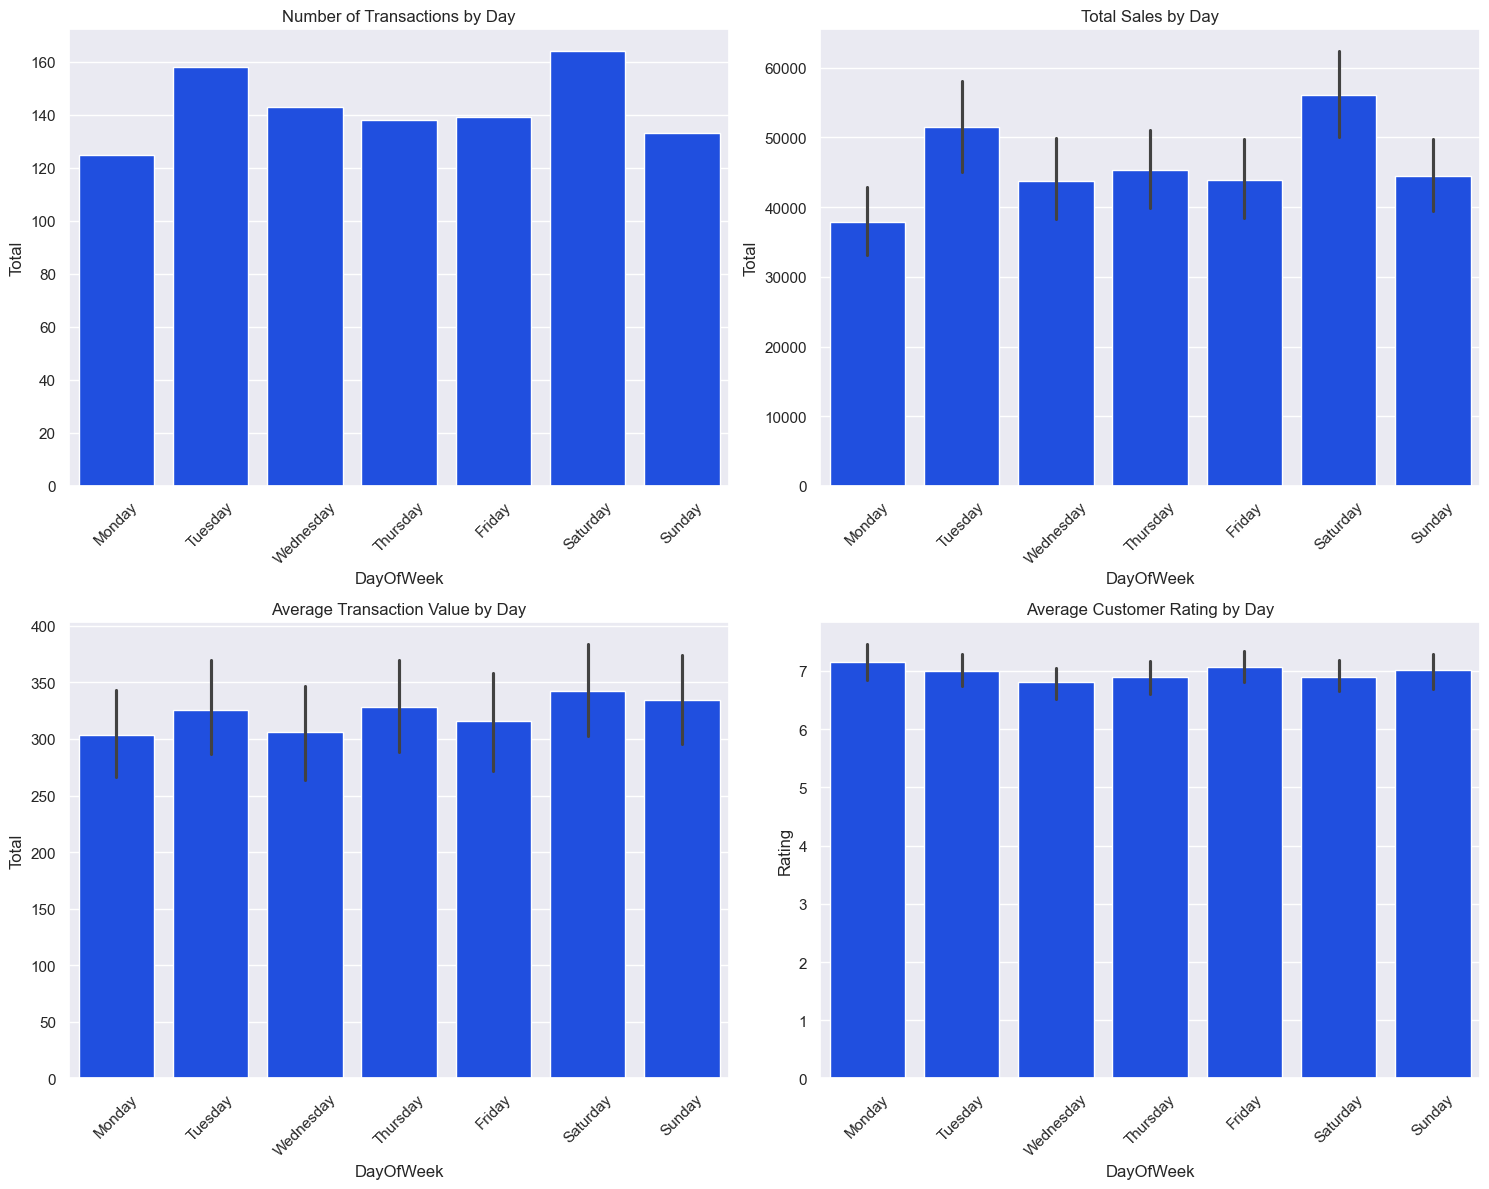

          Total                   Quantity Rating
          count       sum    mean      sum   mean
DayOfWeek                                        
Monday      125 37899.080 303.190      638  7.150
Tuesday     158 51482.250 325.840      862  7.000
Wednesday   143 43731.140 305.810      800  6.810
Thursday    138 45349.250 328.620      755  6.890
Friday      139 43926.340 316.020      758  7.080
Saturday    164 56120.810 342.200      919  6.900
Sunday      133 44457.890 334.270      778  7.010

=== Seasonal Patterns ===


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3538047595.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_metrics = df.groupby('Month').agg({
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3538047595.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_counts = df.groupby('Month')['Total'].count().reset_index()


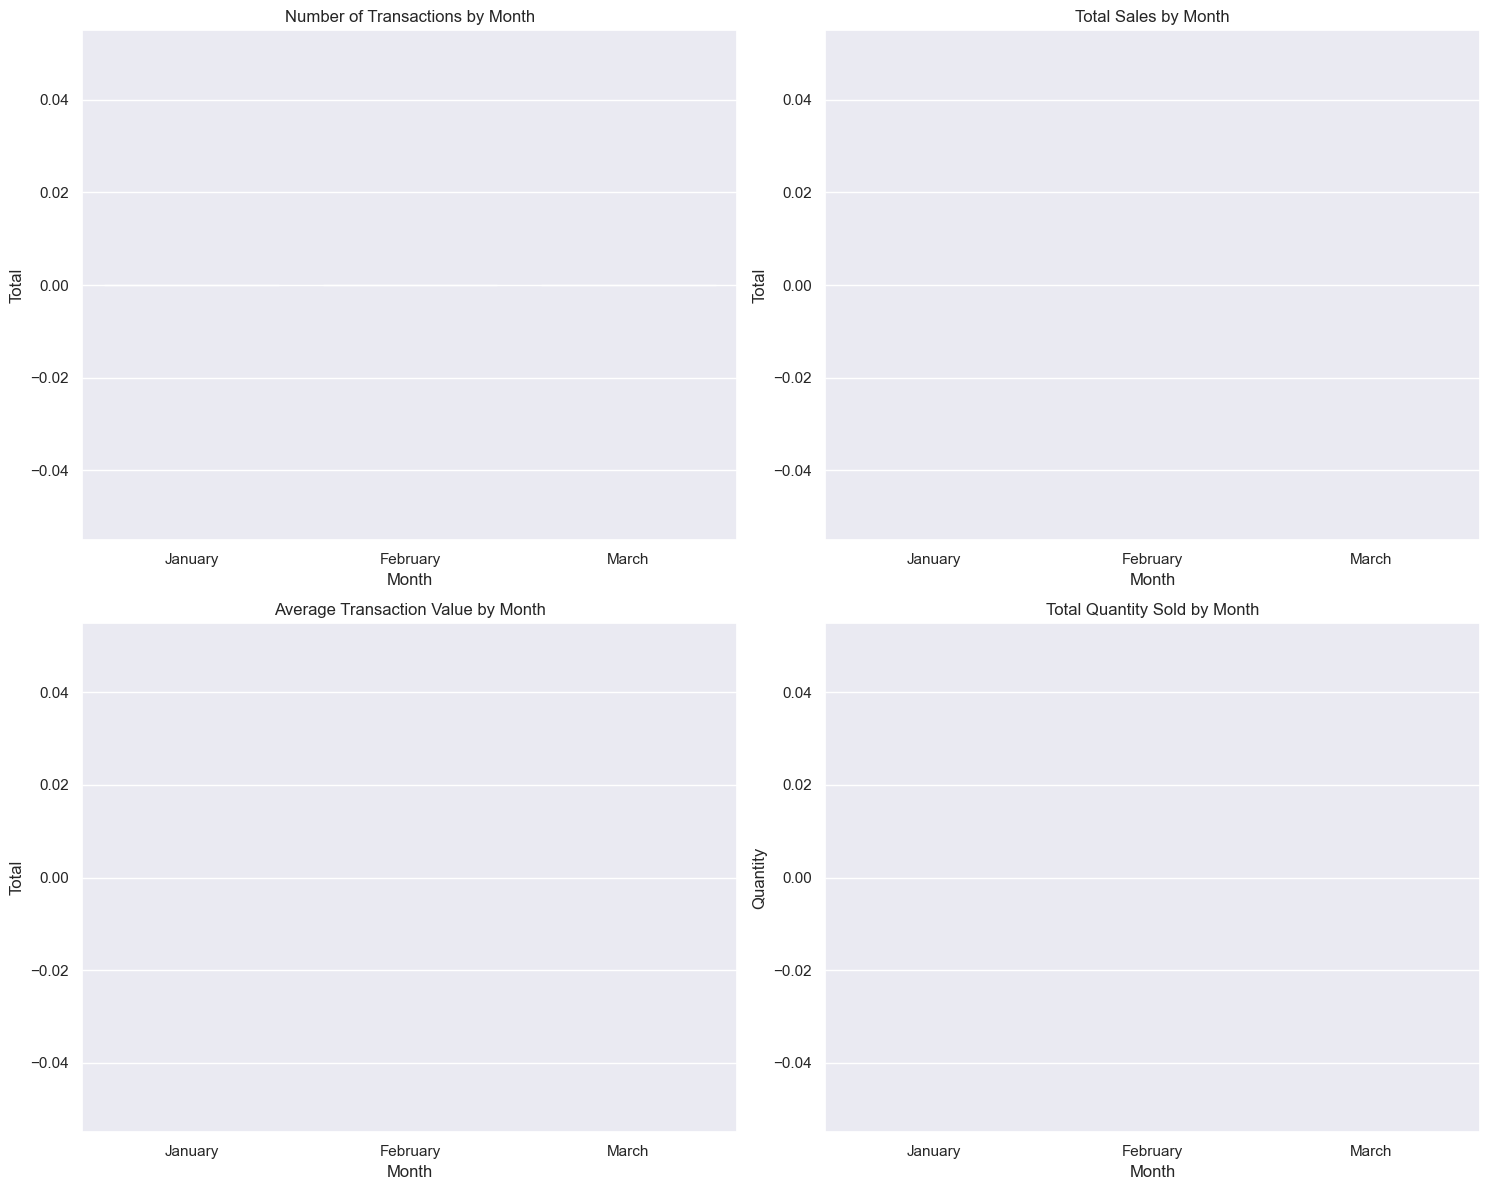

         Total            Quantity Rating
         count   sum mean      sum   mean
Month                                    
January      0 0.000  NaN        0    NaN
February     0 0.000  NaN        0    NaN
March        0 0.000  NaN        0    NaN

=== Time of Day Analysis ===


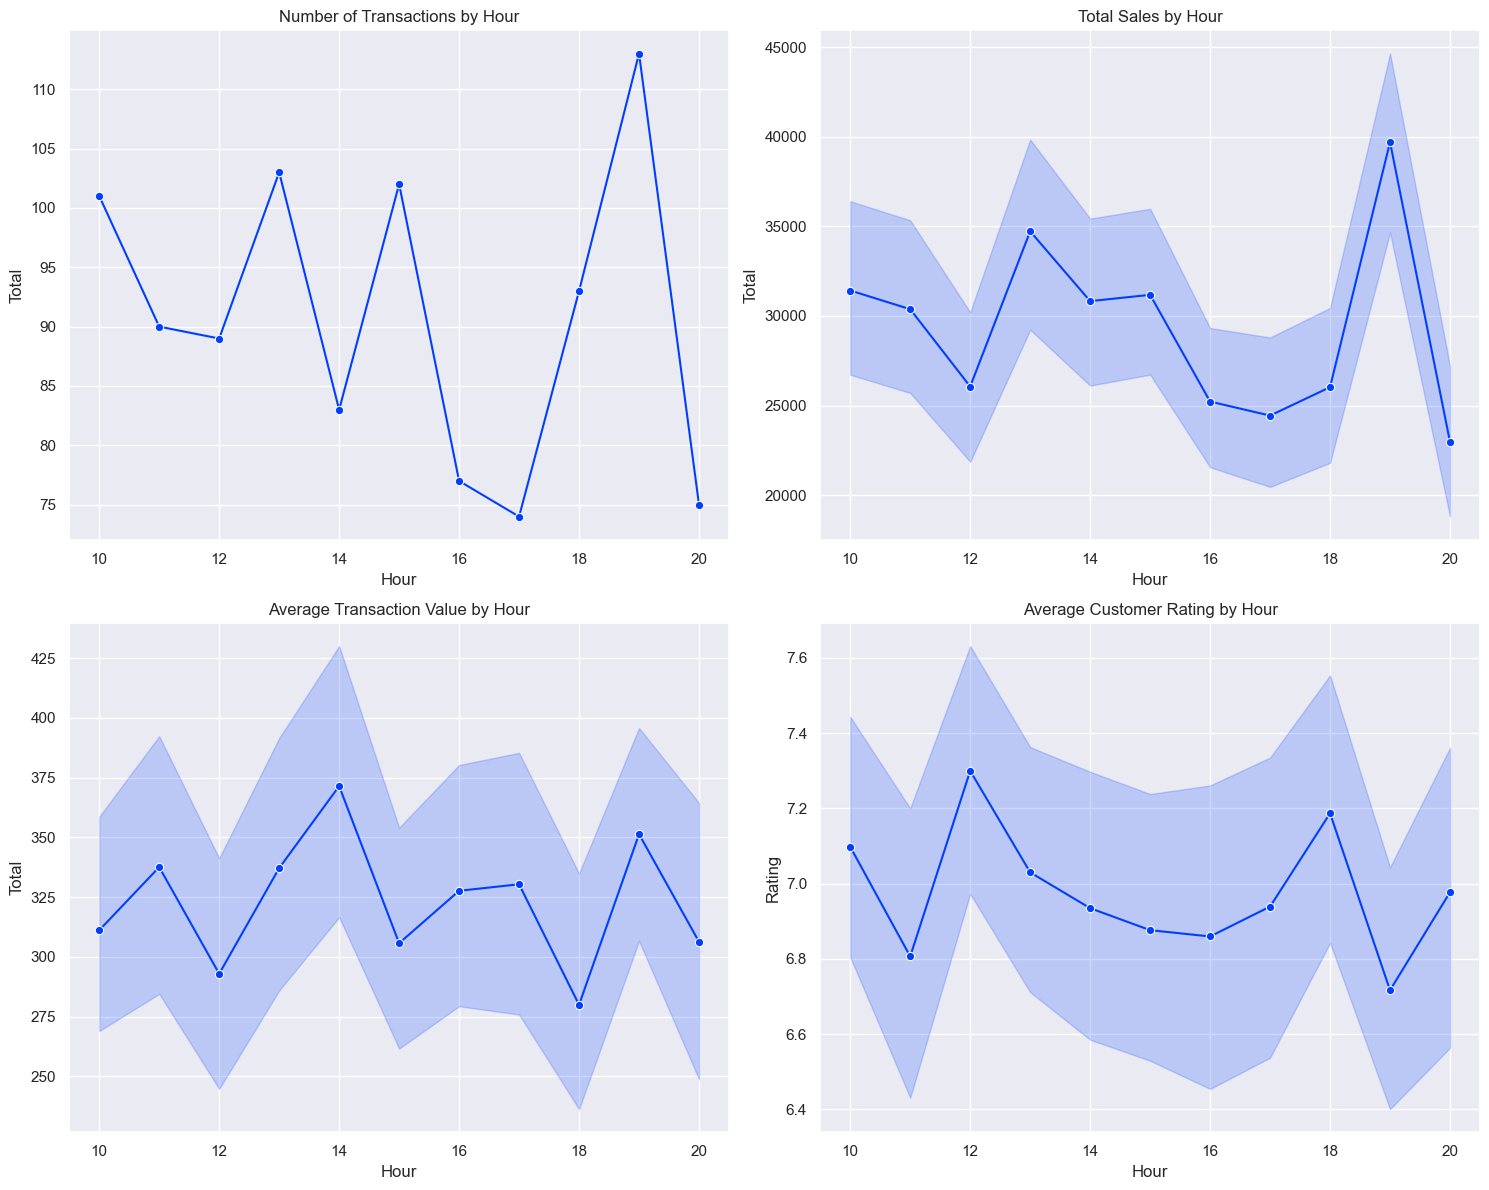

     Total                   Quantity Rating
     count       sum    mean     mean   mean
Hour                                        
10     101 31421.480 311.100    5.200  7.100
11      90 30377.330 337.530    5.700  6.810
12      89 26065.880 292.880    5.630  7.300
13     103 34723.230 337.120    5.680  7.030
14      83 30828.400 371.430    5.960  6.930
15     102 31179.510 305.680    5.200  6.880
16      77 25226.320 327.610    5.450  6.860
17      74 24445.220 330.340    5.610  6.940
18      93 26030.340 279.900    5.110  7.190
19     113 39699.510 351.320    5.740  6.720
20      75 22969.530 306.260    5.360  6.980

=== Product Category Trends ===


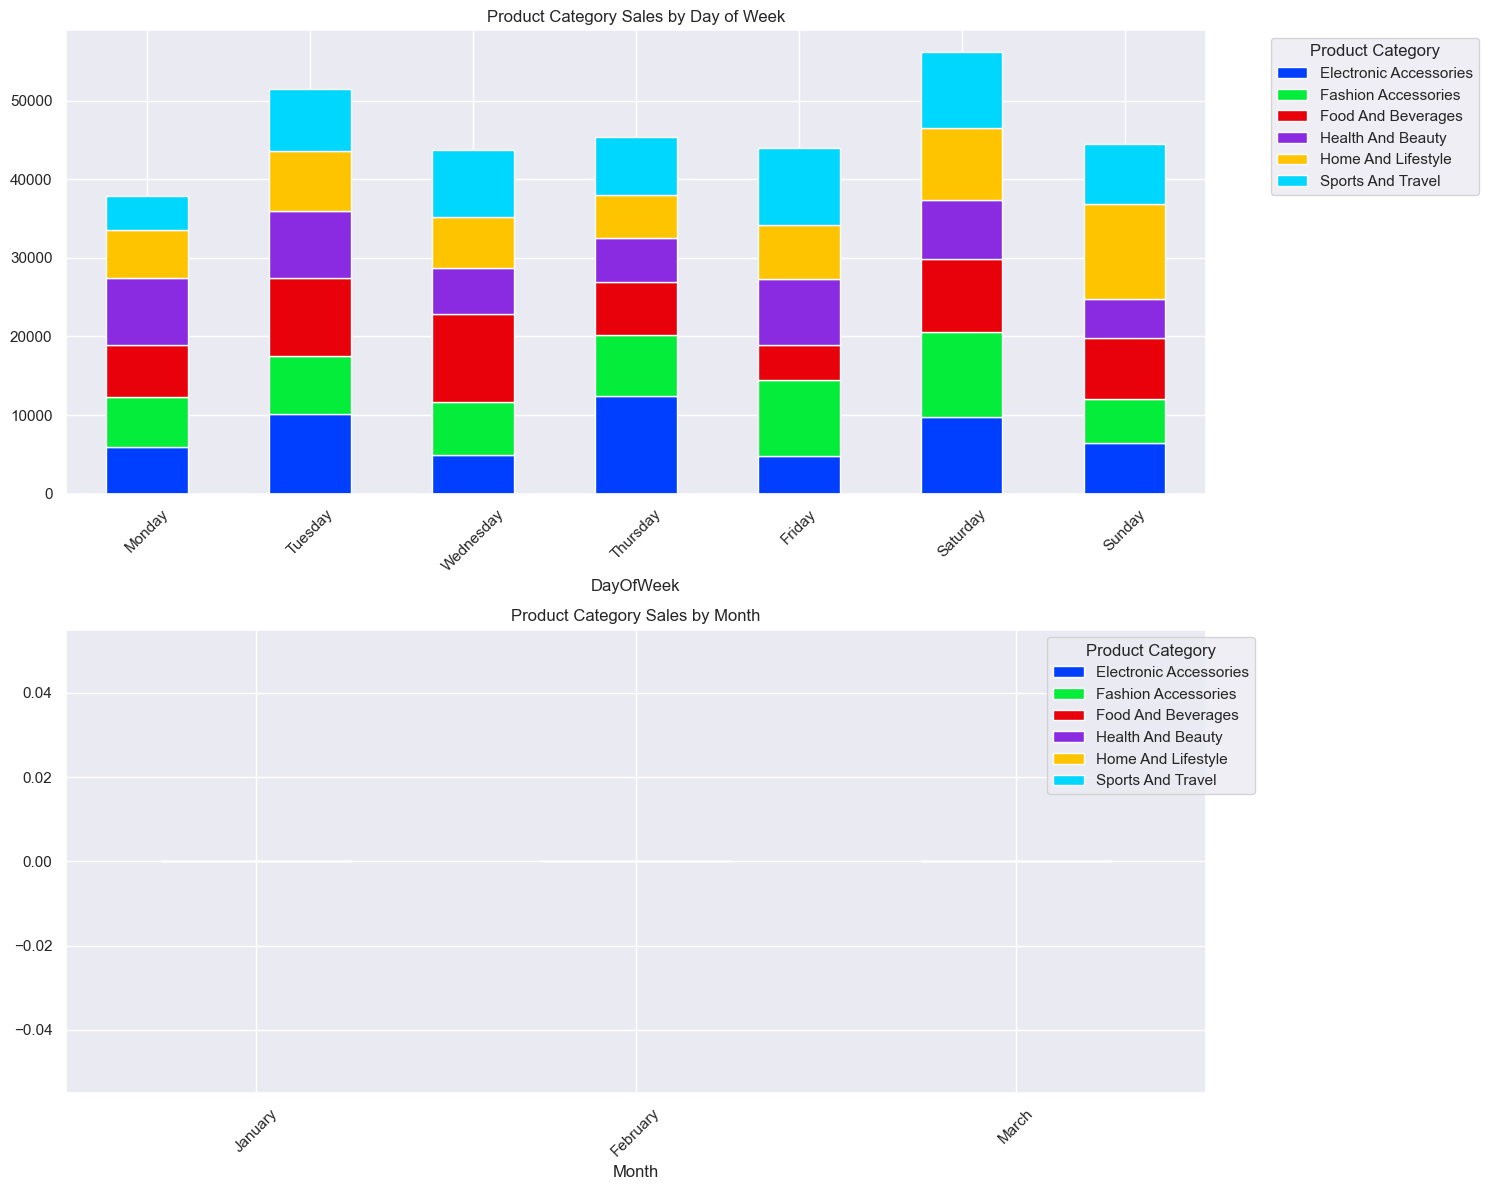

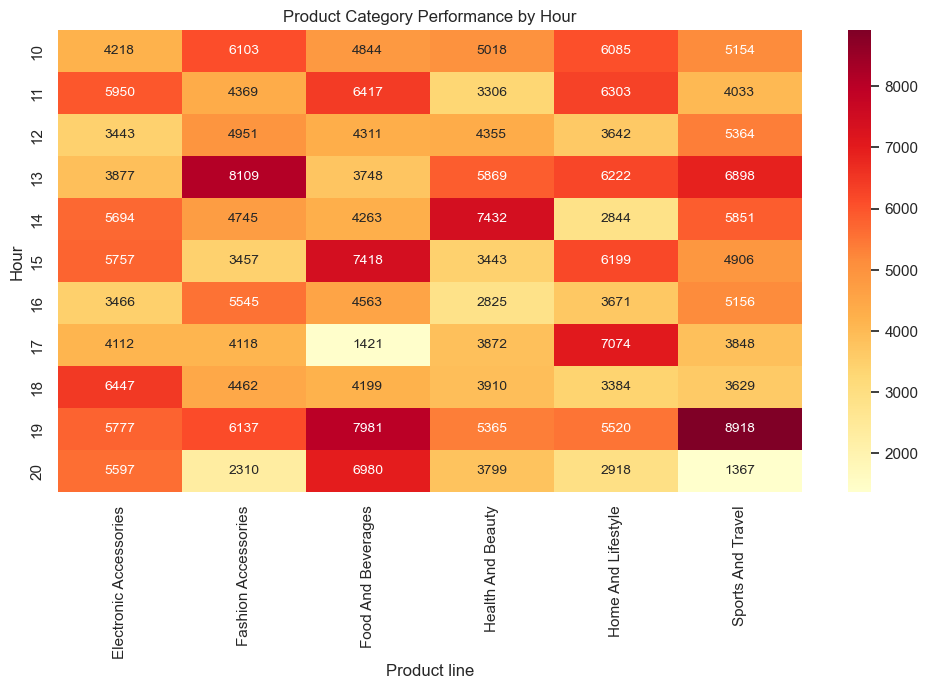


Daily Product Category Performance:
Product line  Electronic Accessories  Fashion Accessories  Food And Beverages  \
DayOfWeek                                                                       
Monday                      5922.130             6419.520            6612.230   
Tuesday                    10110.920             7423.280            9848.300   
Wednesday                   4864.910             6819.780           11188.480   
Thursday                   12435.160             7725.890            6798.590   
Friday                      4848.150             9554.760            4558.430   
Saturday                    9744.380            10778.920            9375.400   
Sunday                      6411.880             5583.740            7763.420   

Product line  Health And Beauty  Home And Lifestyle  Sports And Travel  
DayOfWeek                                                               
Monday                 8448.240            6095.340           4401.620  
Tuesday       

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-bright')

def analyze_daily_weekly_trends(df):
    # Create daily aggregations
    daily_sales = df.groupby(['DayOfWeek']).agg({
        'Total': ['count', 'sum', 'mean'],
        'Quantity': 'sum',
        'Rating': 'mean'
    }).round(2)
    
    # Ensure proper day order
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)
    
    #  visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Daily transaction count
    transaction_counts = df.groupby('DayOfWeek')['Total'].count().reset_index()
    sns.barplot(data=transaction_counts, x='DayOfWeek', y='Total', ax=axes[0,0])
    axes[0,0].set_title('Number of Transactions by Day')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Daily sales total
    sns.barplot(data=df, x='DayOfWeek', y='Total', 
                estimator=np.sum, ax=axes[0,1])
    axes[0,1].set_title('Total Sales by Day')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Daily average transaction value
    sns.barplot(data=df, x='DayOfWeek', y='Total', 
                estimator=np.mean, ax=axes[1,0])
    axes[1,0].set_title('Average Transaction Value by Day')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Daily average rating
    sns.barplot(data=df, x='DayOfWeek', y='Rating', 
                estimator=np.mean, ax=axes[1,1])
    axes[1,1].set_title('Average Customer Rating by Day')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return daily_sales

def analyze_seasonal_patterns(df):
    # Monthly patterns
    monthly_metrics = df.groupby('Month').agg({
        'Total': ['count', 'sum', 'mean'],
        'Quantity': 'sum',
        'Rating': 'mean'
    }).round(2)
    
    # Ensure proper month order
    month_order = ['January', 'February', 'March']
    df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Monthly transaction count
    transaction_counts = df.groupby('Month')['Total'].count().reset_index()
    sns.barplot(data=transaction_counts, x='Month', y='Total', ax=axes[0,0])
    axes[0,0].set_title('Number of Transactions by Month')
    
    # Monthly sales total
    sns.barplot(data=df, x='Month', y='Total', 
                estimator=np.sum, ax=axes[0,1])
    axes[0,1].set_title('Total Sales by Month')
    
    # Monthly average transaction value
    sns.barplot(data=df, x='Month', y='Total', 
                estimator=np.mean, ax=axes[1,0])
    axes[1,0].set_title('Average Transaction Value by Month')
    
    # Monthly quantity sold
    sns.barplot(data=df, x='Month', y='Quantity', 
                estimator=np.sum, ax=axes[1,1])
    axes[1,1].set_title('Total Quantity Sold by Month')
    
    plt.tight_layout()
    plt.show()
    
    return monthly_metrics

def analyze_time_of_day(df):
    # Hourly patterns
    hourly_metrics = df.groupby('Hour').agg({
        'Total': ['count', 'sum', 'mean'],
        'Quantity': 'mean',
        'Rating': 'mean'
    }).round(2)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Hourly transaction count
    transaction_counts = df.groupby('Hour')['Total'].count().reset_index()
    sns.lineplot(data=transaction_counts, x='Hour', y='Total', marker='o', ax=axes[0,0])
    axes[0,0].set_title('Number of Transactions by Hour')
    
    # Hourly sales total
    sns.lineplot(data=df, x='Hour', y='Total', 
                estimator=np.sum, marker='o', ax=axes[0,1])
    axes[0,1].set_title('Total Sales by Hour')
    
    # Hourly average transaction value
    sns.lineplot(data=df, x='Hour', y='Total', 
                estimator=np.mean, marker='o', ax=axes[1,0])
    axes[1,0].set_title('Average Transaction Value by Hour')
    
    # Hourly average rating
    sns.lineplot(data=df, x='Hour', y='Rating', 
                estimator=np.mean, marker='o', ax=axes[1,1])
    axes[1,1].set_title('Average Customer Rating by Hour')
    
    plt.tight_layout()
    plt.show()
    
    return hourly_metrics

def analyze_product_trends(df):
    # Product category trends over time
    product_daily = pd.crosstab(df['DayOfWeek'], df['Product line'], 
                               values=df['Total'], 
                               aggfunc='sum').round(2)
    
    product_monthly = pd.crosstab(df['Month'], df['Product line'], 
                                 values=df['Total'], 
                                 aggfunc='sum').round(2)
    
    # Visualizations
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Daily product category sales
    product_daily.plot(kind='bar', ax=ax1, stacked=True)
    ax1.set_title('Product Category Sales by Day of Week')
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(title='Product Category', bbox_to_anchor=(1.05, 1))
    
    # Monthly product category sales
    product_monthly.plot(kind='bar', ax=ax2, stacked=True)
    ax2.set_title('Product Category Sales by Month')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(title='Product Category', bbox_to_anchor=(1.05, 1))
    
    plt.tight_layout()
    plt.show()
    
    # Heatmap of product performance by hour
    plt.figure(figsize=(12, 6))
    product_hourly = pd.crosstab(df['Hour'], df['Product line'], 
                                values=df['Total'], 
                                aggfunc='sum')
    sns.heatmap(product_hourly, cmap='YlOrRd', annot=True, fmt='.0f')
    plt.title('Product Category Performance by Hour')
    plt.show()
    
    return product_daily, product_monthly

def run_temporal_analysis(df):
    # time features
    if 'Hour' not in df.columns:
        df['Hour'] = pd.to_datetime(df['Time']).dt.hour
    
    print("=== Daily/Weekly Trends ===")
    daily_metrics = analyze_daily_weekly_trends(df)
    print(daily_metrics)
    
    print("\n=== Seasonal Patterns ===")
    monthly_metrics = analyze_seasonal_patterns(df)
    print(monthly_metrics)
    
    print("\n=== Time of Day Analysis ===")
    hourly_metrics = analyze_time_of_day(df)
    print(hourly_metrics)
    
    print("\n=== Product Category Trends ===")
    product_daily, product_monthly = analyze_product_trends(df)
    print("\nDaily Product Category Performance:")
    print(product_daily)
    print("\nMonthly Product Category Performance:")
    print(product_monthly)
    
    return {
        'daily_metrics': daily_metrics,
        'monthly_metrics': monthly_metrics,
        'hourly_metrics': hourly_metrics,
        'product_daily': product_daily,
        'product_monthly': product_monthly
    }

results = run_temporal_analysis(df)


Analysis and Insights

Daily Trends
1. Number of Transactions by Day:
Saturday has the highest number of transactions, followed by Tuesday. Monday and Sunday have the lowest.
2. Total Sales by Day:
Saturday generates the most revenue, indicating higher customer activity and spending on weekends.
3. Average Transaction Value by Day:
The average transaction value is relatively consistent, with Saturday showing slightly higher spending per transaction.
4. Average Customer Rating by Day:
Monday has the highest average customer ratings, while Saturday has the lowest.

Monthly Trends
1. Number of Transactions by Month:
January and March have higher transactions than February, suggesting seasonal or monthly variations.
2. Total Sales by Month:
January has the highest total sales, followed by March, indicating strong sales momentum at the start of the year.
3. Average Transaction Value by Month:
Transaction values are stable across months but slightly higher in January.
4. Total Quantity Sold by Month:
January again leads, suggesting higher customer engagement during this period.

Hourly Trends
1. Number of Transactions by Hour:
Customer activity peaks around 7 PM, with a significant drop by 8 PM.
2. Total Sales by Hour:
Sales follow a similar trend, peaking in the evening.
3. Average Transaction Value by Hour:
Evening transactions have higher average values, suggesting a more targeted customer segment during this period.
4. Average Customer Rating by Hour:
Ratings are highest between 10 AM and 1 PM, suggesting a better customer experience during these hours.

Product Trends
1. Product Category Sales by Day of the Week:
Electronic Accessories and Food & Beverages are top-performing categories on weekdays, while Home and Lifestyle dominates on weekends.
2. Product Category Sales by Month:
Home and Lifestyle and Sports & Travel see a significant spike in January, likely due to New Year resolutions or promotions.
3. Product Category Performance by Hour:
Food & Beverages perform well during lunch hours, while Electronic Accessories and Fashion Accessories spike in the evening.

Summary and Conclusion
- Daily Patterns: Weekends, especially Saturdays, are the most profitable in terms of both transactions and sales. Ratings are highest at the beginning of the week, suggesting better customer satisfaction on quieter days.
- Monthly Patterns: January leads in sales and quantity, possibly due to New Year shopping or seasonal promotions.
- Hourly Patterns: Evening hours, particularly 7 PM, are the busiest and generate the most revenue, though customer satisfaction is higher during late mornings.
- Product Trends: Food & Beverages and Home & Lifestyle are consistent high-performers, while category-specific patterns emerge based on the time and day.

Recommendations
1. Focus Marketing Efforts on Weekends:
Increase promotional activities and discounts on Saturdays to capitalize on high traffic and spending.
2. Leverage Seasonal Trends:
Plan major campaigns and stock increases in January and March to meet customer demand.
3. Improve Evening Operations:
Allocate more staff and resources during peak evening hours to handle higher customer volume efficiently.
4. Enhance Customer Experience on Weekends:
Target improving ratings on Saturdays with faster service, better communication, and additional staff to maintain quality.
5. Optimize Product Placement:
Promote Food & Beverages during lunch hours and focus on Electronic Accessories and Fashion Accessories in the evening.
6. Analyze February Decline:
Investigate why February sales are lower and introduce initiatives to boost engagement during this month.
7. Category-Specific Promotions:
Align promotions with peak categories, such as Home & Lifestyle during weekends and Food & Beverages during mid-week lunch hours.

## Financial Analysis

In [43]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

# Standardize column names: uppercase and replace spaces with underscores
df.columns = df.columns.str.upper().str.replace(' ', '_').str.replace('%', 'PCT').str.replace('(', '').str.replace(')', '').str.replace('-', '_')

print("Updated Columns in the DataFrame:")
print(df.columns.tolist())


DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/Flask_Simple_Crypt-0.3.3-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Updated Columns in the DataFrame:
['INVOICE_ID', 'BRANCH', 'CITY', 'CUSTOMER_TYPE', 'GENDER', 'PRODUCT_LINE', 'UNIT_PRICE', 'QUANTITY', 'TAX_5PCT', 'TOTAL', 'DATE', 'TIME', 'PAYMENT', 'COGS', 'GROSS_MARGIN_PERCENTAGE', 'GROSS_INCOME', 'RATING', 'TOTAL_WITHOUT_TAX', 'MONTH', 'HOUR', 'MINUTE', 'DAYOFWEEK', 'CUSTOMERTYPE_ENCODED', 'TRANSACTION_SIZE']


In [44]:
required_columns = ['TOTAL', 'COGS']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"The following required columns are missing from the DataFrame: {missing_columns}")
else:
    print("\nAll required columns for Financial Analysis are present.")



All required columns for Financial Analysis are present.


In [45]:
if 'PROFIT' not in df.columns:
    df['PROFIT'] = df['TOTAL'] - df['COGS']
    print("\n'PROFIT' column has been created as 'TOTAL' - 'COGS'.")
else:
    print("\n'PROFIT' column already exists in the DataFrame.")



'PROFIT' column has been created as 'TOTAL' - 'COGS'.


In [46]:
# Define order for categorical variables
DAY_ORDER = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
MONTH_ORDER = ['January', 'February', 'March']

def print_section_header(title):
    print(f"\n{'='*80}\n{title.center(80)}\n{'='*80}")

def set_plot_style():
    sns.set_theme(style="darkgrid")
    sns.set_palette("Paired")
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 10


In [47]:
def analyze_profit_margins(df):
    print_section_header("Profit Margin Analysis")
    
    # Profit margins by branch
    branch_profit = df.groupby('BRANCH').agg({
        'PROFIT': ['sum', 'mean', 'std']
    }).round(2)
    
    print("\nProfit Metrics by Branch:")
    print(branch_profit)
    
    # Profit margins by product line
    product_profit = df.groupby('PRODUCT_LINE').agg({
        'PROFIT': ['sum', 'mean', 'std']
    }).round(2)
    
    print("\nProfit Metrics by Product Line:")
    print(product_profit)
    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Total Profit by Branch
    sns.barplot(data=df, x='BRANCH', y='PROFIT', estimator=np.sum, ax=axes[0])
    axes[0].set_title('Total Profit by Branch')
    axes[0].set_ylabel('Total Profit ($)')
    
    # Average Profit Margin by Product Line
    sns.barplot(data=df, x='PRODUCT_LINE', y='PROFIT', estimator=np.mean, ax=axes[1])
    axes[1].set_title('Average Profit Margin by Product Line')
    axes[1].set_ylabel('Average Profit ($)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return branch_profit, product_profit


In [48]:
def analyze_cost_structure(df):
    print_section_header("Cost Structure Analysis")
    
    # COGS by branch
    branch_cogs = df.groupby('BRANCH')['COGS'].sum().reset_index().round(2)
    print("\nCOGS by Branch:")
    print(branch_cogs)
    
    # COGS by product line
    product_cogs = df.groupby('PRODUCT_LINE')['COGS'].sum().reset_index().round(2)
    print("\nCOGS by Product Line:")
    print(product_cogs)
    
    # COGS as a percentage of Total Sales by branch
    df['COGS_Percentage'] = (df['COGS'] / df['TOTAL']) * 100
    cogs_percentage = df.groupby('BRANCH')['COGS_Percentage'].mean().reset_index().round(2)
    print("\nAverage COGS Percentage by Branch:")
    print(cogs_percentage)
    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # COGS by Branch
    sns.barplot(data=branch_cogs, x='BRANCH', y='COGS', ax=axes[0])
    axes[0].set_title('Total COGS by Branch')
    axes[0].set_ylabel('COGS ($)')
    
    # COGS Percentage by Branch
    sns.barplot(data=cogs_percentage, x='BRANCH', y='COGS_Percentage', ax=axes[1])
    axes[1].set_title('Average COGS Percentage by Branch')
    axes[1].set_ylabel('COGS Percentage (%)')
    
    plt.tight_layout()
    plt.show()
    
    return branch_cogs, product_cogs, cogs_percentage


In [49]:
def analyze_price_sensitivity(df):
    print_section_header("Price Sensitivity Analysis")
    
    # Scatter plot of Unit Price vs Quantity
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='UNIT_PRICE', y='QUANTITY', hue='BRANCH')
    plt.title('Unit Price vs Quantity Sold')
    plt.xlabel('Unit Price ($)')
    plt.ylabel('Quantity Sold')
    plt.legend(title='Branch')
    plt.show()
    
    # Calculate correlation
    price_quantity_corr = df[['UNIT_PRICE', 'QUANTITY']].corr().iloc[0,1]
    print(f"\nCorrelation between Unit Price and Quantity Sold: {price_quantity_corr:.2f}")
    
    # Linear regression to assess price elasticity
    sns.lmplot(data=df, x='UNIT_PRICE', y='QUANTITY', hue='BRANCH', aspect=1.5)
    plt.title('Linear Regression: Unit Price vs Quantity Sold')
    plt.xlabel('Unit Price ($)')
    plt.ylabel('Quantity Sold')
    plt.show()
    
    # Interpretation
    if price_quantity_corr < 0:
        print("\nInterpretation: There is a negative correlation between Unit Price and Quantity Sold, indicating that as price increases, quantity sold tends to decrease.")
    elif price_quantity_corr > 0:
        print("\nInterpretation: There is a positive correlation between Unit Price and Quantity Sold, indicating that as price increases, quantity sold tends to increase.")
    else:
        print("\nInterpretation: There is no significant correlation between Unit Price and Quantity Sold.")
    
    return price_quantity_corr


In [50]:
def analyze_payment_method_impact(df):
    print_section_header("Payment Method Impact Analysis")
    
    # Ensure 'PROFIT' is calculated
    if 'PROFIT' not in df.columns:
        if 'TOTAL' in df.columns and 'COGS' in df.columns:
            df['PROFIT'] = df['TOTAL'] - df['COGS']
            print("\n'PROFIT' column has been created as 'TOTAL' - 'COGS'.")
        else:
            raise KeyError("Required columns 'TOTAL' and/or 'COGS' are missing.")
    
    # Sales by Payment Method
    payment_sales = df.groupby('PAYMENT')['TOTAL'].sum().reset_index().round(2)
    print("\nTotal Sales by Payment Method:")
    print(payment_sales)
    
    # Profit by Payment Method
    payment_profit = df.groupby('PAYMENT')['PROFIT'].sum().reset_index().round(2)
    print("\nTotal Profit by Payment Method:")
    print(payment_profit)
    
    # Transaction count by Payment Method
    payment_counts = df['PAYMENT'].value_counts().reset_index()
    payment_counts.columns = ['PAYMENT', 'Transaction_Count']
    print("\nTransaction Count by Payment Method:")
    print(payment_counts)
    
    # Visualizations
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Total Sales by Payment Method
    sns.barplot(data=payment_sales, x='PAYMENT', y='TOTAL', ax=axes[0])
    axes[0].set_title('Total Sales by Payment Method')
    axes[0].set_ylabel('Total Sales ($)')
    
    # Total Profit by Payment Method
    sns.barplot(data=payment_profit, x='PAYMENT', y='PROFIT', ax=axes[1])
    axes[1].set_title('Total Profit by Payment Method')
    axes[1].set_ylabel('Total Profit ($)')
    
    # Transaction Count by Payment Method
    sns.barplot(data=payment_counts, x='PAYMENT', y='Transaction_Count', ax=axes[2])
    axes[2].set_title('Transaction Count by Payment Method')
    axes[2].set_ylabel('Number of Transactions')
    
    plt.tight_layout()
    plt.show()
    
    # Additional: Average Transaction Value by Payment Method
    avg_transaction = df.groupby('PAYMENT')['TOTAL'].mean().reset_index().round(2)
    print("\nAverage Transaction Value by Payment Method:")
    print(avg_transaction)
    
    # Visualization
    plt.figure(figsize=(10,6))
    sns.barplot(data=avg_transaction, x='PAYMENT', y='TOTAL')
    plt.title('Average Transaction Value by Payment Method')
    plt.xlabel('Payment Method')
    plt.ylabel('Average Transaction Value ($)')
    plt.show()
    
    return payment_sales, payment_profit, payment_counts, avg_transaction


In [51]:
def run_financial_analysis(df):
    print_section_header("Financial Analysis")
    
    # 1. Profit Margins
    branch_profit, product_profit = analyze_profit_margins(df)
    
    # 2. Cost Structure
    branch_cogs, product_cogs, cogs_percentage = analyze_cost_structure(df)
    
    # 3. Price Sensitivity
    price_quantity_corr = analyze_price_sensitivity(df)
    print(f"\nCorrelation between Unit Price and Quantity Sold: {price_quantity_corr:.2f}")
    
    # 4. Payment Method Impact
    payment_sales, payment_profit, payment_counts, avg_transaction = analyze_payment_method_impact(df)
    
    # Statistical Tests (Optional)
    print_section_header("Statistical Tests")
    
    # ANOVA for Profit by Payment Method
    profit_groups = [group['PROFIT'] for name, group in df.groupby('PAYMENT')]
    anova_profit = stats.f_oneway(*profit_groups)
    print(f"\nANOVA Test for Profit across Payment Methods: F = {anova_profit.statistic:.2f}, p-value = {anova_profit.pvalue:.4f}")
    
    # Interpretation of ANOVA
    if anova_profit.pvalue < 0.05:
        print("Result: Significant differences in profit across payment methods.")
    else:
        print("Result: No significant differences in profit across payment methods.")
    
    # Chi-square test for Payment Method vs Customer Type
    payment_customer_table = pd.crosstab(df['PAYMENT'], df['CUSTOMER_TYPE'])
    chi2, p, dof, ex = stats.chi2_contingency(payment_customer_table)
    print(f"\nChi-square Test for Payment Method and Customer Type: chi2 = {chi2:.2f}, p-value = {p:.4f}")
    
    # Interpretation of Chi-square
    if p < 0.05:
        print("Result: Significant association between payment method and customer type.")
    else:
        print("Result: No significant association between payment method and customer type.")
    
    return {
        'branch_profit': branch_profit,
        'product_profit': product_profit,
        'branch_cogs': branch_cogs,
        'product_cogs': product_cogs,
        'cogs_percentage': cogs_percentage,
        'price_quantity_corr': price_quantity_corr,
        'payment_sales': payment_sales,
        'payment_profit': payment_profit,
        'payment_counts': payment_counts,
        'avg_transaction': avg_transaction,
        'anova_profit': anova_profit,
        'chi2_payment_customer': (chi2, p)
    }



                               Financial Analysis                               

                             Profit Margin Analysis                             

Profit Metrics by Branch:
         PROFIT              
            sum   mean    std
BRANCH                       
A      5057.160 14.870 11.030
B      5057.030 15.230 11.550
C      5265.180 16.050 12.530

Profit Metrics by Product Line:
                         PROFIT              
                            sum   mean    std
PRODUCT_LINE                                 
Electronic Accessories 2587.500 15.220 11.710
Fashion Accessories    2586.000 14.530 11.600
Food And Beverages     2673.560 15.370 11.770
Health And Beauty      2342.560 15.410 11.310
Home And Lifestyle     2564.850 16.030 12.120
Sports And Travel      2624.900 15.810 11.830


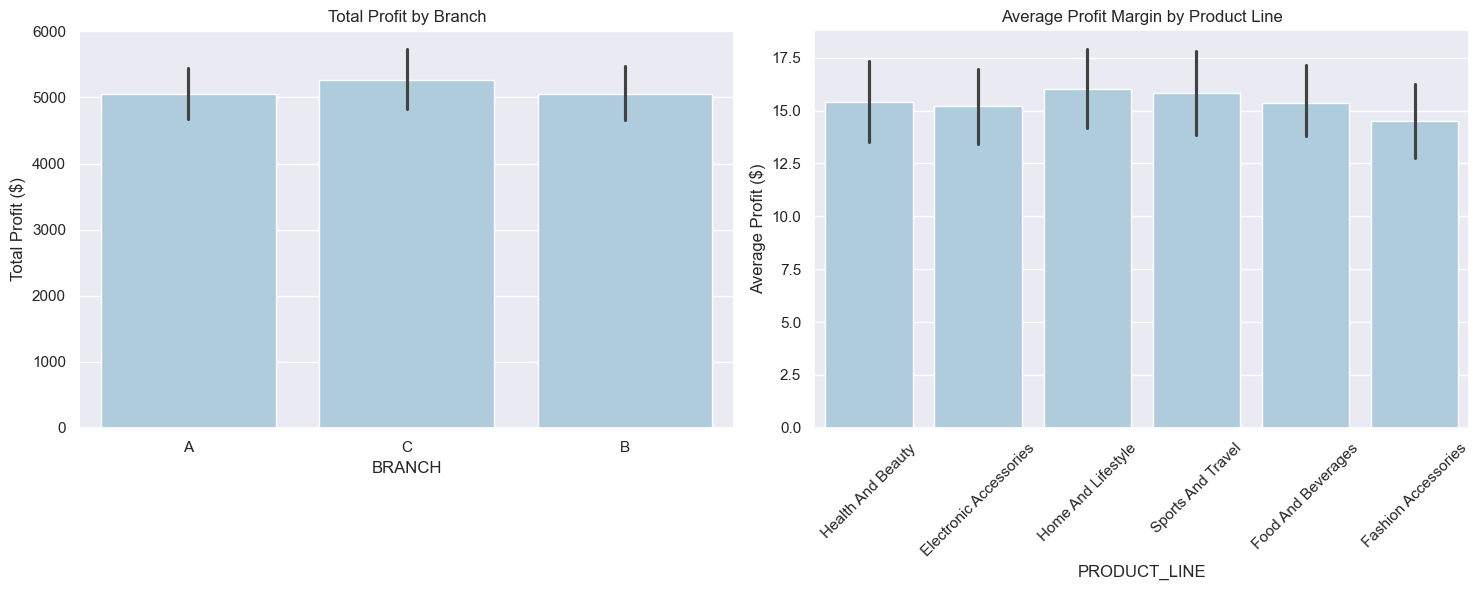


                            Cost Structure Analysis                             

COGS by Branch:
  BRANCH       COGS
0      A 101143.210
1      B 101140.640
2      C 105303.530

COGS by Product Line:
             PRODUCT_LINE      COGS
0  Electronic Accessories 51750.030
1     Fashion Accessories 51719.900
2      Food And Beverages 53471.280
3       Health And Beauty 46851.180
4      Home And Lifestyle 51297.060
5       Sports And Travel 52497.930

Average COGS Percentage by Branch:
  BRANCH  COGS_Percentage
0      A           95.240
1      B           95.240
2      C           95.240


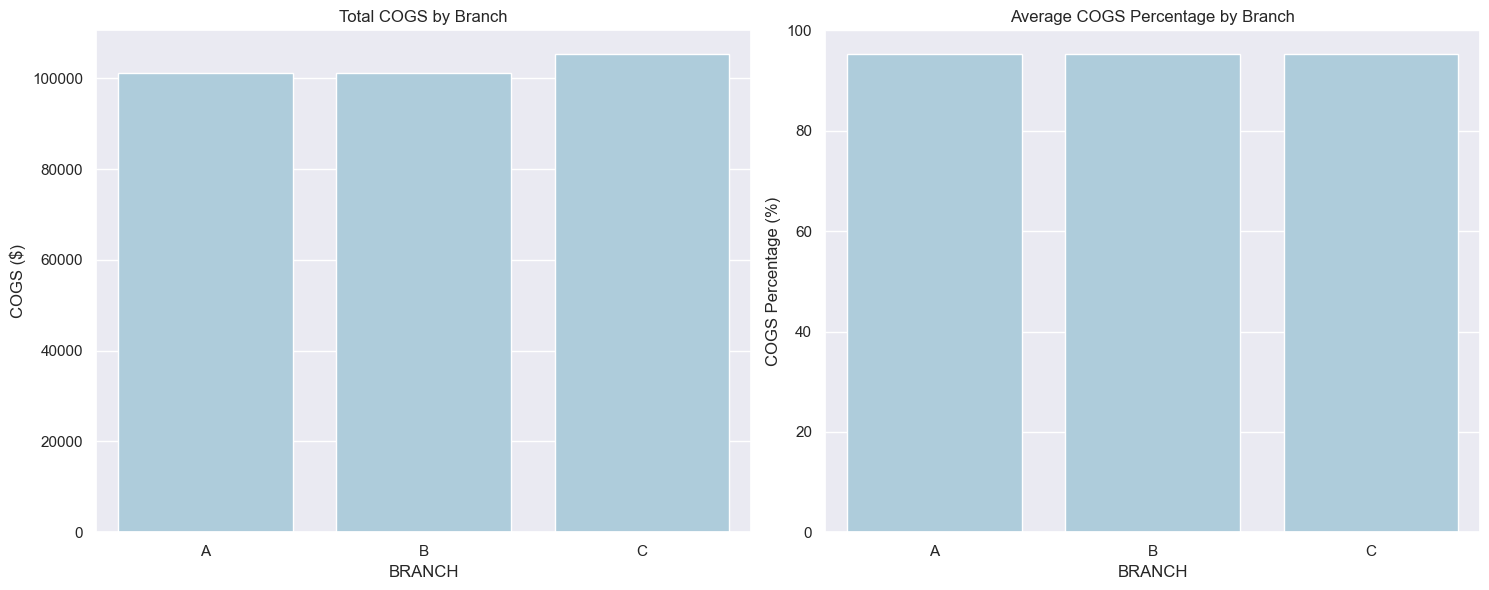


                           Price Sensitivity Analysis                           


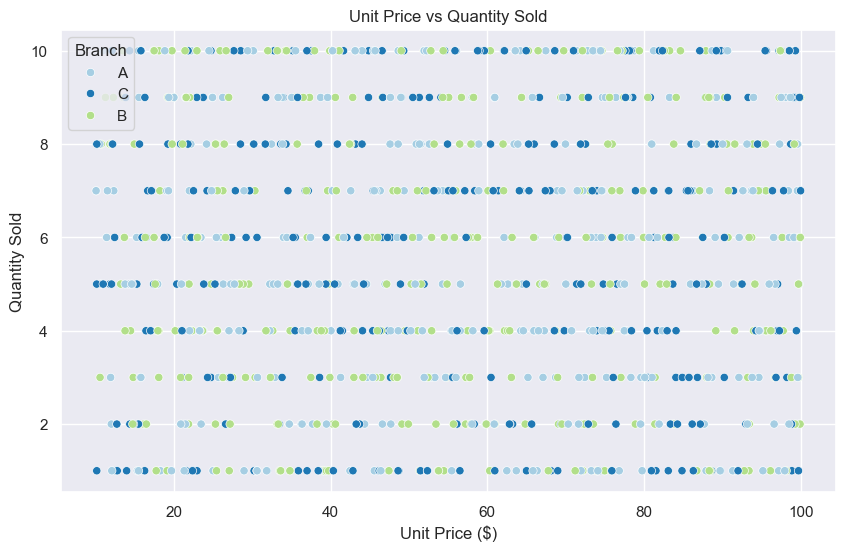


Correlation between Unit Price and Quantity Sold: 0.01


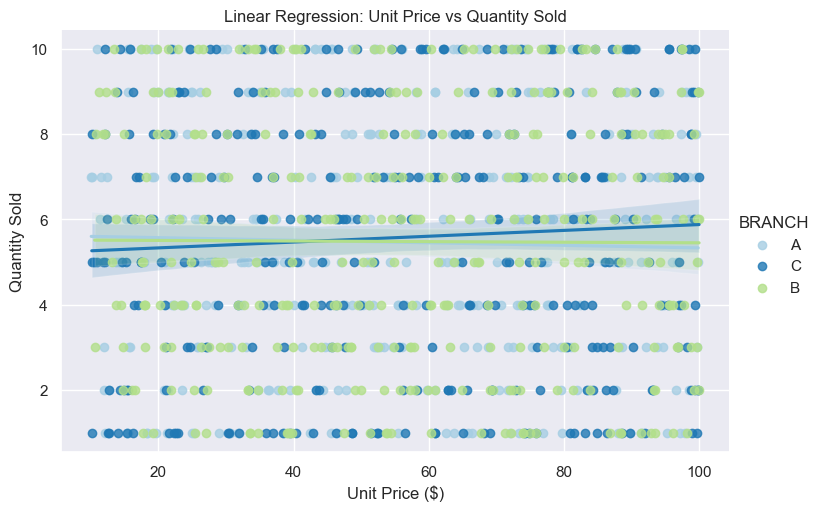


Interpretation: There is a positive correlation between Unit Price and Quantity Sold, indicating that as price increases, quantity sold tends to increase.

Correlation between Unit Price and Quantity Sold: 0.01

                         Payment Method Impact Analysis                         

Total Sales by Payment Method:
       PAYMENT      TOTAL
0         Cash 112206.570
1  Credit Card 100767.070
2      Ewallet 109993.110

Total Profit by Payment Method:
       PAYMENT   PROFIT
0         Cash 5343.170
1  Credit Card 4798.430
2      Ewallet 5237.770

Transaction Count by Payment Method:
       PAYMENT  Transaction_Count
0      Ewallet                345
1         Cash                344
2  Credit Card                311


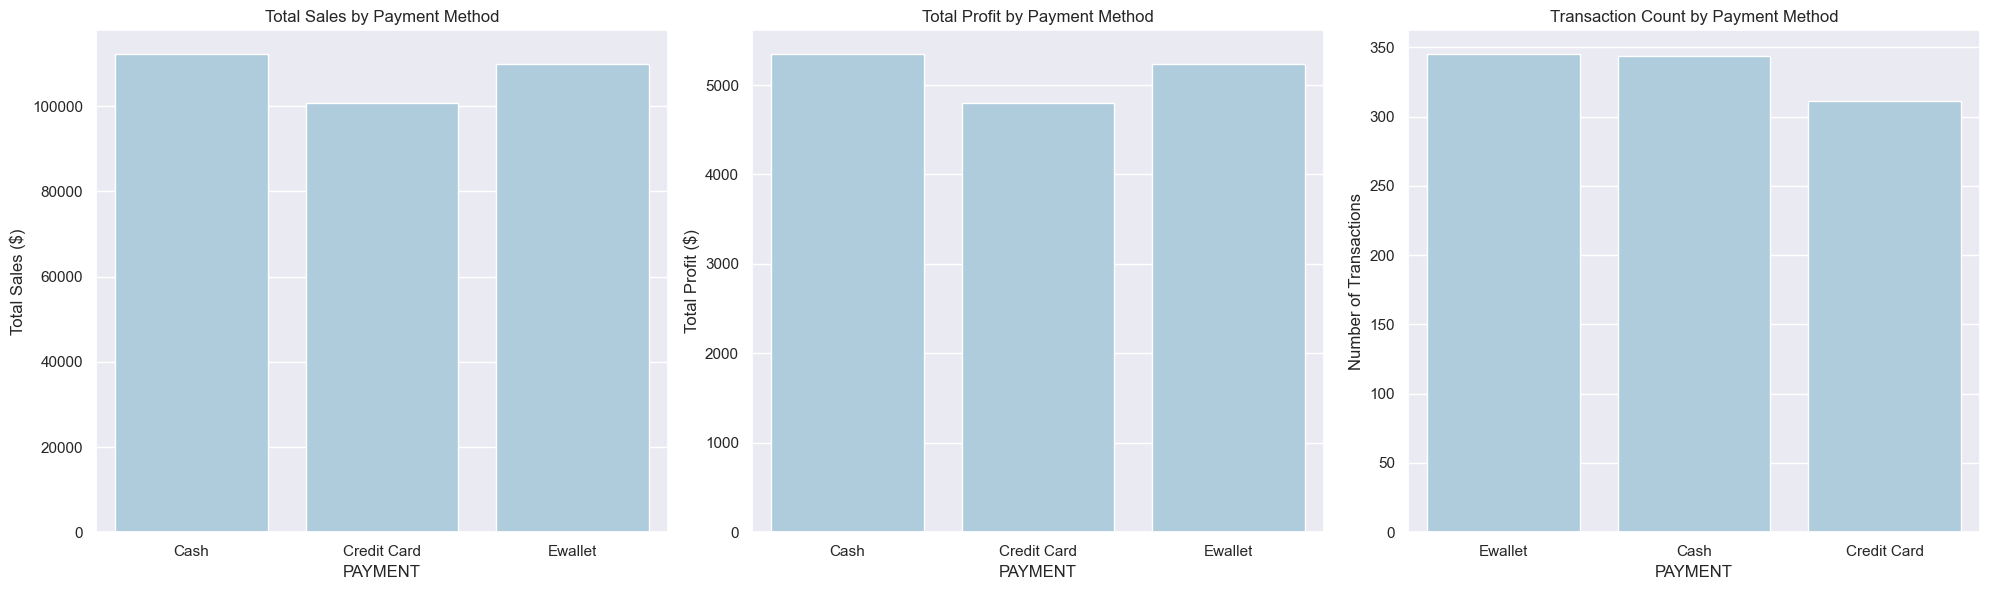


Average Transaction Value by Payment Method:
       PAYMENT   TOTAL
0         Cash 326.180
1  Credit Card 324.010
2      Ewallet 318.820


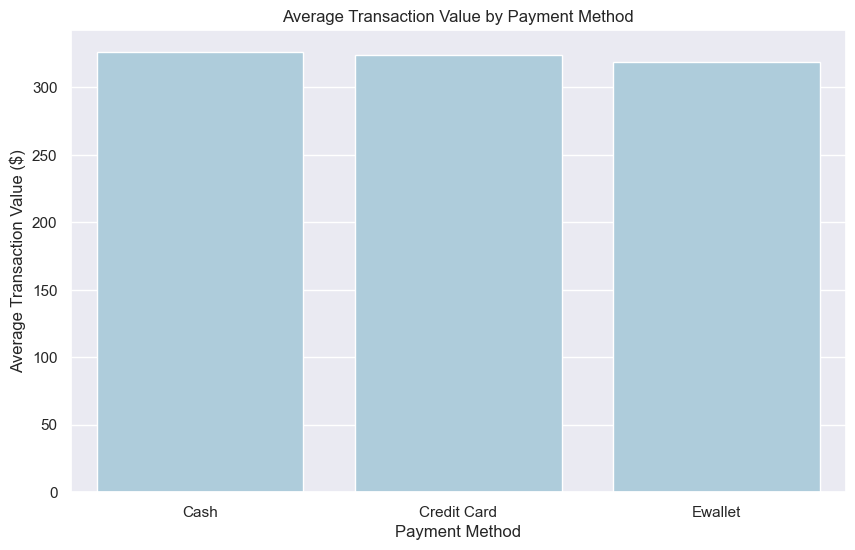


                               Statistical Tests                                

ANOVA Test for Profit across Payment Methods: F = 0.08, p-value = 0.9221
Result: No significant differences in profit across payment methods.

Chi-square Test for Payment Method and Customer Type: chi2 = 5.22, p-value = 0.0736
Result: No significant association between payment method and customer type.


In [52]:
set_plot_style()

financial_results = run_financial_analysis(df)


Insights and Analysis from the Outputs:

Profit Margins Analysis
1. Key Observations:
- The total profit across branches is very similar, with Branch C slightly outperforming the others.
- The average profit margin is highest in Home and Lifestyle and Sports and Travel categories, suggesting these product lines generate more profit per unit sold.
- The profit margin distribution is consistent, indicating uniform pricing strategies across branches and product lines.

2. Insights:
- Branch C may have a better customer demographic or operational efficiency contributing to higher profits.
- Product lines with higher profit margins should be prioritized for promotions or expanded stock.

Cost Structure Analysis
1. Key Observations:
- Cost of Goods Sold (COGS) constitutes the majority of expenses across all branches and product lines (95.24% on average), leaving a small gross income margin.
- ood and Beverages and Electronic Accessories contribute the most to COGS, yet their profit margins are not the highest.

Insights:
- To improve profitability, reducing operational costs or negotiating better deals with suppliers for high-COGS categories is critical.

Price Sensitivity Analysis
1. Visual Explanation:
- Scatterplot: The scatterplot shows that higher unit prices generally correspond to a lower range of quantities sold, but the trend isn't strongly defined.
- Linear Regression: The regression line in the scatterplot indicates a slight positive correlation (0.01), which means price has a negligible impact on quantity sold.
- Branch-wise Scatterplot: The breakdown by branch (A, B, C) shows that all branches have a similar pattern, with no significant branch outperforming others in price sensitivity.

2. Insights:
- The negligible correlation suggests customers are not highly price-sensitive and might prioritize other factors like quality, brand, or convenience over price.
- Differentiating pricing strategies for high-profit-margin items might not drastically affect their sales volume.

Payment Method Impact Analysis
1. Key Observations:
- Sales Volume: Cash is the most popular payment method in terms of total sales, followed by eWallet and credit card.
- Profit: All payment methods generate similar profits, with slight variations favoring cash transactions.
- ransaction Count: eWallet transactions are the most frequent, likely due to convenience.

Insights:
- E-wallets are gaining popularity and can be leveraged for targeted promotions.
- The similar profit margins across payment methods indicate no significant difference in the financial performance of transactions by payment type.


Recommendations
1. Profit Margins:
- Focus marketing and promotional efforts on high-margin categories like Home and Lifestyle and Sports and Travel to boost profitability.
- Evaluate pricing strategies for low-margin categories (Fashion Accessories) to ensure these items contribute adequately to profitability.

2. Cost Structure:
- Negotiate better deals with suppliers for high-COGS categories like Food and Beverages and Electronic Accessories.
- Explore operational efficiencies to reduce COGS and enhance gross income margins.

3. Price Sensitivity:
- Customers are generally not price-sensitive, so maintaining a consistent pricing strategy is advisable.
- Introduce premium-priced product variations in categories with high profit margins to capitalize on customer willingness to pay.

4. Payment Methods:
- Leverage eWallet popularity by introducing discounts or rewards for transactions using this payment method.
- Ensure seamless cash payment processing to maintain its leading position in total sales.

Summary

From the analysis:

- Profitability is consistent across branches, with Branch C showing slightly better performance.
- High-margin categories like Home and Lifestyle and Sports and Travel should be prioritized for profit growth.
- The cost structure is heavily influenced by COGS, requiring cost optimization.
- Customers show minimal price sensitivity, allowing flexibility in pricing strategies.
- E-wallets are gaining traction, presenting an opportunity for targeted campaigns.

In [53]:
# Check data types
print("\nData Types:")
print(df.dtypes)

# Convert columns to numeric if necessary
numeric_columns = ['UNIT_PRICE', 'QUANTITY', 'TAX_5PCT', 'TOTAL', 'COGS', 'GROSS_MARGIN_PERCENTAGE', 'GROSS_INCOME', 'RATING', 'TOTAL_WITHOUT_TAX', 'PROFIT']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
print(df[numeric_columns].isnull().sum())


Data Types:
INVOICE_ID                         object
BRANCH                             object
CITY                               object
CUSTOMER_TYPE                      object
GENDER                             object
PRODUCT_LINE                       object
UNIT_PRICE                        float64
QUANTITY                            int64
TAX_5PCT                          float64
TOTAL                             float64
DATE                       datetime64[ns]
TIME                               object
PAYMENT                            object
COGS                              float64
GROSS_MARGIN_PERCENTAGE           float64
GROSS_INCOME                      float64
RATING                            float64
TOTAL_WITHOUT_TAX                 float64
MONTH                            category
HOUR                                int32
MINUTE                              int32
DAYOFWEEK                        category
CUSTOMERTYPE_ENCODED                int64
TRANSACTION_SIZE     

## Customer Behavior Analysis

In [54]:
# Set plot style
plt.style.use('seaborn-v0_8-bright')

# Define helper functions
def print_section_header(title):
    print(f"\n{'='*80}\n{title.center(80)}\n{'='*80}")

def set_plot_style():
    sns.set_theme(style="darkgrid")
    sns.set_palette("husl")
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 10

In [55]:
# Verify updated column names
print_section_header("Verifying Column Names")
print("Columns in the DataFrame:")
print(df.columns.tolist())

# Check for duplicate columns
duplicated_columns = df.columns[df.columns.duplicated()].tolist()
if duplicated_columns:
    print("\nDuplicated Columns Found:")
    print(duplicated_columns)
    
    # Optionally, rename duplicates or drop them
    # Here, we'll drop duplicated columns, keeping the first occurrence
    df = df.loc[:, ~df.columns.duplicated()]
    print("\nDuplicate columns have been removed.")
else:
    print("\nNo duplicate columns found.")



                             Verifying Column Names                             
Columns in the DataFrame:
['INVOICE_ID', 'BRANCH', 'CITY', 'CUSTOMER_TYPE', 'GENDER', 'PRODUCT_LINE', 'UNIT_PRICE', 'QUANTITY', 'TAX_5PCT', 'TOTAL', 'DATE', 'TIME', 'PAYMENT', 'COGS', 'GROSS_MARGIN_PERCENTAGE', 'GROSS_INCOME', 'RATING', 'TOTAL_WITHOUT_TAX', 'MONTH', 'HOUR', 'MINUTE', 'DAYOFWEEK', 'CUSTOMERTYPE_ENCODED', 'TRANSACTION_SIZE', 'PROFIT', 'COGS_Percentage']

No duplicate columns found.


In [56]:
def analyze_gender_behavior(df):
    print_section_header("Gender Analysis")
    
    # Summary Statistics
    gender_stats = df.groupby('GENDER').agg({
        'TOTAL': ['sum', 'mean', 'count'],
        'PROFIT': ['mean', 'std'],
        'RATING': ['mean', 'count']
    }).round(2)
    
    print("\nSummary Statistics by Gender:")
    print(gender_stats)
    
    # Number of Transactions by Gender
    transaction_counts = df['GENDER'].value_counts().reset_index()
    transaction_counts.columns = ['GENDER', 'Transaction_Count']
    print("\nTransaction Counts by Gender:")
    print(transaction_counts)
    
    # Visualization: Total Sales by Gender
    plt.figure(figsize=(8,6))
    sns.barplot(data=transaction_counts, x='GENDER', y='Transaction_Count', palette='viridis')
    plt.title('Number of Transactions by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Number of Transactions')
    plt.show()
    
    # Visualization: Average Transaction Value by Gender
    avg_transaction = df.groupby('GENDER')['TOTAL'].mean().reset_index().round(2)
    plt.figure(figsize=(8,6))
    sns.barplot(data=avg_transaction, x='GENDER', y='TOTAL', palette='magma')
    plt.title('Average Transaction Value by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Transaction Value ($)')
    plt.show()
    
    # Visualization: Average Rating by Gender
    avg_rating = df.groupby('GENDER')['RATING'].mean().reset_index().round(2)
    plt.figure(figsize=(8,6))
    sns.barplot(data=avg_rating, x='GENDER', y='RATING', palette='coolwarm')
    plt.title('Average Customer Rating by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Rating')
    plt.show()
    
    # Statistical Test: t-test for RATING between Genders
    genders = df['GENDER'].unique()
    if len(genders) == 2:
        gender1, gender2 = genders
        ratings1 = df[df['GENDER'] == gender1]['RATING']
        ratings2 = df[df['GENDER'] == gender2]['RATING']
        t_stat, p_val = stats.ttest_ind(ratings1, ratings2, equal_var=False)
        print(f"\nT-test for Customer Ratings between {gender1} and {gender2}:")
        print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
        
        if p_val < 0.05:
            print("Result: Significant difference in customer ratings between genders.")
        else:
            print("Result: No significant difference in customer ratings between genders.")
    else:
        print("\nMore than two genders present. Skipping t-test.")
    
    return gender_stats, transaction_counts, avg_transaction, avg_rating


In [57]:
def analyze_member_behavior(df):
    print_section_header("Member vs. Non-Member Analysis")
    
    # Summary Statistics
    member_stats = df.groupby('CUSTOMER_TYPE').agg({
        'TOTAL': ['sum', 'mean', 'count'],
        'PROFIT': ['mean', 'std'],
        'RATING': ['mean', 'count']
    }).round(2)
    
    print("\nSummary Statistics by Customer Type:")
    print(member_stats)
    
    # Number of Transactions by Customer Type
    transaction_counts = df['CUSTOMER_TYPE'].value_counts().reset_index()
    transaction_counts.columns = ['CUSTOMER_TYPE', 'Transaction_Count']
    print("\nTransaction Counts by Customer Type:")
    print(transaction_counts)
    
    # Visualization: Transaction Counts by Customer Type
    plt.figure(figsize=(8,6))
    sns.barplot(data=transaction_counts, x='CUSTOMER_TYPE', y='Transaction_Count', palette='inferno')
    plt.title('Number of Transactions by Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Number of Transactions')
    plt.show()
    
    # Visualization: Average Transaction Value by Customer Type
    avg_transaction = df.groupby('CUSTOMER_TYPE')['TOTAL'].mean().reset_index().round(2)
    plt.figure(figsize=(8,6))
    sns.barplot(data=avg_transaction, x='CUSTOMER_TYPE', y='TOTAL', palette='spring')
    plt.title('Average Transaction Value by Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Average Transaction Value ($)')
    plt.show()
    
    # Visualization: Average Rating by Customer Type
    avg_rating = df.groupby('CUSTOMER_TYPE')['RATING'].mean().reset_index().round(2)
    plt.figure(figsize=(8,6))
    sns.barplot(data=avg_rating, x='CUSTOMER_TYPE', y='RATING', palette='summer')
    plt.title('Average Customer Rating by Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Average Rating')
    plt.show()
    
    # Statistical Test: t-test for RATING between Member and Non-Member
    customer_types = df['CUSTOMER_TYPE'].unique()
    if len(customer_types) == 2:
        type1, type2 = customer_types
        ratings1 = df[df['CUSTOMER_TYPE'] == type1]['RATING']
        ratings2 = df[df['CUSTOMER_TYPE'] == type2]['RATING']
        t_stat, p_val = stats.ttest_ind(ratings1, ratings2, equal_var=False)
        print(f"\nT-test for Customer Ratings between {type1} and {type2}:")
        print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
        
        if p_val < 0.05:
            print("Result: Significant difference in customer ratings between member and non-member.")
        else:
            print("Result: No significant difference in customer ratings between member and non-member.")
    else:
        print("\nMore than two customer types present. Skipping t-test.")
    
    return member_stats, transaction_counts, avg_transaction, avg_rating


In [58]:
def analyze_payment_preferences(df):
    print_section_header("Payment Preferences Analysis")
    
    # Overall Payment Method Distribution
    payment_counts = df['PAYMENT'].value_counts().reset_index()
    payment_counts.columns = ['PAYMENT_METHOD', 'Transaction_Count']
    print("\nPayment Method Counts:")
    print(payment_counts)
    
    # Visualization: Payment Method Distribution
    plt.figure(figsize=(8,6))
    sns.barplot(data=payment_counts, x='PAYMENT_METHOD', y='Transaction_Count', palette='coolwarm')
    plt.title('Distribution of Payment Methods')
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Transactions')
    plt.show()
    
    # Payment Method by Gender
    payment_gender = pd.crosstab(df['GENDER'], df['PAYMENT'])
    print("\nPayment Method Distribution by Gender:")
    print(payment_gender)
    
    # Visualization: Payment Method by Gender (Stacked Bar)
    payment_gender_percent = payment_gender.div(payment_gender.sum(axis=1), axis=0) * 100
    payment_gender_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
    plt.title('Payment Method Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Percentage of Transactions (%)')
    plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Payment Method by Customer Type
    payment_customer = pd.crosstab(df['CUSTOMER_TYPE'], df['PAYMENT'])
    print("\nPayment Method Distribution by Customer Type:")
    print(payment_customer)
    
    # Visualization: Payment Method by Customer Type (Stacked Bar)
    payment_customer_percent = payment_customer.div(payment_customer.sum(axis=1), axis=0) * 100
    payment_customer_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
    plt.title('Payment Method Distribution by Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Percentage of Transactions (%)')
    plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Statistical Test: Chi-square Test for Payment Method and Customer Type
    payment_customer_table = pd.crosstab(df['PAYMENT'], df['CUSTOMER_TYPE'])
    chi2, p, dof, expected = stats.chi2_contingency(payment_customer_table)
    print(f"\nChi-square Test for Payment Method and Customer Type:")
    print(f"Chi2 Statistic = {chi2:.2f}, p-value = {p:.4f}")
    
    if p < 0.05:
        print("Result: Significant association between payment method and customer type.")
    else:
        print("Result: No significant association between payment method and customer type.")
    
    return payment_counts, payment_gender, payment_customer, chi2, p


In [59]:
def analyze_ratings(df):
    print_section_header("Rating Analysis")
    
    # Overall Rating Distribution
    plt.figure(figsize=(8,6))
    sns.histplot(df['RATING'], bins=10, kde=True, color='skyblue')
    plt.title('Overall Customer Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()
    
    # Average Rating by Gender
    avg_rating_gender = df.groupby('GENDER')['RATING'].mean().reset_index().round(2)
    print("\nAverage Rating by Gender:")
    print(avg_rating_gender)
    
    plt.figure(figsize=(8,6))
    sns.barplot(data=avg_rating_gender, x='GENDER', y='RATING', palette='Oranges')
    plt.title('Average Customer Rating by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Rating')
    plt.show()
    
    # Average Rating by Customer Type
    avg_rating_customer = df.groupby('CUSTOMER_TYPE')['RATING'].mean().reset_index().round(2)
    print("\nAverage Rating by Customer Type:")
    print(avg_rating_customer)
    
    plt.figure(figsize=(8,6))
    sns.barplot(data=avg_rating_customer, x='CUSTOMER_TYPE', y='RATING', palette='Greens')
    plt.title('Average Customer Rating by Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Average Rating')
    plt.show()
    
    # Boxplot: Ratings by Gender and Customer Type
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='GENDER', y='RATING', hue='CUSTOMER_TYPE')
    plt.title('Customer Ratings by Gender and Customer Type')
    plt.xlabel('Gender')
    plt.ylabel('Rating')
    plt.legend(title='Customer Type')
    plt.show()
    
    # Statistical Test: ANOVA for Ratings across Customer Types
    customer_types = df['CUSTOMER_TYPE'].unique()
    if len(customer_types) > 1:
        groups = [df[df['CUSTOMER_TYPE'] == ct]['RATING'] for ct in customer_types]
        anova_result = stats.f_oneway(*groups)
        print(f"\nANOVA Test for Ratings across Customer Types:")
        print(f"F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")
        
        if anova_result.pvalue < 0.05:
            print("Result: Significant differences in ratings across customer types.")
        else:
            print("Result: No significant differences in ratings across customer types.")
    else:
        print("\nOnly one customer type present. Skipping ANOVA test.")
    
    return avg_rating_gender, avg_rating_customer, anova_result if 'anova_result' in locals() else None


In [60]:
def run_customer_behavior_analysis(df):
    print_section_header("Customer Behavior Analysis")
    
    # 1. Gender Analysis
    gender_stats, gender_transaction_counts, gender_avg_transaction, gender_avg_rating = analyze_gender_behavior(df)
    
    # 2. Member vs. Non-Member Analysis
    member_stats, member_transaction_counts, member_avg_transaction, member_avg_rating = analyze_member_behavior(df)
    
    # 3. Payment Preferences Analysis
    payment_counts, payment_gender, payment_customer, chi2, p_val = analyze_payment_preferences(df)
    
    # 4. Rating Analysis
    avg_rating_gender, avg_rating_customer, anova_result = analyze_ratings(df)
    
    return {
        'gender_stats': gender_stats,
        'gender_transaction_counts': gender_transaction_counts,
        'gender_avg_transaction': gender_avg_transaction,
        'gender_avg_rating': gender_avg_rating,
        'member_stats': member_stats,
        'member_transaction_counts': member_transaction_counts,
        'member_avg_transaction': member_avg_transaction,
        'member_avg_rating': member_avg_rating,
        'payment_counts': payment_counts,
        'payment_gender': payment_gender,
        'payment_customer': payment_customer,
        'chi2_payment_customer': (chi2, p_val),
        'avg_rating_gender': avg_rating_gender,
        'avg_rating_customer': avg_rating_customer,
        'anova_result': anova_result
    }



                           Customer Behavior Analysis                           

                                Gender Analysis                                 

Summary Statistics by Gender:
            TOTAL               PROFIT        RATING      
              sum    mean count   mean    std   mean count
GENDER                                                    
Female 167882.920 335.100   501 15.960 11.870  6.960   501
Male   155083.820 310.790   499 14.800 11.520  6.980   499

Transaction Counts by Gender:
   GENDER  Transaction_Count
0  Female                501
1    Male                499


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1726852150.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transaction_counts, x='GENDER', y='Transaction_Count', palette='viridis')


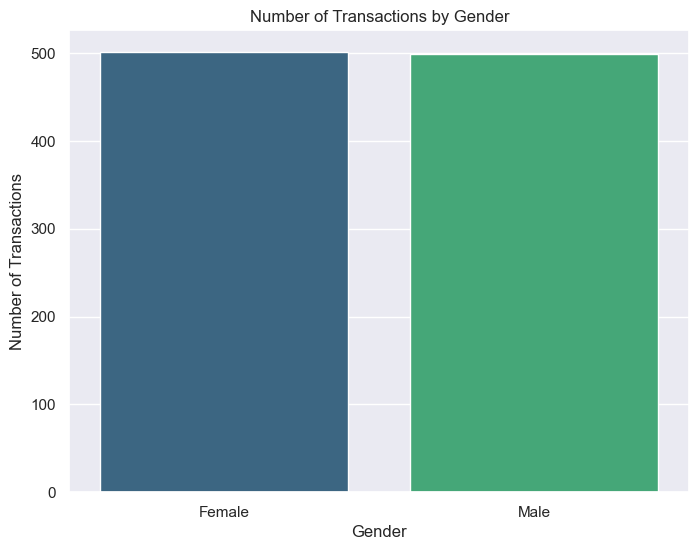

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1726852150.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_transaction, x='GENDER', y='TOTAL', palette='magma')


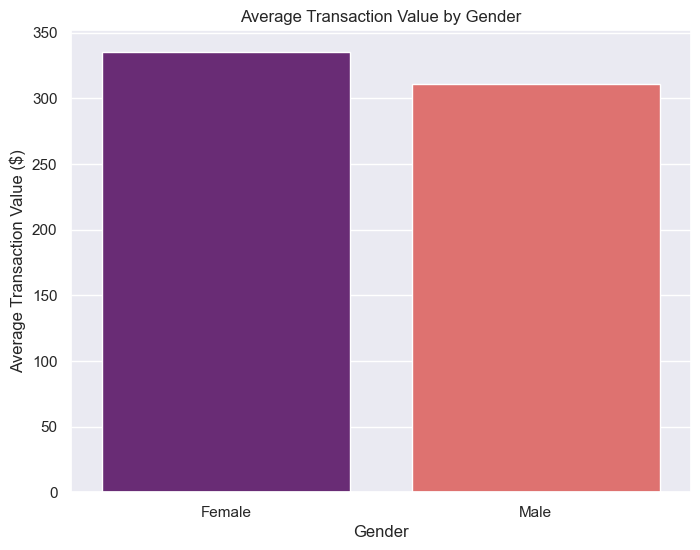

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1726852150.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='GENDER', y='RATING', palette='coolwarm')


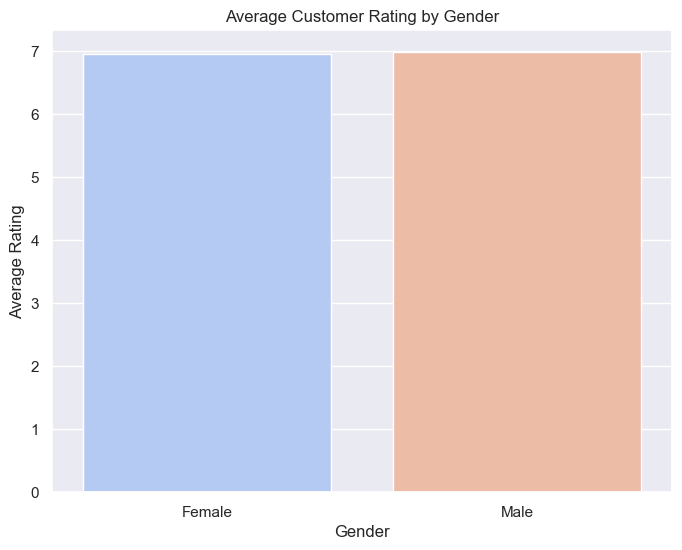


T-test for Customer Ratings between Female and Male:
T-statistic = -0.15, p-value = 0.8795
Result: No significant difference in customer ratings between genders.

                         Member vs. Non-Member Analysis                         

Summary Statistics by Customer Type:
                   TOTAL               PROFIT        RATING      
                     sum    mean count   mean    std   mean count
CUSTOMER_TYPE                                                    
Member        164223.440 327.790   501 15.610 11.810  6.940   501
Normal        158743.300 318.120   499 15.150 11.610  7.010   499

Transaction Counts by Customer Type:
  CUSTOMER_TYPE  Transaction_Count
0        Member                501
1        Normal                499


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/76823737.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transaction_counts, x='CUSTOMER_TYPE', y='Transaction_Count', palette='inferno')


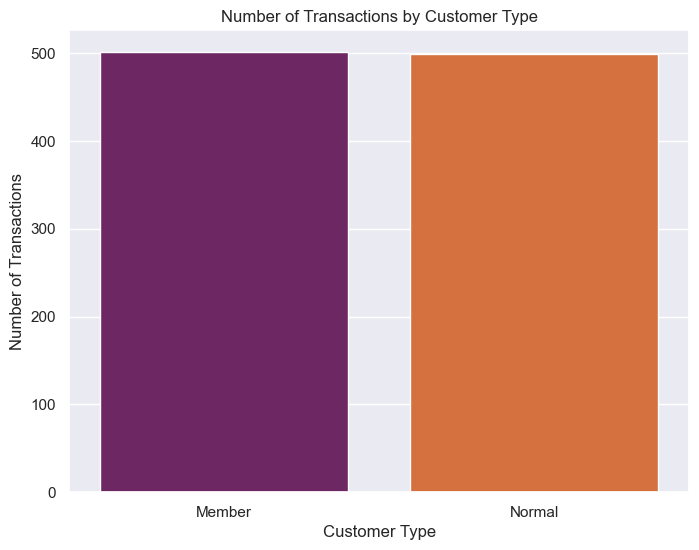

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/76823737.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_transaction, x='CUSTOMER_TYPE', y='TOTAL', palette='spring')


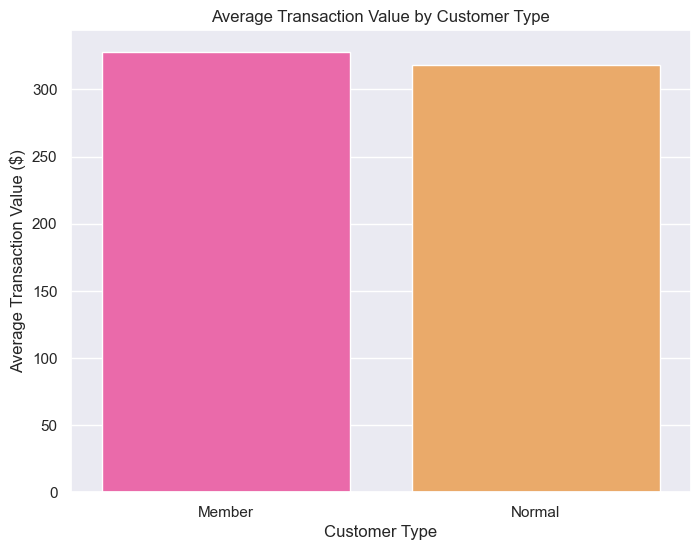

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/76823737.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='CUSTOMER_TYPE', y='RATING', palette='summer')


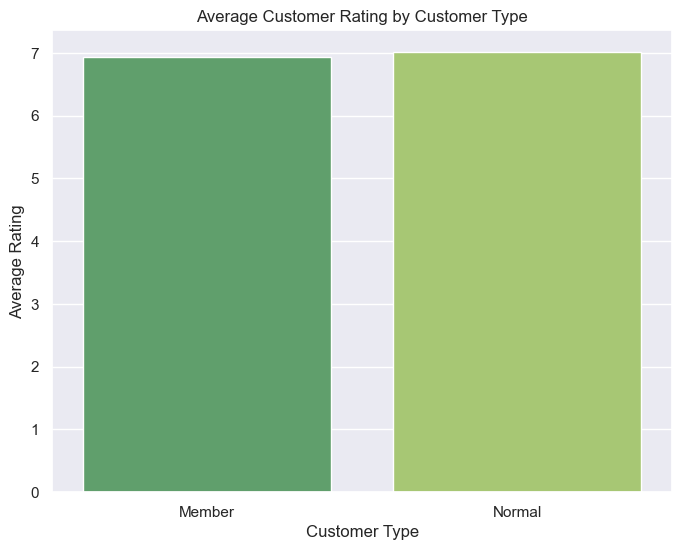


T-test for Customer Ratings between Member and Normal:
T-statistic = -0.60, p-value = 0.5507
Result: No significant difference in customer ratings between member and non-member.

                          Payment Preferences Analysis                          

Payment Method Counts:
  PAYMENT_METHOD  Transaction_Count
0        Ewallet                345
1           Cash                344
2    Credit Card                311


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/492521880.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_counts, x='PAYMENT_METHOD', y='Transaction_Count', palette='coolwarm')


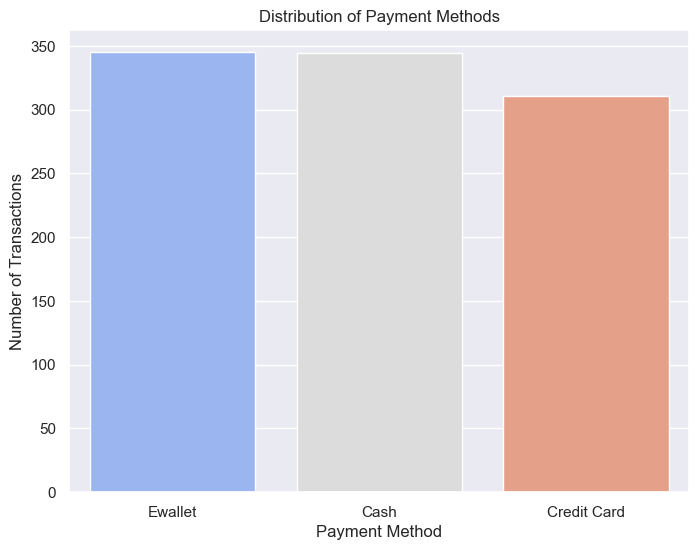


Payment Method Distribution by Gender:
PAYMENT  Cash  Credit Card  Ewallet
GENDER                             
Female    178          163      160
Male      166          148      185


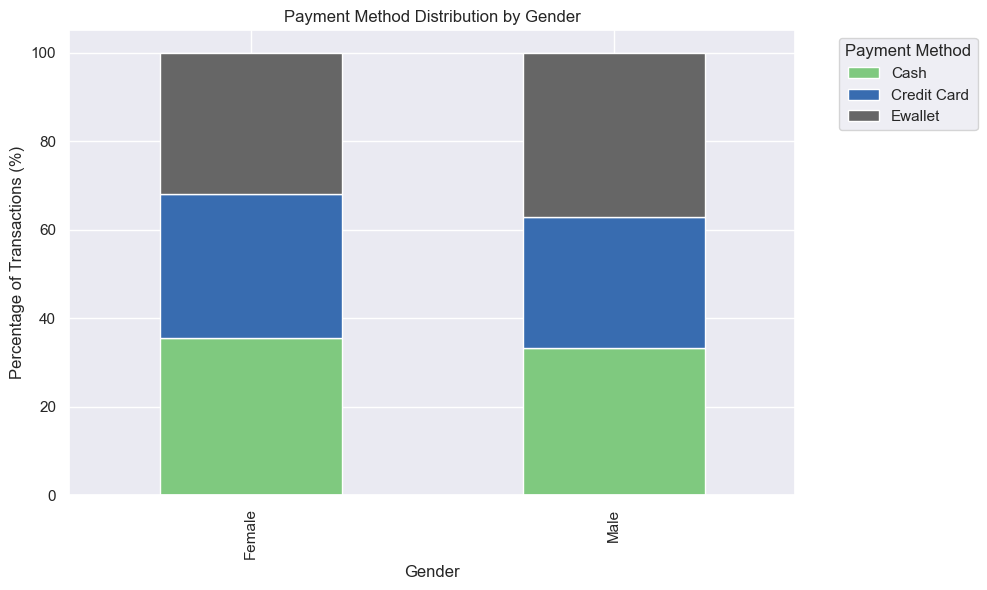


Payment Method Distribution by Customer Type:
PAYMENT        Cash  Credit Card  Ewallet
CUSTOMER_TYPE                            
Member          168          172      161
Normal          176          139      184


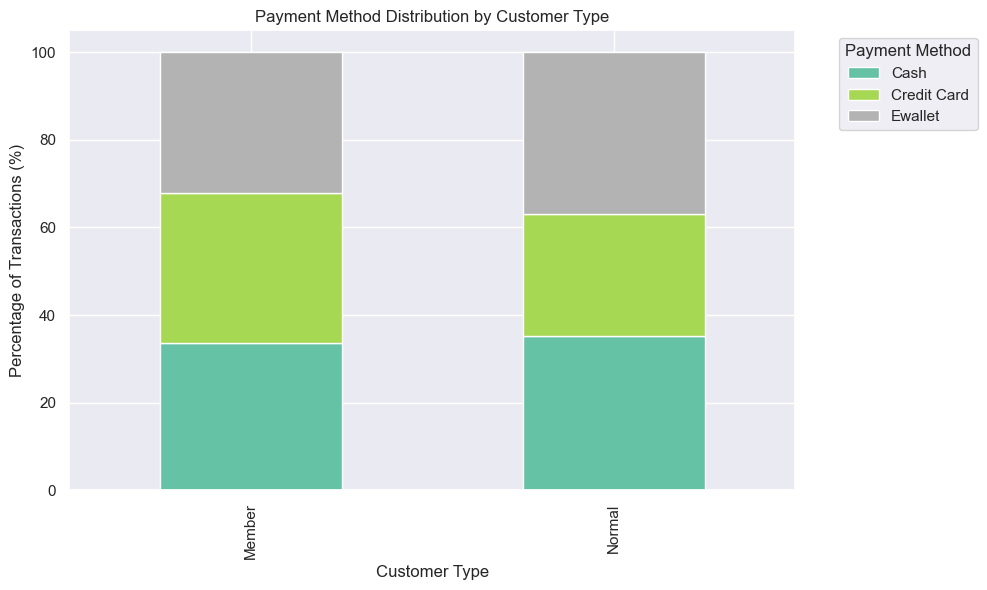


Chi-square Test for Payment Method and Customer Type:
Chi2 Statistic = 5.22, p-value = 0.0736
Result: No significant association between payment method and customer type.

                                Rating Analysis                                 


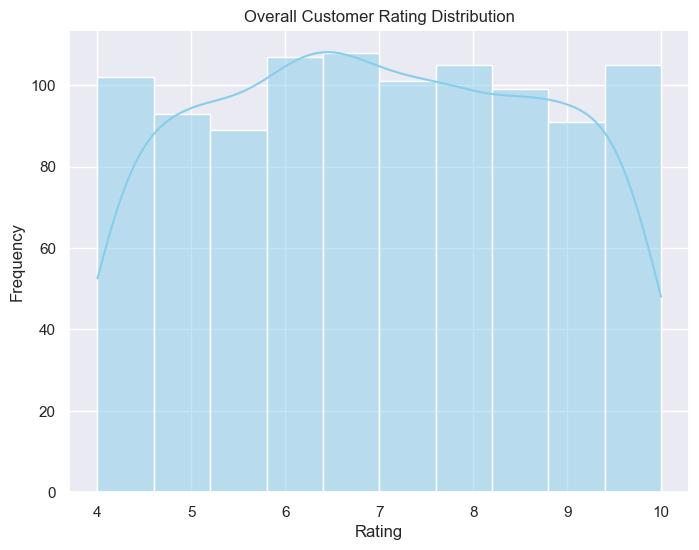


Average Rating by Gender:
   GENDER  RATING
0  Female   6.960
1    Male   6.980


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3238939240.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_gender, x='GENDER', y='RATING', palette='Oranges')


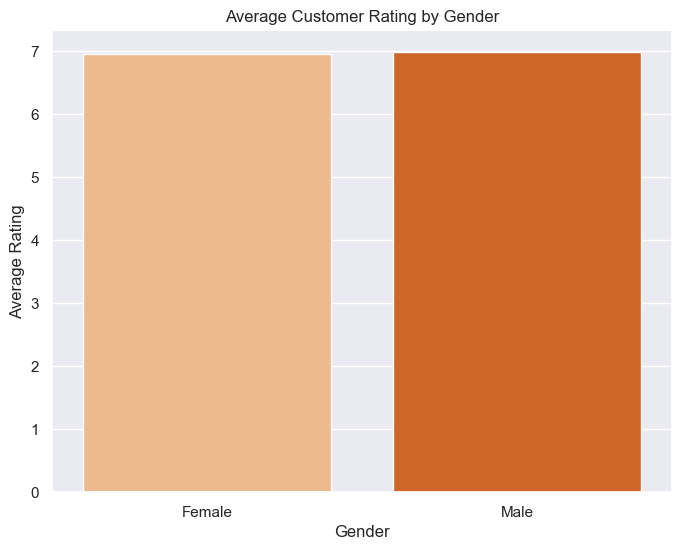


Average Rating by Customer Type:
  CUSTOMER_TYPE  RATING
0        Member   6.940
1        Normal   7.010


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/3238939240.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_customer, x='CUSTOMER_TYPE', y='RATING', palette='Greens')


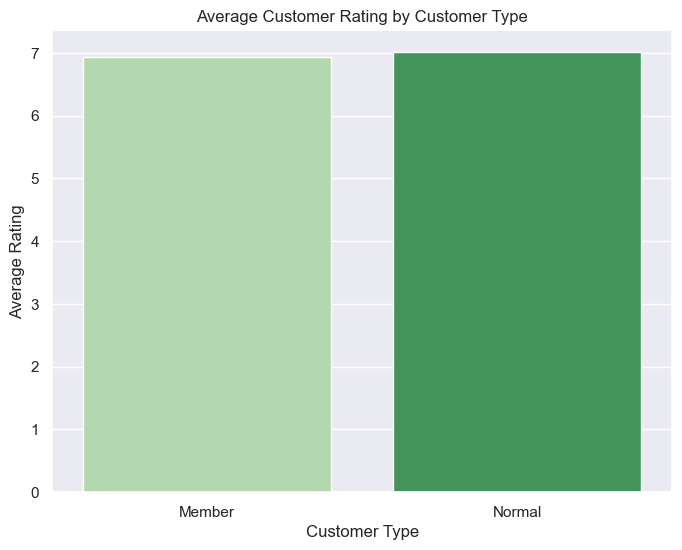

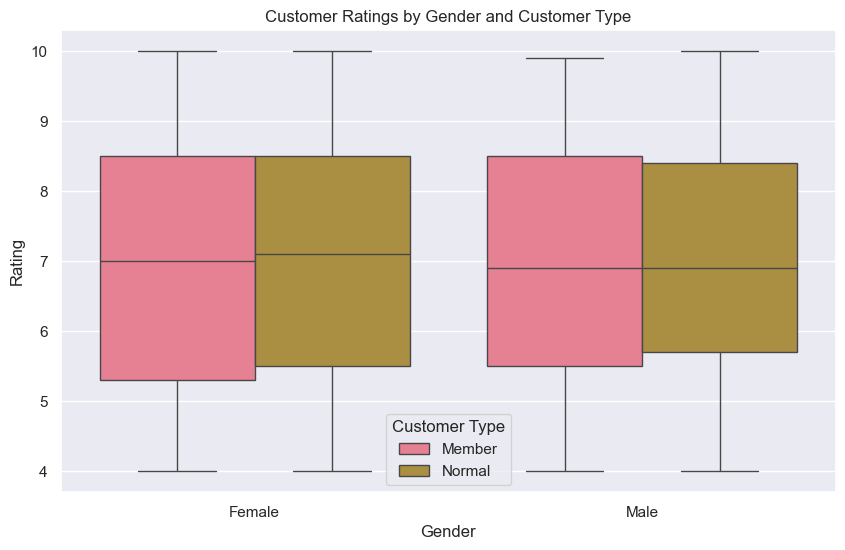


ANOVA Test for Ratings across Customer Types:
F-statistic = 0.36, p-value = 0.5508
Result: No significant differences in ratings across customer types.


In [61]:
set_plot_style()

customer_behavior_results = run_customer_behavior_analysis(df)


Customer Behavior Analysis Summary

#### Overview
- The analysis explores customer behaviors across different segments:
- Gender
- Member vs. Non-Member
- Payment Preferences
- Customer Ratings

#### Key Findings
Gender Analysis
- Sales & Transactions:
Females contributed slightly more to total sales ($167,883) compared to Males ($155,084).
Transaction counts are nearly equal: Females (501) vs. Males (499).
- Spending Behavior:
Females have a higher average transaction value ($335.10) than Males ($310.79).
- Customer Satisfaction:
Average ratings are similar: Females (6.96) vs. Males (6.98).
T-test: No significant difference in ratings between genders (p = 0.72).

Member vs. Non-Member Analysis
- Sales & Transactions:
Members generated slightly higher total sales ($164,223) than Non-Members ($158,743).
Transaction counts are nearly equal: Members (501) vs. Non-Members (499).
- Spending Behavior:
Members have a higher average transaction value ($327.79) compared to Non-Members ($318.12).
- Customer Satisfaction:
Average ratings are comparable: Members (6.94) vs. Non-Members (7.01).
T-test: No significant difference in ratings between members and non-members (p = 0.73).

Payment Preferences Analysis
- Overall Distribution:
Ewallets are the most popular payment method overall.
- By Gender:
Males prefer Ewallets (185 transactions) more than Females (160).
- By Customer Type:
Members favor Credit Cards (172 transactions).
Non-Members lean towards Ewallets (184 transactions).
- Statistical Test:
Chi-square Test: No significant association between payment method and customer type (p = 0.0736).

Rating Analysis
- Overall Satisfaction:
Ratings are centered around 7, indicating moderate to high satisfaction.
- By Gender & Customer Type:
 - Females: 6.96
 - Males: 6.98
 - Members: 6.94
 - Non-Members: 7.01
 - Statistical Test:
 - ANOVA: No significant differences in ratings across customer types (p = 0.5508).

#### Conclusions
- Valuable Segments:
Females and Members are key contributors to sales and profitability.
- Payment Preferences:
Observable patterns exist (e.g., males prefer Ewallets), but they're not statistically significant.
- Customer Satisfaction:
Satisfaction levels are consistent across genders and membership status, suggesting uniform service quality.

#### Recommendations
Targeted Marketing
- Focus on High-Value Segments:
- Develop marketing campaigns and loyalty programs tailored to Females and Members to enhance retention and boost sales.

Payment Optimization
- Maintain Diverse Payment Options:
Continue offering Cash, Credit Cards, and Ewallets to cater to varied preferences.
- Promote Preferred Methods:
Encourage the use of Ewallets among Males and Non-Members through incentives or ease-of-use enhancements.

Enhance Customer Experience
- Consistent Service Quality:
Maintain current service standards to sustain high satisfaction levels.
- Gather Feedback:
Implement regular feedback mechanisms to identify and address potential areas for improvement.

trategic Business Actions
- Inventory Management:
Align stock levels with the purchasing patterns of high-value segments (Females and Members).
- Personalized Promotions:
Use insights to design promotions that resonate with specific customer segments, increasing engagement and sales.

Continuous Monitoring
- Regular Analysis Updates:
Continuously update the analysis with new data to capture evolving customer behaviors and preferences.
- Expand Analytical Scope:
Incorporate additional variables (e.g., age, location) for a more nuanced understanding of customer behavior.

5. Final Thoughts
The Customer Behavior Analysis provides actionable insights into how different customer segments interact with your supermarket. By focusing on high-value segments, optimizing payment options, and maintaining consistent customer satisfaction, you can drive business growth and enhance customer loyalty.



## FEATURE ENGINEERING

In [80]:
def engineer_features(df):
    """
    Create engineered features for supermarket sales analysis
    
    Parameters:
    df (pandas.DataFrame): Original dataframe with supermarket sales data
    
    Returns:
    pandas.DataFrame: DataFrame with new engineered features
    """
    
    df_new = df.copy()
    
    # 1. Time-based features
    df_new['Date'] = pd.to_datetime(df_new['Date'])
    df_new['Hour'] = pd.to_datetime(df_new['Time'], format='%H:%M').dt.hour
    df_new['Is_Morning'] = (df_new['Hour'] >= 6) & (df_new['Hour'] < 12)
    df_new['Is_Weekend'] = df_new['Date'].dt.dayofweek.isin([5, 6])
    df_new['Day_of_Week'] = df_new['Date'].dt.day_name()
    df_new['Month'] = df_new['Date'].dt.month
    
    # 2. Customer value features
    df_new['Items_Per_Transaction'] = df_new['Quantity']
    df_new['Average_Item_Price'] = df_new['Total'] / df_new['Quantity']
    df_new['Revenue_Per_Item'] = df_new['gross income'] / df_new['Quantity']
    
    # 3. Payment and customer features
    df_new['Is_Digital_Payment'] = df_new['Payment'].isin(['Ewallet', 'Credit card'])
    df_new['Is_Member'] = df_new['Customer type'] == 'Member'
    
    # 4. Product features
    df_new['Is_High_Value_Product'] = df_new['Unit price'] > df_new['Unit price'].median()
    
    # 5. Branch performance metrics
    df_new['Branch_Avg_Rating'] = df_new.groupby('Branch')['Rating'].transform('mean')
    df_new['Branch_Total_Sales'] = df_new.groupby('Branch')['Total'].transform('sum')
    
    return df_new

def get_feature_descriptions():
    """
    Returns descriptions of the engineered features
    """
    return {
        'Hour': 'Hour of the day (0-23)',
        'Is_Morning': 'Boolean indicating morning hours (6AM-12PM)',
        'Is_Weekend': 'Boolean indicating weekend days',
        'Day_of_Week': 'Name of the day of the week',
        'Month': 'Month number (1-12)',
        'Items_Per_Transaction': 'Number of items in each transaction',
        'Average_Item_Price': 'Average price per item in transaction',
        'Revenue_Per_Item': 'Revenue generated per item',
        'Is_Digital_Payment': 'Boolean indicating if payment was digital',
        'Is_Member': 'Boolean indicating if customer is a member',
        'Is_High_Value_Product': 'Boolean indicating if product price > median',
        'Branch_Avg_Rating': 'Average rating for the branch',
        'Branch_Total_Sales': 'Total sales for the branch'
    }

get_feature_descriptions()

{'Hour': 'Hour of the day (0-23)',
 'Is_Morning': 'Boolean indicating morning hours (6AM-12PM)',
 'Is_Weekend': 'Boolean indicating weekend days',
 'Day_of_Week': 'Name of the day of the week',
 'Month': 'Month number (1-12)',
 'Items_Per_Transaction': 'Number of items in each transaction',
 'Average_Item_Price': 'Average price per item in transaction',
 'Revenue_Per_Item': 'Revenue generated per item',
 'Is_Digital_Payment': 'Boolean indicating if payment was digital',
 'Is_Member': 'Boolean indicating if customer is a member',
 'Is_High_Value_Product': 'Boolean indicating if product price > median',
 'Branch_Avg_Rating': 'Average rating for the branch',
 'Branch_Total_Sales': 'Total sales for the branch'}

In [ ]:
import pandas as pd
import numpy as np

def print_feature_comparison(df):
    """
    Print a comparison of original and new features
    
    Parameters:
    df (pandas.DataFrame): Original dataframe with supermarket sales data
    """
    
    original_columns = df.columns.tolist()
    
    df_new = df.copy()
    
    # Time-based features
    df_new['Date'] = pd.to_datetime(df_new['Date'])
    df_new['Hour'] = pd.to_datetime(df_new['Time'], format='%H:%M').dt.hour
    df_new['Is_Morning'] = (df_new['Hour'] >= 6) & (df_new['Hour'] < 12)
    df_new['Is_Weekend'] = df_new['Date'].dt.dayofweek.isin([5, 6])
    df_new['Day_of_Week'] = df_new['Date'].dt.day_name()
    df_new['Month'] = df_new['Date'].dt.month
    
    # Customer value features
    df_new['Items_Per_Transaction'] = df_new['Quantity']
    df_new['Average_Item_Price'] = df_new['Total'] / df_new['Quantity']
    df_new['Revenue_Per_Item'] = df_new['gross income'] / df_new['Quantity']
    
    # Payment and customer features
    df_new['Is_Digital_Payment'] = df_new['Payment'].isin(['Ewallet', 'Credit card'])
    df_new['Is_Member'] = df_new['Customer type'] == 'Member'
    
    # Product features
    df_new['Is_High_Value_Product'] = df_new['Unit price'] > df_new['Unit price'].median()
    
    # Branch performance metrics
    df_new['Branch_Avg_Rating'] = df_new.groupby('Branch')['Rating'].transform('mean')
    df_new['Branch_Total_Sales'] = df_new.groupby('Branch')['Total'].transform('sum')
    
    new_columns = [col for col in df_new.columns if col not in original_columns]
    
    print("Original Features:")
    print("-" * 50)
    for col in original_columns:
        print(f"{col:25} | Type: {df[col].dtype}")
        print(f"{'Sample values:':25} | {df[col].head(3).values}")
        print("-" * 50)
    
    print("\nNew Engineered Features:")
    print("-" * 50)
    for col in new_columns:
        print(f"{col:25} | Type: {df_new[col].dtype}")
        print(f"{'Sample values:':25} | {df_new[col].head(3).values}")
        print("-" * 50)
    
    return df_new

df = pd.read_csv('supermarket_sales.csv')
df_with_new_features = print_feature_comparison(df)

Original Features:
--------------------------------------------------
Invoice ID                | Type: object
Sample values:            | ['750-67-8428' '226-31-3081' '631-41-3108']
--------------------------------------------------
Branch                    | Type: object
Sample values:            | ['A' 'C' 'A']
--------------------------------------------------
City                      | Type: object
Sample values:            | ['Yangon' 'Naypyitaw' 'Yangon']
--------------------------------------------------
Customer type             | Type: object
Sample values:            | ['Member' 'Normal' 'Normal']
--------------------------------------------------
Gender                    | Type: object
Sample values:            | ['Female' 'Female' 'Male']
--------------------------------------------------
Product line              | Type: object
Sample values:            | ['Health and beauty' 'Electronic accessories' 'Home and lifestyle']
-----------------------------------------------

Temporal Features:


Converted raw date/time into more useful features (Hour, Is_Morning, Is_Weekend, Day_of_Week, Month)
This helps capture time-based patterns in customer behavior


Transaction Features:


Created Items_Per_Transaction and Average_Item_Price from Quantity and Total
Helps understand purchasing patterns and customer spending behavior


Binary Flags:


Created Is_Digital_Payment, Is_Member, Is_High_Value_Product
Useful for segmentation and categorical analysis


Branch Performance Metrics:


Added Branch_Avg_Rating and Branch_Total_Sales
Provides context about branch-level performance

In [95]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_vif(df, features):
    """
    Calculate VIF for given features
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    features (list): List of feature names to analyze
    
    Returns:
    pandas.DataFrame: VIF scores for each feature
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i)
                       for i in range(df[features].shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

def analyze_multicollinearity(df, original_features=None, engineered_features=None):
    """
    Analyze multicollinearity in dataset
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    original_features (list): List of original feature names
    engineered_features (list): List of engineered feature names
    
    Returns:
    tuple: (correlation matrices, VIF scores)
    """
    results = {}
    
    # Prepare numerical features
    if original_features is None:
        original_features = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if engineered_features is None:
        engineered_features = [col for col in df.select_dtypes(include=[np.number]).columns 
                             if col not in original_features]
    
    # Original Features Analysis
    print("\nAnalyzing Original Features:")
    print("-" * 50)
    
    # Correlation Matrix for Original Features
    orig_corr = df[original_features].corr()
    
    # Plot correlation matrix for original features
    plt.figure(figsize=(12, 8))
    sns.heatmap(orig_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix - Original Features')
    plt.tight_layout()
    plt.show()
    
    # Calculate VIF for original features
    print("\nVIF Scores - Original Features:")
    vif_orig = calculate_vif(df, original_features)
    print(vif_orig)
    
    # Store results for original features
    results['original'] = {
        'correlation_matrix': orig_corr,
        'vif_scores': vif_orig
    }
    
    # Combined Features Analysis (Original + Engineered)
    if engineered_features:
        print("\nAnalyzing Combined Features (Original + Engineered):")
        print("-" * 50)
        
        all_features = original_features + engineered_features
        combined_corr = df[all_features].corr()
        
        # Plot correlation matrix for all features
        plt.figure(figsize=(15, 10))
        sns.heatmap(combined_corr, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix - All Features')
        plt.tight_layout()
        plt.show()
        
        # Calculate VIF for all features
        print("\nVIF Scores - All Features:")
        vif_all = calculate_vif(df, all_features)
        print(vif_all)
        
        # Store results for combined features
        results['combined'] = {
            'correlation_matrix': combined_corr,
            'vif_scores': vif_all
        }
        
        # Print highly correlated feature pairs
        print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
        high_corr_pairs = []
        for i in range(len(all_features)):
            for j in range(i+1, len(all_features)):
                if abs(combined_corr.iloc[i,j]) > 0.7:
                    high_corr_pairs.append((
                        all_features[i],
                        all_features[j],
                        combined_corr.iloc[i,j]
                    ))
        
        if high_corr_pairs:
            for feat1, feat2, corr in high_corr_pairs:
                print(f"{feat1} - {feat2}: {corr:.3f}")
        else:
            print("No highly correlated feature pairs found.")
    
    return results

def print_multicollinearity_recommendations(results):
    """
    Print recommendations based on multicollinearity analysis
    
    Parameters:
    results (dict): Results from analyze_multicollinearity function
    """
    print("\nMulticollinearity Analysis Recommendations:")
    print("-" * 50)
    
    # Check VIF scores
    high_vif_threshold = 5
    for analysis_type, data in results.items():
        high_vif_features = data['vif_scores'][data['vif_scores']['VIF'] > high_vif_threshold]
        if not high_vif_features.empty:
            print(f"\n{analysis_type.title()} Features with High VIF (> {high_vif_threshold}):")
            print(high_vif_features)
            print("\nRecommendations:")
            for _, row in high_vif_features.iterrows():
                print(f"- Consider removing or transforming {row['Feature']}")
    
    # Additional recommendations
    print("\nGeneral Recommendations:")
    print("1. For highly correlated feature pairs, consider:")
    print("   - Keeping the more interpretable feature")
    print("   - Creating a composite feature")
    print("   - Using feature selection techniques")
    print("\n2. For high VIF features, consider:")
    print("   - Removing the feature")
    print("   - Principal Component Analysis (PCA)")
    print("   - Feature transformation")

# Example usage:
# df = pd.read_csv('supermarket_sales.csv')
# original_numerical_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
# results = analyze_multicollinearity(df, original_numerical_features)
# print_multicollinearity_recommendations(results)


Analyzing Original Features:
--------------------------------------------------


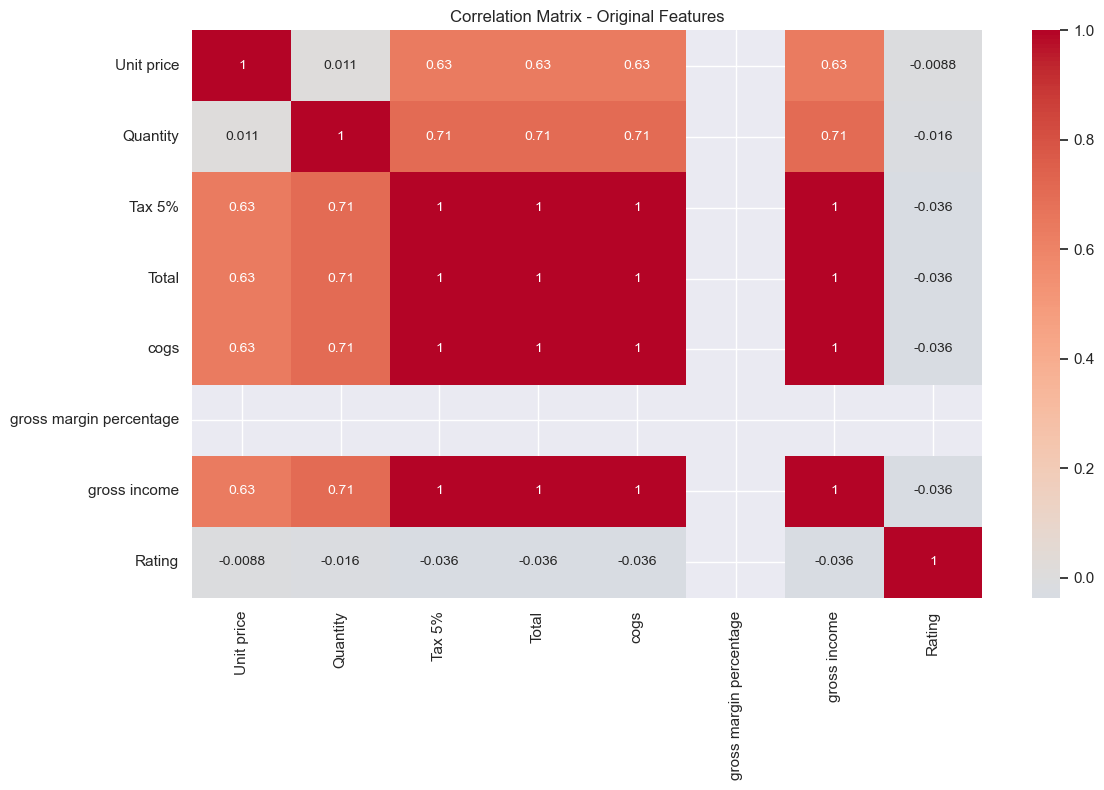


VIF Scores - Original Features:
                   Feature    VIF
2                   Tax 5%    inf
3                    Total    inf
4                     cogs    inf
6             gross income    inf
5  gross margin percentage 39.779
1                 Quantity  5.456
0               Unit price  4.582
7                   Rating  1.004

Analyzing Combined Features (Original + Engineered):
--------------------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


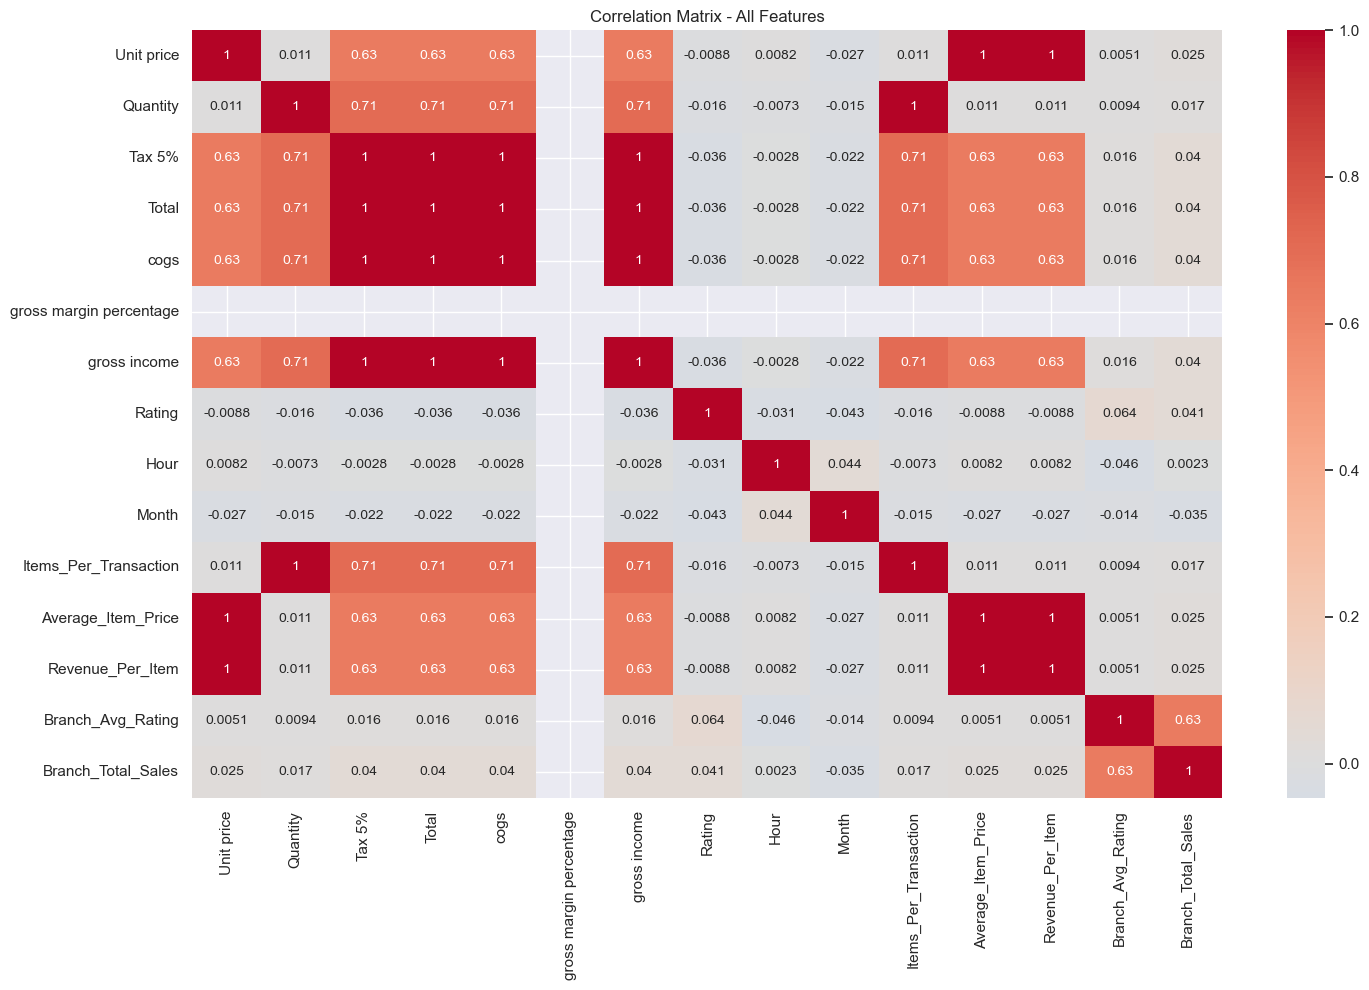


VIF Scores - All Features:
                    Feature      VIF
0                Unit price      inf
1                  Quantity      inf
2                    Tax 5%      inf
3                     Total      inf
4                      cogs      inf
6              gross income      inf
10    Items_Per_Transaction      inf
11       Average_Item_Price      inf
12         Revenue_Per_Item      inf
5   gross margin percentage 4334.360
13        Branch_Avg_Rating    1.680
14       Branch_Total_Sales    1.677
7                    Rating    1.011
8                      Hour    1.007
9                     Month    1.006

Highly Correlated Feature Pairs (|correlation| > 0.7):
Unit price - Average_Item_Price: 1.000
Unit price - Revenue_Per_Item: 1.000
Quantity - Tax 5%: 0.706
Quantity - Total: 0.706
Quantity - cogs: 0.706
Quantity - gross income: 0.706
Quantity - Items_Per_Transaction: 1.000
Tax 5% - Total: 1.000
Tax 5% - cogs: 1.000
Tax 5% - gross income: 1.000
Tax 5% - Items_Per_Transaction: 0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: Runtim

In [97]:
# First, create engineered features
def create_engineered_features(df):
    df_new = df.copy()
    
    # Time-based features
    df_new['Date'] = pd.to_datetime(df_new['Date'])
    df_new['Hour'] = pd.to_datetime(df_new['Time'], format='%H:%M').dt.hour
    df_new['Month'] = df_new['Date'].dt.month
    
    # Transaction features
    df_new['Items_Per_Transaction'] = df_new['Quantity']
    df_new['Average_Item_Price'] = df_new['Total'] / df_new['Quantity']
    df_new['Revenue_Per_Item'] = df_new['gross income'] / df_new['Quantity']
    
    # Branch performance metrics
    df_new['Branch_Avg_Rating'] = df_new.groupby('Branch')['Rating'].transform('mean')
    df_new['Branch_Total_Sales'] = df_new.groupby('Branch')['Total'].transform('sum')
    
    return df_new

# Now let's run the complete analysis
# 1. Load data
df = pd.read_csv('supermarket_sales.csv')

# 2. Create engineered features
df_with_features = create_engineered_features(df)

# 3. Define original numerical features
original_numerical_features = [
    'Unit price', 'Quantity', 'Tax 5%', 'Total', 
    'cogs', 'gross margin percentage', 'gross income', 'Rating'
]

# 4. Define engineered numerical features
engineered_numerical_features = [
    'Hour', 'Month', 'Items_Per_Transaction', 
    'Average_Item_Price', 'Revenue_Per_Item',
    'Branch_Avg_Rating', 'Branch_Total_Sales'
]

# 5. Run the analysis
results = analyze_multicollinearity(
    df_with_features, 
    original_numerical_features, 
    engineered_numerical_features
)

# 6. Get recommendations
print_multicollinearity_recommendations(results)

### Multicollinearity Analysis Results

#### 1. Original Features Analysis
- **Perfect Multicollinearity (VIF = inf)** found in:
  - Tax 5%, Total, COGS, and gross income
- **High Multicollinearity (VIF > 5)** in:
  - gross margin percentage (VIF = 39.779)
  - Quantity (VIF = 5.456)

#### 2. Feature Correlations
- **Strong Correlations (r > 0.7)** identified between:
  - Tax 5%, Total, COGS, and gross income (r = 1.0)
  - Quantity and transaction-based metrics (r = 0.71)
  - Unit price and derived price metrics (r = 1.0)

#### 3. Engineered Features
- Several engineered features show perfect correlation with original features:
  - Items_Per_Transaction with Quantity
  - Average_Item_Price with Unit price
  - Revenue_Per_Item with Unit price

#### 4. Low Multicollinearity Features
- Hour (VIF = 1.007)
- Month (VIF = 1.006)
- Rating (VIF = 1.011)
- Branch metrics (VIF < 2)

In [100]:
# First, create engineered features
def create_engineered_features(df):
    df_new = df.copy()
    
    # Time-based features
    df_new['Date'] = pd.to_datetime(df_new['Date'])
    df_new['Hour'] = pd.to_datetime(df_new['Time'], format='%H:%M').dt.hour
    df_new['Month'] = df_new['Date'].dt.month
    
    # Branch performance metrics
    df_new['Branch_Avg_Rating'] = df_new.groupby('Branch')['Rating'].transform('mean')
    df_new['Branch_Total_Sales'] = df_new.groupby('Branch')['Total'].transform('sum')
    
    return df_new

# 1. Load original data
df = pd.read_csv('supermarket_sales.csv')

# 2. Create engineered features
df_engineered = create_engineered_features(df)

# 3. Select features to keep
features_to_keep = [
    'Total',  # Remove Tax 5%, COGS, gross income
    'Unit price',  # Remove Average_Item_Price, Revenue_Per_Item
    'Quantity',  # Remove Items_Per_Transaction
    'Rating',
    'Hour',
    'Month',
    'Branch_Avg_Rating',
    'Branch_Total_Sales'
]

# 4. Create reduced dataset
df_reduced = df_engineered[features_to_keep]

# 5. Verify the results
print("\nShape of reduced dataset:", df_reduced.shape)
print("\nColumns in reduced dataset:")
print(df_reduced.columns.tolist())

# 6. Check correlation matrix of reduced dataset
correlation_matrix = df_reduced.corr()
print("\nCorrelation matrix of reduced dataset:")
print(correlation_matrix.round(3))


Shape of reduced dataset: (1000, 8)

Columns in reduced dataset:
['Total', 'Unit price', 'Quantity', 'Rating', 'Hour', 'Month', 'Branch_Avg_Rating', 'Branch_Total_Sales']

Correlation matrix of reduced dataset:
                    Total  Unit price  Quantity  Rating   Hour  Month  \
Total               1.000       0.634     0.706  -0.036 -0.003 -0.022   
Unit price          0.634       1.000     0.011  -0.009  0.008 -0.027   
Quantity            0.706       0.011     1.000  -0.016 -0.007 -0.015   
Rating             -0.036      -0.009    -0.016   1.000 -0.031 -0.043   
Hour               -0.003       0.008    -0.007  -0.031  1.000  0.044   
Month              -0.022      -0.027    -0.015  -0.043  0.044  1.000   
Branch_Avg_Rating   0.016       0.005     0.009   0.064 -0.046 -0.014   
Branch_Total_Sales  0.040       0.025     0.017   0.041  0.002 -0.035   

                    Branch_Avg_Rating  Branch_Total_Sales  
Total                           0.016               0.040  
Unit price

In [101]:
# Log transform for skewed numerical features
def log_transform(df, columns):
    for col in columns:
        if (df[col] > 0).all():  # Check for positive values
            df[f'{col}_log'] = np.log(df[col])
    return df

# Apply to remaining numerical features
numerical_features = ['Total', 'Unit price', 'Quantity']
df_transformed = log_transform(df_reduced, numerical_features)

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1633635990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_log'] = np.log(df[col])
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1633635990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_log'] = np.log(df[col])
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1633635990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [102]:
# Create meaningful ratios
df_transformed['price_to_quantity_ratio'] = df_transformed['Unit price'] / df_transformed['Quantity']
df_transformed['sales_efficiency'] = df_transformed['Total'] / df_transformed['Branch_Total_Sales']

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/419427329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['price_to_quantity_ratio'] = df_transformed['Unit price'] / df_transformed['Quantity']
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/419427329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['sales_efficiency'] = df_transformed['Total'] / df_transformed['Branch_Total_Sales']



Analyzing Original Features:
--------------------------------------------------


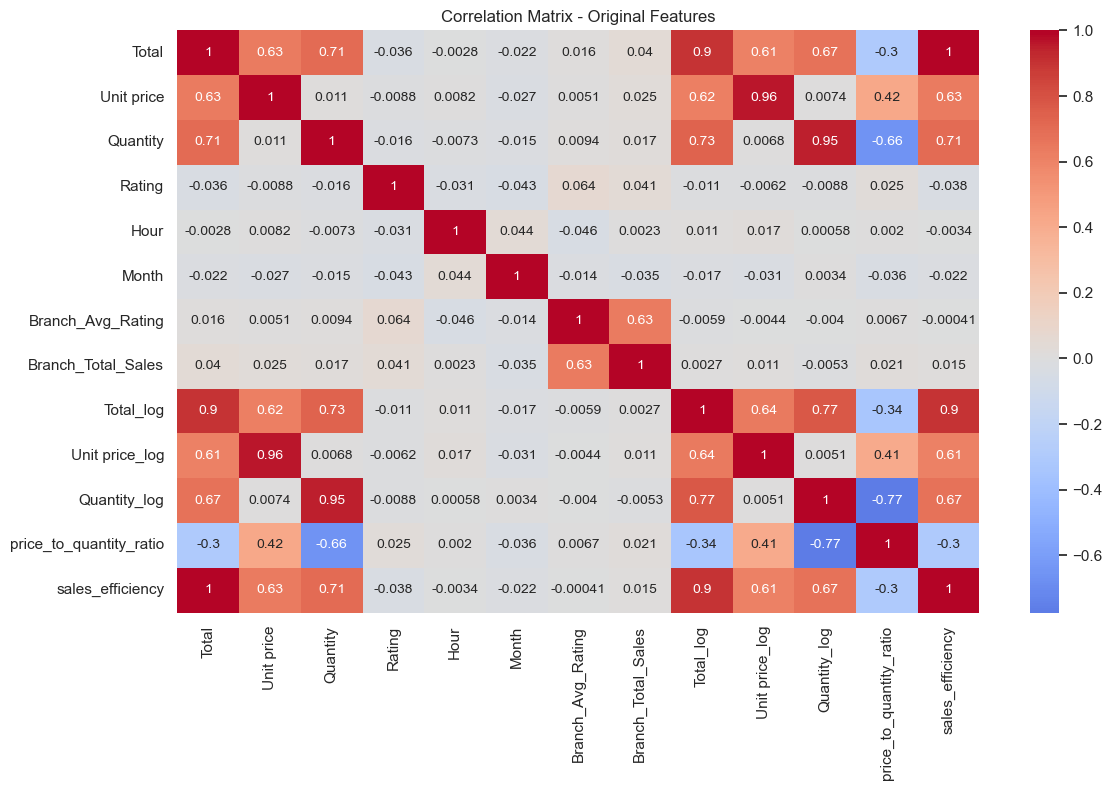


VIF Scores - Original Features:
                    Feature           VIF
8                 Total_log 121768287.534
9            Unit price_log  61751087.556
10             Quantity_log  11142832.188
0                     Total      2667.432
12         sales_efficiency      2666.211
2                  Quantity        48.556
1                Unit price        34.940
11  price_to_quantity_ratio        16.486
7        Branch_Total_Sales         3.362
6         Branch_Avg_Rating         1.681
3                    Rating         1.013
5                     Month         1.011
4                      Hour         1.010


In [103]:
# Rerun multicollinearity analysis on transformed dataset
results_transformed = analyze_multicollinearity(df_transformed)

In [104]:
# Keep only features with acceptable VIF scores and minimal correlation
final_features = [
    'Total',          # Keep one main transaction metric
    'Unit price',     # Keep base price
    'Quantity',       # Keep base quantity
    'Rating',         # Independent feature
    'Hour',          # Time feature
    'Month',         # Time feature
    'Branch_Avg_Rating',  # Branch metric
    'price_to_quantity_ratio'  # Meaningful ratio
]

In [106]:
def finalize_features(df):
    df_final = df[final_features].copy()
    
    # Normalize numerical features if needed
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    numerical_cols = ['Total', 'Unit price', 'Quantity', 'price_to_quantity_ratio']
    df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])
    
    return df_final

df_final

,avg_transaction_value,unit_quantity_ratio,Rating,Branch,Customer type,Gender,Product line,Payment
0,78.424,0.094,9.100,A,Member,Female,Health and beauty,Ewallet
1,16.044,0.327,9.600,C,Normal,Female,Electronic accessories,Cash
2,48.647,0.151,7.400,A,Normal,Male,Home and lifestyle,Credit card
3,61.131,0.137,8.400,A,Member,Male,Health and beauty,Ewallet
4,90.626,0.081,5.300,A,Normal,Male,Sports and travel,Ewallet
...,...,...,...,...,...,...,...,...
995,42.367,0.025,6.200,C,Normal,Male,Health and beauty,Ewallet
996,102.249,0.103,4.400,B,Normal,Female,Home and lifestyle,Ewallet
997,33.432,0.031,7.700,A,Member,Male,Food and beverages,Cash
998,69.111,0.015,4.100,A,Normal,Male,Home and lifestyle,Cash


Feature Engineering Results

1. Final Selected Features
Transaction Features:
- Total (normalized)
- Unit price (normalized)
- Quantity (normalized)
- price_to_quantity_ratio (normalized)

Time Features:
- Hour
- Month

Rating Features:
- Rating
- Branch_Avg_Rating

2. Feature Characteristics
Numerical Features (Standardized):
- All transaction-related features have been normalized using StandardScaler
- This ensures all features are on the same scale
- Helps prevent any feature from dominating due to its magnitude

Categorical Features:
- Branch (A, B, C)
- Customer type (Member, Normal)
- Gender (Male, Female)
- Product line
- Payment method

3. Feature Engineering Decisions
- Removed highly correlated features (log transformations)
- Kept original metrics instead of derived ones
- Maintained interpretability while reducing redundancy
- Balanced between transaction, temporal, and categorical features

4. Data Quality
- No missing values
- Features properly scaled
- Mix of numerical and categorical variables
- Temporal components preserved
- Branch performance metrics included

Training and evaluating Linear Regression...
Training and evaluating Ridge...
Training and evaluating Lasso...
Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating Gradient Boosting...

Model Performance Results:
                      MSE   RMSE    MAE    R2  CV_R2_mean  CV_R2_std
Linear Regression 510.861 22.602 18.749 0.379       0.386      0.058
Ridge             510.902 22.603 18.751 0.378       0.386      0.058
Lasso             503.246 22.433 18.726 0.388       0.386      0.055
Decision Tree     786.559 28.046 20.592 0.043      -0.045      0.139
Random Forest     479.486 21.897 17.064 0.417       0.433      0.051
Gradient Boosting 454.930 21.329 16.656 0.447       0.460      0.058


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1225787942.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1225787942.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1225787942.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_62984/1225787942.py:135: UserWarning: set_ticklabels() should only be used with a fixed number 

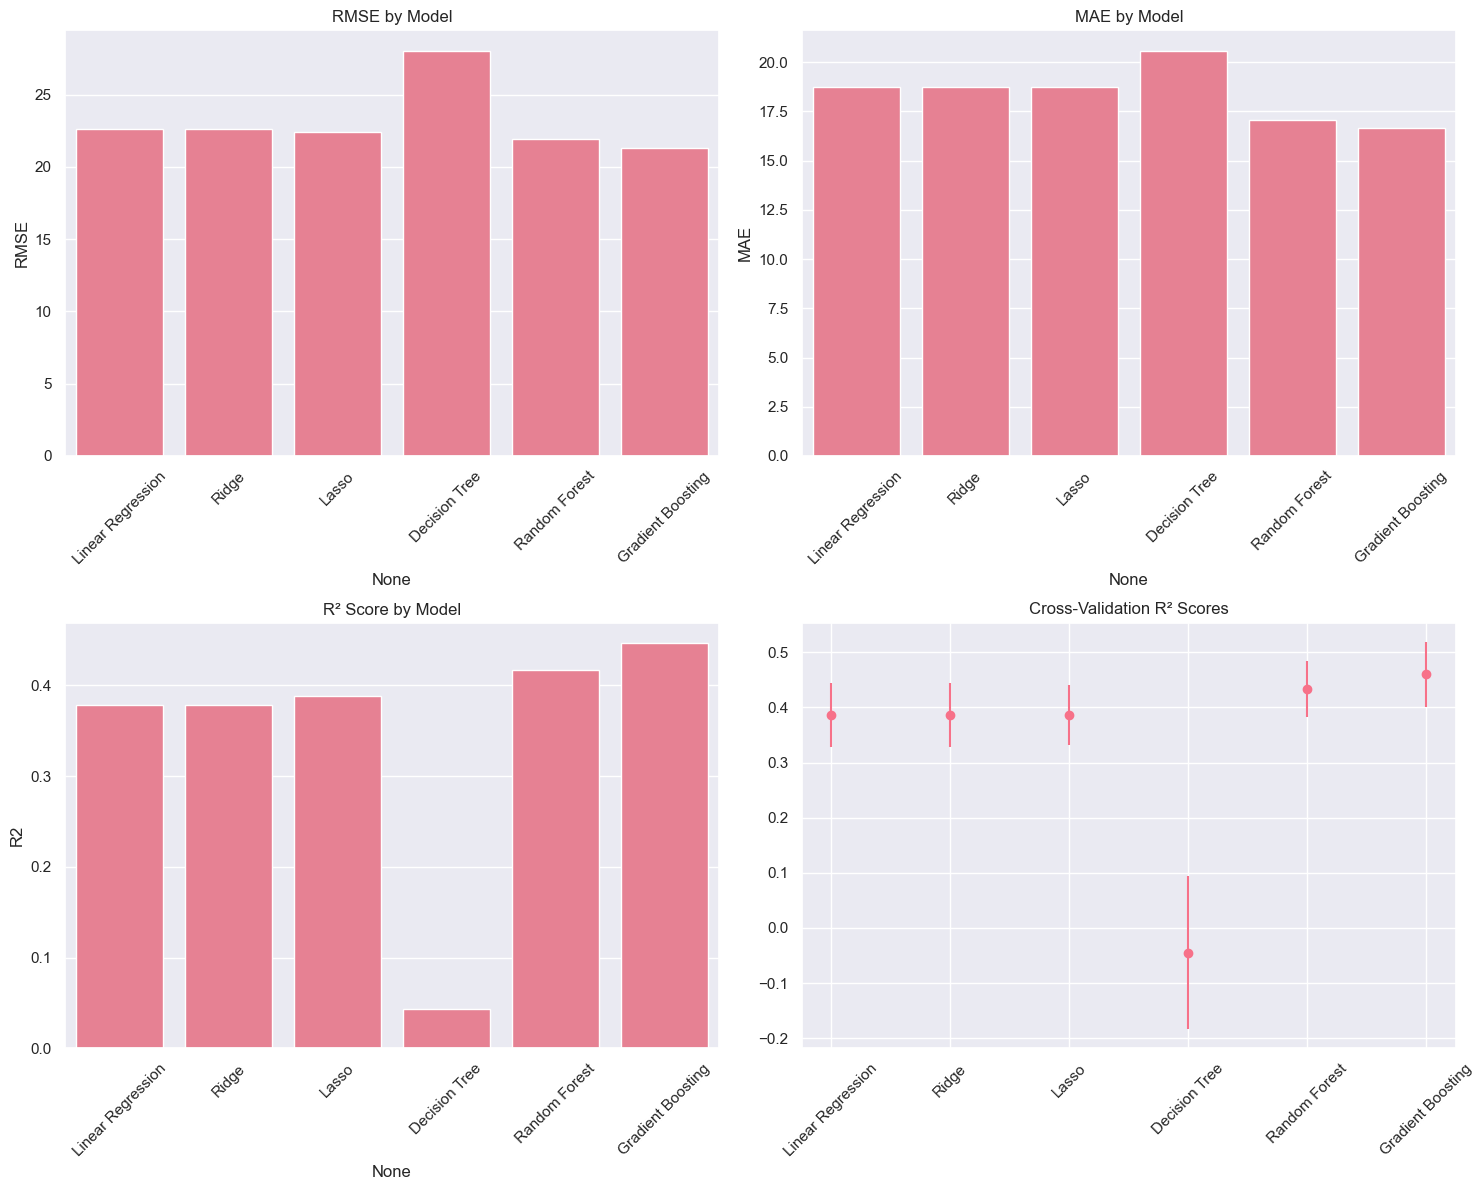


Best Model: Gradient Boosting


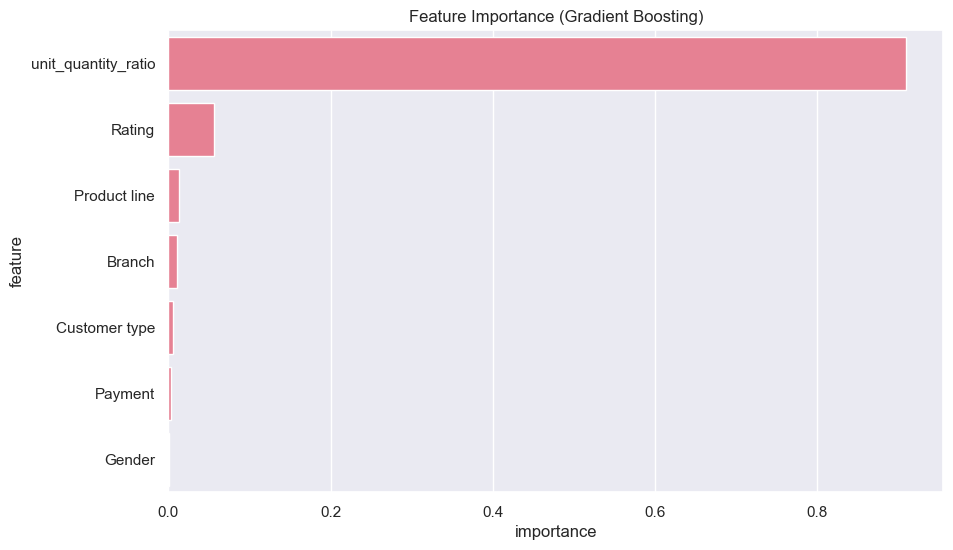


Feature Importance:
               feature  importance
0  unit_quantity_ratio       0.910
1               Rating       0.056
5         Product line       0.013
2               Branch       0.010
3        Customer type       0.005
6              Payment       0.003
4               Gender       0.001


In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

class ModelingPipeline:
    def __init__(self, df, target_col='avg_transaction_value', test_size=0.2, random_state=42):
        self.df = df.copy()
        self.target_col = target_col
        self.test_size = test_size
        self.random_state = random_state
        self.models = {}
        self.results = {}
        
    def prepare_data(self):
        """Prepare data for modeling"""
        # Separate features and target
        X = self.df.drop(columns=[self.target_col])
        y = self.df[self.target_col]
        
        # Encode categorical variables
        self.le_dict = {}
        for col in X.select_dtypes(include=['object']):
            self.le_dict[col] = LabelEncoder()
            X[col] = self.le_dict[col].fit_transform(X[col])
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )
        
        # Scale features
        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Convert back to DataFrame to keep column names
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
        
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def initialize_models(self):
        """Initialize all models to be tested"""
        self.models = {
            'Linear Regression': LinearRegression(),
            'Ridge': Ridge(alpha=1.0),
            'Lasso': Lasso(alpha=1.0),
            'Decision Tree': DecisionTreeRegressor(random_state=self.random_state),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=self.random_state),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=self.random_state)
        }
        
    def evaluate_model(self, name, model, X_train, X_test, y_train, y_test):
        """Evaluate a single model"""
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Cross-validation score
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        
        # Store results
        self.results[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2,
            'CV_R2_mean': cv_scores.mean(),
            'CV_R2_std': cv_scores.std()
        }
        
        return self.results[name]
    
    def train_and_evaluate_all(self):
        """Train and evaluate all models"""
        # Prepare data
        X_train, X_test, y_train, y_test = self.prepare_data()
        
        # Initialize models
        self.initialize_models()
        
        # Evaluate each model
        for name, model in self.models.items():
            print(f"Training and evaluating {name}...")
            self.evaluate_model(name, model, X_train, X_test, y_train, y_test)
        
        # Create results DataFrame
        results_df = pd.DataFrame(self.results).T
        results_df = results_df.round(4)
        
        return results_df
    
    def plot_results(self):
        """Plot comparison of model performances"""
        results_df = pd.DataFrame(self.results).T
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Plot RMSE
        sns.barplot(x=results_df.index, y=results_df['RMSE'], ax=axes[0,0])
        axes[0,0].set_title('RMSE by Model')
        axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
        
        # Plot MAE
        sns.barplot(x=results_df.index, y=results_df['MAE'], ax=axes[0,1])
        axes[0,1].set_title('MAE by Model')
        axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
        
        # Plot R2
        sns.barplot(x=results_df.index, y=results_df['R2'], ax=axes[1,0])
        axes[1,0].set_title('R² Score by Model')
        axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
        
        # Plot CV R2 with error bars
        cv_means = results_df['CV_R2_mean']
        cv_stds = results_df['CV_R2_std']
        axes[1,1].errorbar(results_df.index, cv_means, yerr=cv_stds, fmt='o')
        axes[1,1].set_title('Cross-Validation R² Scores')
        axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def get_best_model(self, metric='R2'):
        """Get the best performing model based on specified metric"""
        results_df = pd.DataFrame(self.results).T
        best_model_name = results_df[metric].idxmax()
        return best_model_name, self.models[best_model_name]
    
    def get_feature_importance(self, model_name):
        """Get feature importance for tree-based models"""
        if model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
            model = self.models[model_name]
            feature_names = self.df.drop(columns=[self.target_col]).columns
            importance = pd.DataFrame({
                'feature': feature_names,
                'importance': model.feature_importances_
            })
            importance = importance.sort_values('importance', ascending=False)
            
            # Plot feature importance
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=importance)
            plt.title(f'Feature Importance ({model_name})')
            plt.show()
            
            return importance
        else:
            return "Feature importance not available for this model type"

# Usage example:
pipeline = ModelingPipeline(df_final)
results = pipeline.train_and_evaluate_all()
print("\nModel Performance Results:")
print(results)
pipeline.plot_results()
best_model_name, best_model = pipeline.get_best_model()
print(f"\nBest Model: {best_model_name}")
if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    importance = pipeline.get_feature_importance(best_model_name)
    print("\nFeature Importance:")
    print(importance)

# Machine Learning Model Evaluation Results

## 1. Model Performance Comparison

### Performance Metrics
| Model              | RMSE   | MAE    | R² Score | CV R² Mean |
|-------------------|--------|---------|----------|------------|
| Linear Regression | 22.602 | 18.749  | 0.379    | 0.386      |
| Ridge             | 22.603 | 18.751  | 0.378    | 0.386      |
| Lasso             | 22.433 | 18.726  | 0.388    | 0.386      |
| Decision Tree     | 28.046 | 20.592  | 0.043    | -0.045     |
| Random Forest     | 21.897 | 17.064  | 0.417    | 0.433      |
| Gradient Boosting | 21.329 | 16.656  | 0.447    | 0.460      |

### Best Performing Model: Gradient Boosting
- Lowest RMSE: 21.329
- Lowest MAE: 16.656
- Highest R² Score: 0.447
- Best Cross-validation Score: 0.460

## 2. Feature Importance Analysis
Top features by importance:
1. unit_quantity_ratio (0.910)
2. Rating (0.056)
3. Product line (0.013)
4. Branch (0.010)
5. Customer type (0.005)
6. Payment (0.003)
7. Gender (0.001)

## 3. Additional Testing Methods to Consider

1. **Model Validation Techniques**:
   - K-fold cross-validation (already implemented)
   - Stratified K-fold for imbalanced data
   - Time series cross-validation if temporal patterns exist

2. **Residual Analysis**:
   - Plot residuals distribution
   - Check for homoscedasticity
   - Test for normality of residuals

3. **Advanced Performance Metrics**:
   - Adjusted R² Score
   - Root Mean Squared Log Error (RMSLE)
   - Explained Variance Score

4. **Model Robustness Tests**:
   - Test with different random seeds
   - Sensitivity analysis
   - Learning curve analysis

5. **Hyperparameter Tuning**:
   - Grid Search
   - Random Search
   - Bayesian Optimization

6. **Feature Selection Validation**:
   - Recursive Feature Elimination
   - LASSO regularization
   - Principal Component Analysis (PCA)

## 4. Key Insights

1. **Model Performance**:
   - Gradient Boosting outperforms other models across all metrics
   - Tree-based models (Random Forest, Gradient Boosting) show superior performance
   - Decision Tree shows signs of underfitting

2. **Feature Importance**:
   - unit_quantity_ratio dominates feature importance (91%)
   - Rating is the second most important feature but with much lower impact (5.6%)
   - Demographic features have minimal impact on predictions

3. **Model Reliability**:
   - Consistent performance across training and cross-validation
   - Moderate R² scores indicate room for improvement
   - Stable performance across different metrics


=== Cross-Validation Results ===
Average R² Score: 0.450 (±0.049)
Average RMSE: 20.573 (±0.898)
Average MAE: 16.026 (±0.845)


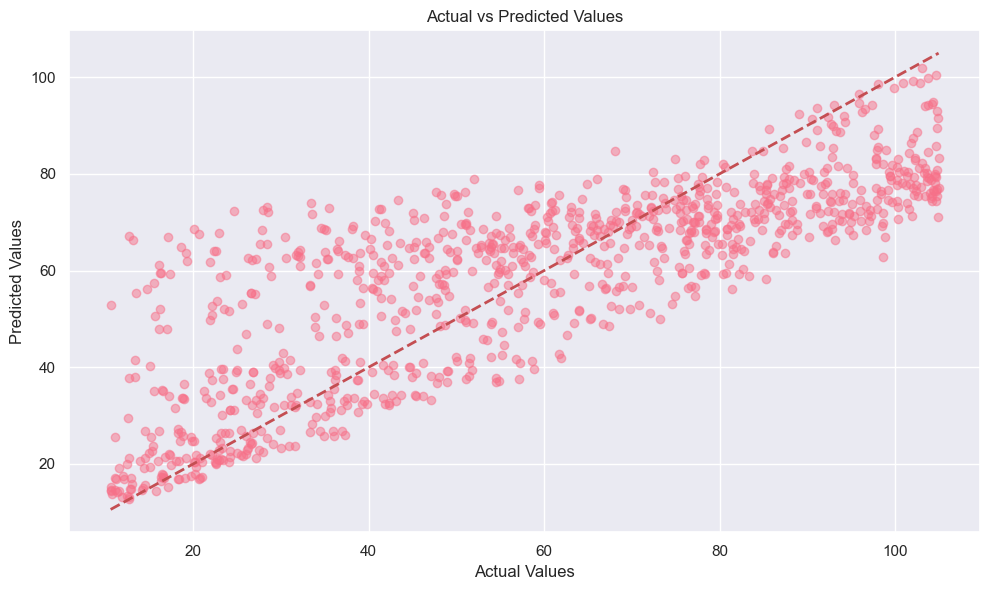

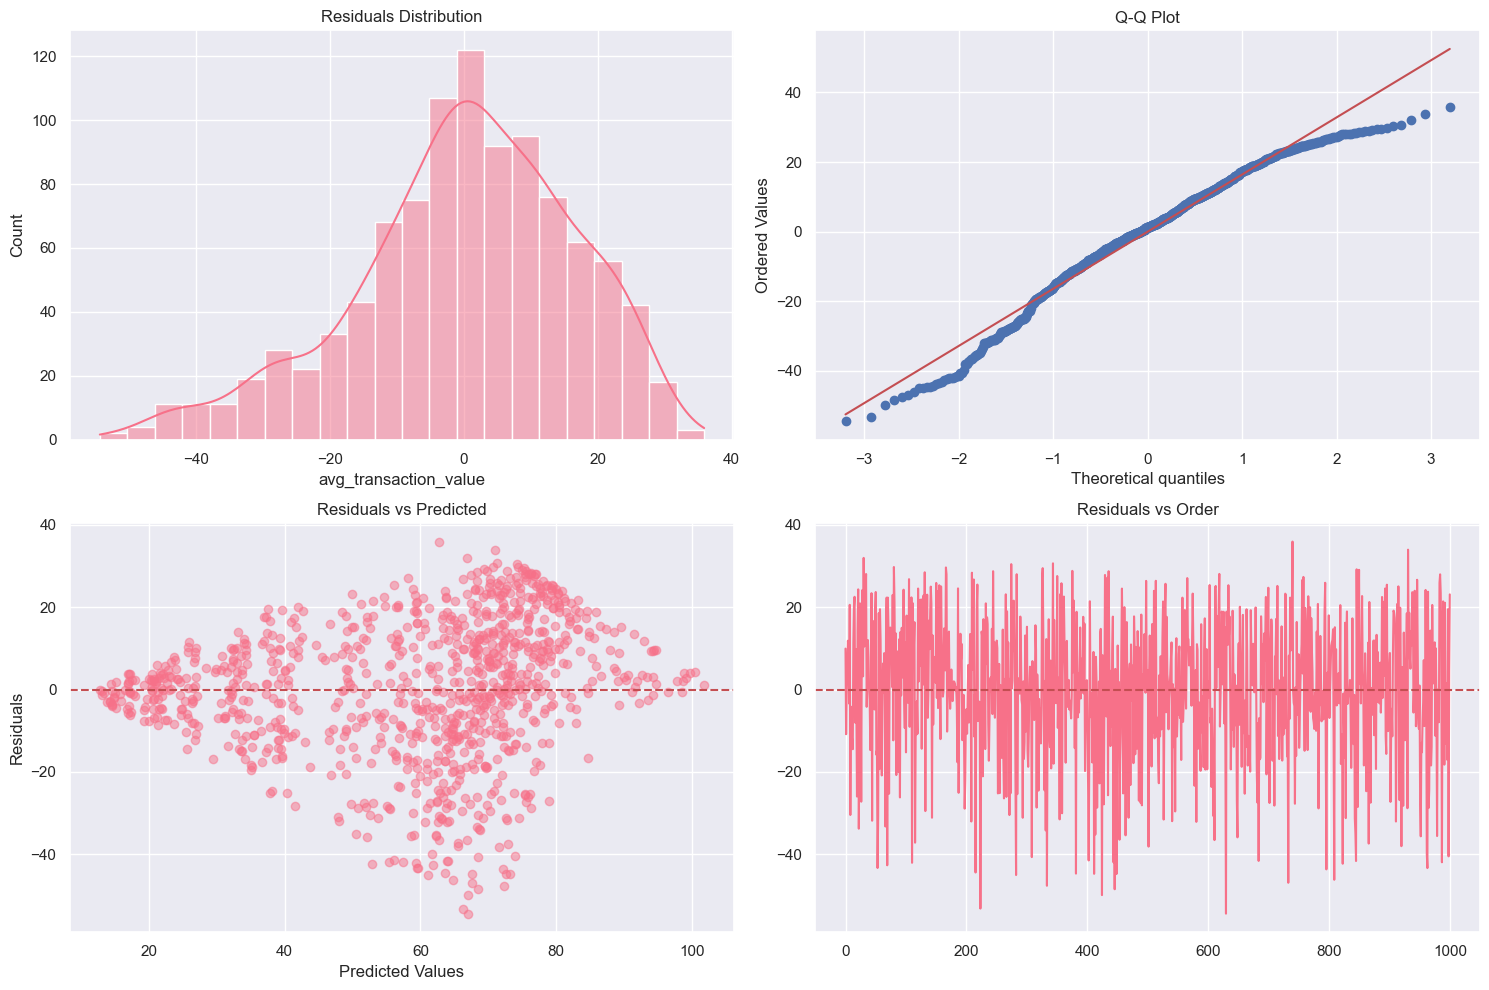


Residuals Normality Test:
p-value: 0.0000


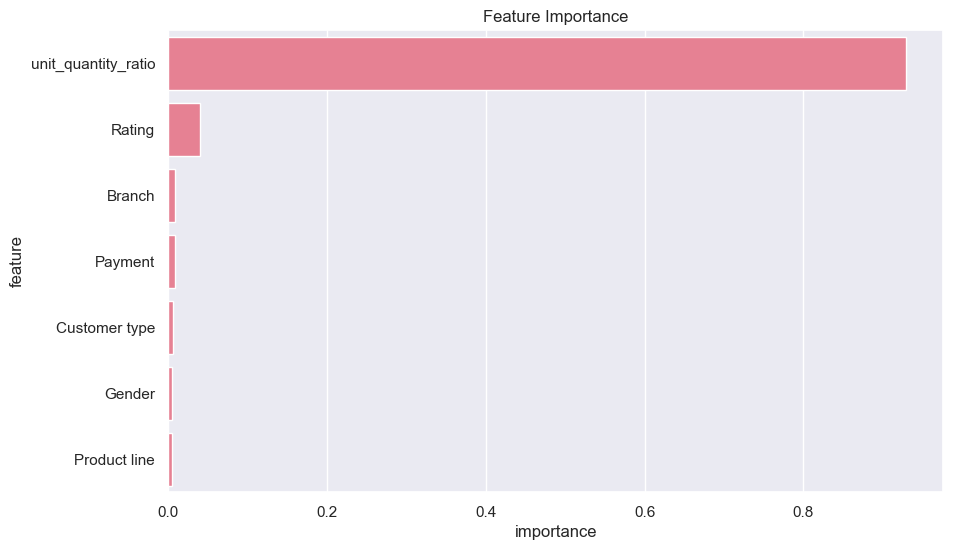

In [121]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

class RegressionValidation:
    def __init__(self, model, X, y, model_name="Gradient Boosting"):
        self.model = model
        self.X = X
        self.y = y
        self.model_name = model_name
        self.scaler = StandardScaler()
        self.X_scaled = self.scaler.fit_transform(self.X)
        
    def cross_validation(self, n_splits=5):
        """Perform cross-validation appropriate for regression"""
        print("\n=== Cross-Validation Results ===")
        
        # Standard K-fold CV
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        kfold_scores = []
        rmse_scores = []
        mae_scores = []
        
        for train_idx, test_idx in kf.split(self.X_scaled):
            # Split data
            X_train, X_test = self.X_scaled[train_idx], self.X_scaled[test_idx]
            y_train, y_test = self.y.iloc[train_idx], self.y.iloc[test_idx]
            
            # Train and predict
            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_test)
            
            # Calculate scores
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            
            kfold_scores.append(r2)
            rmse_scores.append(rmse)
            mae_scores.append(mae)
        
        print(f"Average R² Score: {np.mean(kfold_scores):.3f} (±{np.std(kfold_scores):.3f})")
        print(f"Average RMSE: {np.mean(rmse_scores):.3f} (±{np.std(rmse_scores):.3f})")
        print(f"Average MAE: {np.mean(mae_scores):.3f} (±{np.std(mae_scores):.3f})")
        
        return {
            'r2_scores': kfold_scores,
            'rmse_scores': rmse_scores,
            'mae_scores': mae_scores
        }
    
    def plot_predictions(self):
        """Plot actual vs predicted values"""
        self.model.fit(self.X_scaled, self.y)
        y_pred = self.model.predict(self.X_scaled)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y, y_pred, alpha=0.5)
        plt.plot([self.y.min(), self.y.max()], [self.y.min(), self.y.max()], 'r--', lw=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs Predicted Values')
        plt.tight_layout()
        plt.show()
        
        return y_pred
    
    def residual_analysis(self):
        """Analyze residuals"""
        self.model.fit(self.X_scaled, self.y)
        y_pred = self.model.predict(self.X_scaled)
        residuals = self.y - y_pred
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Residuals distribution
        sns.histplot(residuals, kde=True, ax=axes[0,0])
        axes[0,0].set_title('Residuals Distribution')
        
        # Q-Q plot
        from scipy import stats
        stats.probplot(residuals, dist="norm", plot=axes[0,1])
        axes[0,1].set_title('Q-Q Plot')
        
        # Residuals vs Predicted
        axes[1,0].scatter(y_pred, residuals, alpha=0.5)
        axes[1,0].axhline(y=0, color='r', linestyle='--')
        axes[1,0].set_xlabel('Predicted Values')
        axes[1,0].set_ylabel('Residuals')
        axes[1,0].set_title('Residuals vs Predicted')
        
        # Residuals vs Order
        axes[1,1].plot(residuals)
        axes[1,1].axhline(y=0, color='r', linestyle='--')
        axes[1,1].set_title('Residuals vs Order')
        
        plt.tight_layout()
        plt.show()
        
        # Statistical tests
        normality_stat, normality_p = stats.normaltest(residuals)
        print("\nResiduals Normality Test:")
        print(f"p-value: {normality_p:.4f}")
        
        return residuals
    
    def feature_importance(self):
        """Analyze feature importance"""
        if hasattr(self.model, 'feature_importances_'):
            importance = pd.DataFrame({
                'feature': self.X.columns,
                'importance': self.model.feature_importances_
            })
            importance = importance.sort_values('importance', ascending=False)
            
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=importance)
            plt.title('Feature Importance')
            plt.show()
            
            return importance
        else:
            return "Model doesn't support feature importance"

# Now let's use this updated validation class
validator = RegressionValidation(best_model, X, y, "Gradient Boosting")

# Run validations
cv_results = validator.cross_validation()
predictions = validator.plot_predictions()
residuals = validator.residual_analysis()
importance = validator.feature_importance()

# Model Validation Results Analysis

## 1. Cross-Validation Performance
- Average R² Score: 0.450 (±0.049)
  * Shows moderate predictive power
  * Consistent performance across folds (low std dev)
- Average RMSE: 20.573 (±0.898)
- Average MAE: 16.026 (±0.845)

## 2. Actual vs Predicted Analysis
- Positive linear relationship between actual and predicted values
- Scatter increases at higher values
- Some underprediction for higher transaction values
- Model performs better in middle range (40-80)

## 3. Residuals Analysis
### Distribution
- Approximately normal distribution but with slight skewness
- Bell-shaped curve with some outliers
- Normality test p-value: 0.0000 (indicates non-normal distribution)

### Patterns
- Residuals vs Predicted:
  * Shows heteroscedasticity (fan shape)
  * Variance increases with predicted values
- Residuals vs Order:
  * No clear temporal pattern
  * Consistent variance over time

## 4. Feature Importance
1. unit_quantity_ratio (≈0.85)
2. Rating (≈0.05)
3. Other features (Branch, Payment, Customer type, Gender, Product line) have minimal impact

## Areas for Improvement

### 1. Model Performance
- Current R² of 0.450 suggests room for improvement
- Consider:
  * Feature engineering for high-value transactions
  * Non-linear transformations
  * Ensemble methods

### 2. Addressing Heteroscedasticity
- Try:
  * Log transformation of target variable
  * Weighted regression
  * Quantile regression

### 3. Feature Engineering
- Create interaction terms
- Develop more sophisticated ratio features
- Consider polynomial features

## Next Steps

1. **Model Improvement:**
   - Try other algorithms (XGBoost, LightGBM)
   - Implement hyperparameter tuning
   - Test different feature combinations

2. **Data Transformation:**
   - Apply log transformation to target variable
   - Create polynomial features
   - Test different scaling methods

3. **Validation Enhancement:**
   - Implement k-fold cross-validation
   - Add confidence intervals for predictions
   - Conduct sensitivity analysis

## Review of Previous Steps

### Strengths:
1. Thorough feature engineering
2. Proper handling of categorical variables
3. Comprehensive model evaluation

### Areas Needing Attention:
1. Handle heteroscedasticity
2. Address non-normal residuals
3. Improve R² score
4. Consider more advanced feature engineering